# Importing Necessary Libraries and Mounting Google Drive

- `from google.colab import drive`: To mount Google Drive for accessing files.
- `pandas (pd)`: For data manipulation and analysis.
- `numpy (np)`: For numerical operations.
- `scipy.spatial.cKDTree`: Efficient spatial queries (nearest neighbor search).
- `geopy.distance.geodesic`: Calculate geodesic distances between coordinates.
- `geopandas (gpd)`: For working with geospatial data.
- `os`: Operating system utilities (e.g., file path handling).


In [1]:
# from google.colab import drive
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree
from geopy.distance import geodesic
import geopandas as gpd
import os
import plotly.express as px


# Mounting Google Drive and Listing Files

- `drive.mount('/content/drive')`: Mounts your Google Drive to access files from Colab.
- `path`: Defines the path to your Google Drive folder.
- `os.listdir(path)`: Lists all files and folders in the specified directory to verify access.


In [18]:
# drive.mount('/content/drive')

# path = '/content/drive/MyDrive/'

# os.listdir(path)

file_path = './data'
os.listdir(file_path)


['Capital_Bikeshare_Locations.csv',
 'daily-rend-final-first.parquet',
 'daily-rent-merged.parquet',
 'daily-rent-sampled.parquet',
 'daily-rent.parquet',
 'DDOT_Central_Business_District.geojson',
 'Metro_Bus_Stops.csv',
 'Residential_and_Visitor_Parking_Zones.geojson',
 'Shuttle_Bus_Stops.csv',
 'stations.csv',
 'Washington,DC,USA 2024-01-01 to 2024-12-31.csv']

# Loading Daily Bike Rental Trips Data

### Columns Description:
- **ride_id**: Unique identifier for each bike trip.
- **rideable_type**: Type of bike used (e.g., classic bike, electric).
- **started_at**: Timestamp when the trip started.
- **ended_at**: Timestamp when the trip ended.
- **start_station_name**: Name of the station where the trip started.
- **start_station_id**: Unique identifier of the start station.
- **end_station_name**: Name of the station where the trip ended.
- **end_station_id**: Unique identifier of the end station.
- **start_lat**, **start_lng**: Latitude and longitude coordinates of the start station.
- **end_lat**, **end_lng**: Latitude and longitude coordinates of the end station.
- **member_casual**: Type of user, either a member or a casual rider.


In [ ]:
df_rent = pd.read_parquet(os.path.join(file_path, 'daily-rent-sampled.parquet'))
df_rent.head()


ride_id rideable_type          started_at            ended_at  \
0  6A6067934F2E1EC9  classic_bike 2024-05-04 14:27:37 2024-05-04 14:37:52   
1  FF5D6FE256D4DE34  classic_bike 2024-05-04 14:00:53 2024-05-04 15:00:25   
2  4A64EABCDCB7506A  classic_bike 2024-05-04 15:12:21 2024-05-04 15:27:29   
3  0F7347CF6409CEB7  classic_bike 2024-05-04 14:49:59 2024-05-04 14:54:11   
4  2022D12F38B197C3  classic_bike 2024-05-04 19:23:20 2024-05-04 19:41:35   

            start_station_name start_station_id  \
0               14th & G St NW            31238   
1    Jefferson Dr & 14th St SW            31247   
2                1st & M St NE            31603   
3           Jefferson Memorial            31249   
4  New Hampshire Ave & T St NW            31229   

                            end_station_name end_station_id  start_lat  \
0                         Jefferson Memorial          31249  38.898164   
1  7th & F St NW / National Portrait Gallery          31232  38.888553   
2                              4th & M St SW          31108  38.905697   
3           Hains Point/Buckeye & Ohio Dr SW          31273  38.879819   
4                             14th & G St NW          31238  38.915544   

   start_lng    end_lat    end_lng member_casual  
0 -77.031898  38.879819 -77.037413        casual  
1 -77.032427  38.897283 -77.022191        casual  
2 -77.005483  38.876823 -77.017774        casual  
3 -77.037413  38.878433 -77.030230        casual  
4 -77.038252  38.898164 -77.031898        casual

## Inspecting the DataFrame Structure

Here we provide a concise summary of the bike trips DataFrame, including:
- Number of entries (rows)
- Description of the columns 
- Number of columns and their names
- Data types of each column
- Number of non-null (non-missing) values per column

This helps us understand the dataset's size, completeness, and the data types we will be working with.


In [ ]:
print("\n--- Basic Info ---")
print(df_rent.info())


--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018456 entries, 0 to 2018455
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 200.2+ MB
None


In [ ]:
print("\n--- Data Description ---")
df_rent.describe()


--- Data Description ---


started_at                       ended_at  \
count                        2018456                        2018456   
mean   2024-07-18 17:20:21.606335488  2024-07-18 18:32:57.616510208   
min              1970-01-01 00:00:00            2000-01-01 15:55:56   
25%    2024-05-03 10:31:50.249999872  2024-05-03 10:53:36.750000128   
50%       2024-07-26 11:24:29.612000  2024-07-26 11:42:10.036499968   
75%    2024-10-06 17:19:02.340999936  2024-10-06 17:40:53.261750016   
max       2024-12-31 23:54:29.513000            2030-01-01 00:00:00   
std                              NaN                            NaN   

          start_lat     start_lng       end_lat       end_lng  
count  2.018456e+06  2.018456e+06  2.016904e+06  2.016904e+06  
mean   3.890581e+01 -7.703182e+01  3.890509e+01 -7.703160e+01  
min    0.000000e+00 -7.739000e+01  0.000000e+00 -8.018000e+01  
25%    3.889287e+01 -7.704440e+01  3.889227e+01 -7.704442e+01  
50%    3.890543e+01 -7.703000e+01  3.890383e+01 -7.703000e+01  
75%    3.891902e+01 -7.701162e+01  3.891776e+01 -7.701082e+01  
max    3.914000e+01  0.000000e+00  4.217000e+01  0.000000e+00  
std    9.114090e-02  1.753559e-01  9.134485e-02  1.754522e-01

In [ ]:
print(f"\nShape of dataset: {df_rent.shape}")



Shape of dataset: (2018456, 13)


In [ ]:

print("\n--- Null Values per Column ---")
print(df_rent.isnull().sum())


--- Null Values per Column ---
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    393290
start_station_id      393290
end_station_name      408636
end_station_id        409167
start_lat                  0
start_lng                  0
end_lat                 1552
end_lng                 1552
member_casual              0
dtype: int64


In [ ]:
print("\n--- Percentage of Missing Values ---")
print(df_rent.isnull().mean().round(4) * 100)



--- Percentage of Missing Values ---
ride_id                0.00
rideable_type          0.00
started_at             0.00
ended_at               0.00
start_station_name    19.48
start_station_id      19.48
end_station_name      20.24
end_station_id        20.27
start_lat              0.00
start_lng              0.00
end_lat                0.08
end_lng                0.08
member_casual          0.00
dtype: float64


In [ ]:
# Separate numerical and categorical columns
numerical_cols = df_rent.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_rent.select_dtypes(include=['object']).columns.tolist()


In [ ]:
print("\n--- Numerical Columns ---")
print(numerical_cols)



--- Numerical Columns ---
['start_lat', 'start_lng', 'end_lat', 'end_lng']


In [ ]:
print("\n--- Categorical Columns ---")
print(categorical_cols)



--- Categorical Columns ---
['ride_id', 'rideable_type', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'member_casual']


In [ ]:
descriptive_categorical_cols= ['rideable_type','member_casual']

In [ ]:
# Description for numerical columns
print("\n--- Descriptive Stats (Numerical) ---")
print(df_rent[numerical_cols].describe())



--- Descriptive Stats (Numerical) ---
          start_lat     start_lng       end_lat       end_lng
count  2.018456e+06  2.018456e+06  2.016904e+06  2.016904e+06
mean   3.890581e+01 -7.703182e+01  3.890509e+01 -7.703160e+01
std    9.114090e-02  1.753559e-01  9.134485e-02  1.754522e-01
min    0.000000e+00 -7.739000e+01  0.000000e+00 -8.018000e+01
25%    3.889287e+01 -7.704440e+01  3.889227e+01 -7.704442e+01
50%    3.890543e+01 -7.703000e+01  3.890383e+01 -7.703000e+01
75%    3.891902e+01 -7.701162e+01  3.891776e+01 -7.701082e+01
max    3.914000e+01  0.000000e+00  4.217000e+01  0.000000e+00


In [ ]:
# Description for datetime columns
datetime_cols = df_rent.select_dtypes(include=['datetime']).columns.tolist()
print("\n--- DateTime Columns ---")
for col in datetime_cols:
    print(f"{col}: min={df_rent[col].min()}, max={df_rent[col].max()}, range={df_rent[col].max() - df_rent[col].min()}")



--- DateTime Columns ---
started_at: min=1970-01-01 00:00:00, max=2024-12-31 23:54:29.513000, range=20088 days 23:54:29.513000
ended_at: min=2000-01-01 15:55:56, max=2030-01-01 00:00:00, range=10957 days 08:04:04


In [ ]:
# Value counts for categorical columns (top 10 most frequent values)
print("\n--- Categorical Column Distributions ---")
for col in descriptive_categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(df_rent[col].value_counts(dropna=False).head(10))



--- Categorical Column Distributions ---

Value counts for 'rideable_type':
rideable_type
electric_bike    1123975
classic_bike      894481
Name: count, dtype: int64

Value counts for 'member_casual':
member_casual
member    1339915
casual     678541
Name: count, dtype: int64


In [ ]:
# Unique values per column
print("\n--- Unique Values per Column ---")
for col in df_rent.columns:
    print(f"{col}: {df_rent[col].nunique()} unique values")

print('all out of ',df_rent.shape)



--- Unique Values per Column ---
ride_id: 2018430 unique values
rideable_type: 2 unique values
started_at: 1989352 unique values
ended_at: 1989525 unique values
start_station_name: 816 unique values
start_station_id: 802 unique values
end_station_name: 814 unique values
end_station_id: 800 unique values
start_lat: 244715 unique values
start_lng: 252932 unique values
end_lat: 914 unique values
end_lng: 934 unique values
member_casual: 2 unique values
all out of  (2018456, 13)


In [ ]:
# Detect duplicated rows
duplicate_rows = df_rent.duplicated().sum()
print(f"\n--- Duplicate Rows ---")
print(f"Total duplicated rows: {duplicate_rows}")



--- Duplicate Rows ---
Total duplicated rows: 0


In [ ]:

df_rent['duration_min'] = ((df_rent['ended_at'] - df_rent['started_at']).dt.total_seconds() / 60)

print("\n--- Ride Duration Stats (in hours) ---")
print(df_rent['duration_min'].describe())




--- Ride Duration Stats (in hours) ---
count    2.018456e+06
mean     7.260017e+01
std      4.531400e+04
min     -1.269203e+07
25%      5.588067e+00
50%      9.754900e+00
75%      1.679717e+01
max      3.155760e+07
Name: duration_min, dtype: float64


In [ ]:
df_rent = df_rent[
    (df_rent['started_at'].dt.year == 2024) &
    (df_rent['ended_at'].dt.year == 2024) &
    (df_rent['ended_at'] >= df_rent['started_at'])
]
print("\n--- Ride Duration Stats (in hours) after droping worng dates---")
print(df_rent['duration_min'].describe())


--- Ride Duration Stats (in hours) after droping worng dates---
count    2.018355e+06
mean     1.635148e+01
std      5.144865e+01
min      0.000000e+00
25%      5.588875e+00
50%      9.755600e+00
75%      1.679802e+01
max      1.559933e+03
Name: duration_min, dtype: float64


# Loading Bike Station Locations Data

### Columns Description:
- **X, Y**: Coordinates in a projected coordinate system (likely meters).
- **NAME**: Name of the bike station.
- **STATION_TYPE**: Type of station or bike (e.g., classic).
- **STATION_ID**: Unique identifier for the station.
- **STATION_STATUS**: Status of the station (active/inactive).
- **LAST_REPORTED**: Last timestamp when the station status was updated.
- **NUM_DOCKS_AVAILABLE**: Number of docks currently available.
- **NUM_DOCKS_DISABLED**: Number of docks disabled or out of service.
- **NUM_BIKES_AVAILABLE**: Number of bikes currently available at the station.
- **CAPACITY**: Total capacity of the station (number of docks).
- **RENTAL_METHODS**: Accepted rental payment methods (e.g., key, credit card).
- **REGION_ID, REGION_NAME**: Regional information about the station.
- **LATITUDE, LONGITUDE**: Geographic coordinates of the station.
- **OBJECTID**: Internal identifier for GIS purposes.

and other features ..., we will just be interested in th `NAME`, `CAPACITY`, `LONGITUDE` and `LATITUDE`.


In [ ]:
cap = pd.read_csv(os.path.join(file_path, 'Capital_Bikeshare_Locations.csv'))
cap.head()

X             Y                                            NAME  \
0 -8.577104e+06  4.705679e+06                                Lincoln Memorial   
1 -8.609481e+06  4.714716e+06    W&OD Trail/Sunset Hills Rd & Isaac Newton Sq   
2 -8.575867e+06  4.705657e+06                   17th St & Independence Ave SW   
3 -8.574188e+06  4.706622e+06                                   8th & D St NW   
4 -8.567161e+06  4.706864e+06  Anacostia Ave & Benning Rd NE / River Terrace    

  STATION_TYPE                            STATION_ID  STATION_STATUS  \
0      classic  08254284-1f3f-11e7-bf6b-3863bb334450             NaN   
1      classic  08263fbd-1f3f-11e7-bf6b-3863bb334450             NaN   
2      classic  082623bf-1f3f-11e7-bf6b-3863bb334450             NaN   
3      classic  08256ac9-1f3f-11e7-bf6b-3863bb334450             NaN   
4      classic  082518eb-1f3f-11e7-bf6b-3863bb334450             NaN   

            LAST_REPORTED  NUM_DOCKS_AVAILABLE  NUM_DOCKS_DISABLED  \
0  2025/05/05 20:25:51+00                   17                   0   
1  2025/05/05 20:25:51+00                   15                   0   
2  2025/05/05 20:25:51+00                   10                   0   
3  2025/05/05 20:25:49+00                    0                   0   
4  2025/05/05 20:25:49+00                    4                   0   

   NUM_BIKES_AVAILABLE  ...  EIGHTD_HAS_KEY_DISPENSER  CAPACITY  \
0                    8  ...                        NO        25   
1                    3  ...                        NO        19   
2                    6  ...                        NO        19   
3                   24  ...                        NO        24   
4                   10  ...                        NO        15   

   RENTAL_METHODS REGION_ID REGION_NAME GIS_ID   LATITUDE  LONGITUDE  \
0  KEY,CREDITCARD      42.0    DCA-CABI    NaN  38.888255 -77.049437   
1  KEY,CREDITCARD     104.0    DCA-CABI    NaN  38.951419 -77.340281   
2  KEY,CREDITCARD      42.0    DCA-CABI    NaN  38.888097 -77.038325   
3  KEY,CREDITCARD      42.0    DCA-CABI    NaN  38.894851 -77.023240   
4  KEY,CREDITCARD      42.0    DCA-CABI    NaN  38.896544 -76.960120   

        GIS_LAST_MOD_DTTM   OBJECTID  
0  2025/05/05 20:27:29+00  261284028  
1  2025/05/05 20:27:29+00  261284029  
2  2025/05/05 20:27:29+00  261284030  
3  2025/05/05 20:27:29+00  261284031  
4  2025/05/05 20:27:29+00  261284032  

[5 rows x 29 columns]

In [ ]:
print('---- #Null values ----')
cap.isnull().sum()

---- #Null values ----


X                                   0
Y                                   0
NAME                                0
STATION_TYPE                        0
STATION_ID                          0
STATION_STATUS                    794
LAST_REPORTED                       0
NUM_DOCKS_AVAILABLE                 0
NUM_DOCKS_DISABLED                  0
NUM_BIKES_AVAILABLE                 0
NUM_EBIKES_AVAILABLE                0
NUM_BIKES_DISABLED                  0
IS_INSTALLED                        0
IS_RETURNING                        0
IS_RENTING                          0
HAS_KIOSK                           0
IOS                                 0
ANDROID                             0
ELECTRIC_BIKE_SURCHARGE_WAIVER      0
EIGHTD_HAS_KEY_DISPENSER            0
CAPACITY                            0
RENTAL_METHODS                      0
REGION_ID                          50
REGION_NAME                         0
GIS_ID                            794
LATITUDE                            0
LONGITUDE   

In [ ]:
print("\n--- Percentage of Missing Values ---")
print(cap.isnull().mean().round(4) * 100)



--- Percentage of Missing Values ---
X                                   0.0
Y                                   0.0
NAME                                0.0
STATION_TYPE                        0.0
STATION_ID                          0.0
STATION_STATUS                    100.0
LAST_REPORTED                       0.0
NUM_DOCKS_AVAILABLE                 0.0
NUM_DOCKS_DISABLED                  0.0
NUM_BIKES_AVAILABLE                 0.0
NUM_EBIKES_AVAILABLE                0.0
NUM_BIKES_DISABLED                  0.0
IS_INSTALLED                        0.0
IS_RETURNING                        0.0
IS_RENTING                          0.0
HAS_KIOSK                           0.0
IOS                                 0.0
ANDROID                             0.0
ELECTRIC_BIKE_SURCHARGE_WAIVER      0.0
EIGHTD_HAS_KEY_DISPENSER            0.0
CAPACITY                            0.0
RENTAL_METHODS                      0.0
REGION_ID                           6.3
REGION_NAME                         0.0
GI

In [ ]:
print("\n--- Basic Info ---")
print(cap.info())


--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   X                               794 non-null    float64
 1   Y                               794 non-null    float64
 2   NAME                            794 non-null    object 
 3   STATION_TYPE                    794 non-null    object 
 4   STATION_ID                      794 non-null    object 
 5   STATION_STATUS                  0 non-null      float64
 6   LAST_REPORTED                   794 non-null    object 
 7   NUM_DOCKS_AVAILABLE             794 non-null    int64  
 8   NUM_DOCKS_DISABLED              794 non-null    int64  
 9   NUM_BIKES_AVAILABLE             794 non-null    int64  
 10  NUM_EBIKES_AVAILABLE            794 non-null    int64  
 11  NUM_BIKES_DISABLED              794 non-null    int64  
 12  IS_INSTALLED    

In [ ]:
print("\n--- data description ---")
cap.describe()


--- data description ---


X             Y  STATION_STATUS  NUM_DOCKS_AVAILABLE  \
count  7.940000e+02  7.940000e+02             0.0            794.00000   
mean  -8.579029e+06  4.708386e+06             NaN             10.13728   
std    1.073636e+04  8.392150e+03             NaN              6.07810   
min   -8.614982e+06  4.688330e+06             NaN              0.00000   
25%   -8.582008e+06  4.704036e+06             NaN              5.00000   
50%   -8.576564e+06  4.707386e+06             NaN             10.00000   
75%   -8.572478e+06  4.711950e+06             NaN             14.00000   
max   -8.552180e+06  4.739713e+06             NaN             32.00000   

       NUM_DOCKS_DISABLED  NUM_BIKES_AVAILABLE  NUM_EBIKES_AVAILABLE  \
count          794.000000           794.000000            794.000000   
mean             0.021411             6.419395              0.667506   
std              0.271923             5.968744              1.311613   
min              0.000000             0.000000              0.000000   
25%              0.000000             2.000000              0.000000   
50%              0.000000             5.000000              0.000000   
75%              0.000000            10.000000              1.000000   
max              7.000000            41.000000             15.000000   

       NUM_BIKES_DISABLED    CAPACITY   REGION_ID  GIS_ID    LATITUDE  \
count          794.000000  794.000000  744.000000     0.0  794.000000   
mean             0.522670   17.234257   53.034946     NaN   38.907156   
std              1.091115    5.712581   27.714636     NaN    0.058643   
min              0.000000    8.000000   40.000000     NaN   38.766844   
25%              0.000000   15.000000   42.000000     NaN   38.876769   
50%              0.000000   15.000000   42.000000     NaN   38.900192   
75%              1.000000   19.000000   43.000000     NaN   38.932094   
max             15.000000   55.000000  152.000000     NaN   39.125828   

        LONGITUDE      OBJECTID  
count  794.000000  7.940000e+02  
mean   -77.066727  2.612862e+08  
std      0.096446  3.217789e+03  
min    -77.389696  2.612840e+08  
25%    -77.093483  2.612842e+08  
50%    -77.044581  2.612844e+08  
75%    -77.007883  2.612846e+08  
max    -76.825535  2.612919e+08

In [ ]:

print(f"\nShape of dataset: {cap.shape}")



Shape of dataset: (794, 29)


In [ ]:
# Separate numerical and categorical columns
numerical_cols_cap = cap.select_dtypes(include=['number']).columns.tolist()
categorical_cols_cap = cap.select_dtypes(include=['object']).columns.tolist()


In [ ]:
print("\n--- Numerical Columns ---")
print(numerical_cols_cap)



--- Numerical Columns ---
['X', 'Y', 'STATION_STATUS', 'NUM_DOCKS_AVAILABLE', 'NUM_DOCKS_DISABLED', 'NUM_BIKES_AVAILABLE', 'NUM_EBIKES_AVAILABLE', 'NUM_BIKES_DISABLED', 'CAPACITY', 'REGION_ID', 'GIS_ID', 'LATITUDE', 'LONGITUDE', 'OBJECTID']


In [ ]:
print("\n--- Categorical Columns ---")
print(categorical_cols_cap)



--- Categorical Columns ---
['NAME', 'STATION_TYPE', 'STATION_ID', 'LAST_REPORTED', 'IS_INSTALLED', 'IS_RETURNING', 'IS_RENTING', 'HAS_KIOSK', 'IOS', 'ANDROID', 'ELECTRIC_BIKE_SURCHARGE_WAIVER', 'EIGHTD_HAS_KEY_DISPENSER', 'RENTAL_METHODS', 'REGION_NAME', 'GIS_LAST_MOD_DTTM']


In [ ]:
# the needed numerical feature is just the capacity of the station
# Description for this numerical column
print("\n--- Descriptive Stats (Numerical) ---")
print(cap['CAPACITY'].describe())


--- Descriptive Stats (Numerical) ---
count    794.000000
mean      17.234257
std        5.712581
min        8.000000
25%       15.000000
50%       15.000000
75%       19.000000
max       55.000000
Name: CAPACITY, dtype: float64


In [ ]:
# Unique values per column
print("\n--- Unique Values per Column ---")
for col in cap.columns:
    print(f"{col}: {cap[col].nunique()} unique values")

print('------ OUT OF ( ',cap.shape[0], ' )')



--- Unique Values per Column ---
X: 794 unique values
Y: 794 unique values
NAME: 794 unique values
STATION_TYPE: 1 unique values
STATION_ID: 794 unique values
STATION_STATUS: 0 unique values
LAST_REPORTED: 125 unique values
NUM_DOCKS_AVAILABLE: 33 unique values
NUM_DOCKS_DISABLED: 3 unique values
NUM_BIKES_AVAILABLE: 31 unique values
NUM_EBIKES_AVAILABLE: 10 unique values
NUM_BIKES_DISABLED: 8 unique values
IS_INSTALLED: 2 unique values
IS_RETURNING: 2 unique values
IS_RENTING: 2 unique values
HAS_KIOSK: 2 unique values
IOS: 1 unique values
ANDROID: 1 unique values
ELECTRIC_BIKE_SURCHARGE_WAIVER: 1 unique values
EIGHTD_HAS_KEY_DISPENSER: 1 unique values
CAPACITY: 29 unique values
RENTAL_METHODS: 1 unique values
REGION_ID: 8 unique values
REGION_NAME: 1 unique values
GIS_ID: 0 unique values
LATITUDE: 789 unique values
LONGITUDE: 792 unique values
GIS_LAST_MOD_DTTM: 2 unique values
OBJECTID: 794 unique values
------ OUT OF (  794  )


In [ ]:
# Detect duplicated rows
duplicate_rows = cap.duplicated().sum()
print(f"\n--- Duplicate Rows ---")
print(f"Total duplicated rows: {duplicate_rows}")



--- Duplicate Rows ---
Total duplicated rows: 0


# Inspecting Stations Data

We load the stations data from the CSV file `stations.csv`.  
This table contains basic information about each bike station:  
- `id`: The unique station identifier  
- `name`: The station's name and location  

This table will be used later to enrich the trips data by matching station information with stations in `bikeshare_locations` to create a new dataset containing the stations and their coords.


In [ ]:
df_stations = pd.read_csv(os.path.join(file_path, 'stations.csv'))
df_stations.head()

id                          name
0  30200  9th St & Pennsylvania Ave NW
1  30201                 9th & G St NW
2  31000           Eads St & 15th St S
3  31002        Crystal Dr & 20th St S
4  31003        Crystal Dr & 15th St S

In [ ]:


df_stations['name'] = df_stations['name'].str.strip().str.lower()

duplicate_count = df_stations.duplicated().sum()
print(f"(id, name): {duplicate_count}")

df_stations = df_stations.drop_duplicates(subset=['id', 'name'])


(id, name): 0


In [ ]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      821 non-null    int64 
 1   name    821 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [ ]:
print(f"\nShape of dataset: {df_stations.shape}")



Shape of dataset: (821, 2)


In [ ]:
# Unique values per column
print("\n--- Unique Values per Column ---")
for col in df_stations.columns:
    print(f"{col}: {df_stations[col].nunique()} unique values")

print('------ OUT OF ( ',df_stations.shape[0], ' )')


--- Unique Values per Column ---
id: 804 unique values
name: 819 unique values
------ OUT OF (  821  )


In [ ]:
# Detect duplicated rows
duplicate_rows = df_stations.duplicated().sum()
print(f"\n--- Duplicate Rows ---")
print(f"Total duplicated rows: {duplicate_rows}")


--- Duplicate Rows ---
Total duplicated rows: 0


## 📌 Dataset Preparation Summary: Stations & Bikeshare

We are merging two datasets containing bike station information:

1. **`stations`**  
   - Columns: `id`, `name`  
   - Trusted as the main source of station IDs.

2. **`capital_bikeshare_station_location`**  
   - Columns: `station_name`, `station_id`, and many additional features.  
   - Treated as the richer source for station metadata.

### 🔧 Processing Steps:

- Removed duplicate station names **after lowercasing and stripping**.
- Matched station names across both datasets using exact match after normalization (`.strip().lower()`).
- For matched names:
  - Used the existing `id` from the `stations` dataset.
- For unmatched `station_name` entries from the bikeshare dataset:
  - Assigned new unique `id`s starting from `50000`.
- Combined all into a unified dataset: **`station_updated`**
  - Preserves all station names from the bikeshare dataset.
  - Includes all matched and newly assigned station IDs.
  - Additional metadata columns from bikeshare dataset were preserved using a customizable list of feature columns.




In [ ]:

# ---------------- Preprocessing and Analysis ---------------- #
print("\n--- Initial Analysis ---")
print(f"Stations dataset shape: {df_stations.shape}")
print(f"Capital Bikeshare dataset shape: {cap.shape}")



--- Initial Analysis ---
Stations dataset shape: (821, 2)
Capital Bikeshare dataset shape: (794, 29)


In [ ]:
# Normalize names for deduplication and matching
df_stations['normalized_name'] = df_stations['name'].str.strip().str.lower()
cap['normalized_name'] = cap['NAME'].str.strip().str.lower()


In [ ]:
print("Duplicates in stations (after normalization):", df_stations.duplicated(subset='normalized_name').sum())
print("Duplicates in bikeshare (after normalization):", cap.duplicated(subset='normalized_name').sum())


Duplicates in stations (after normalization): 2
Duplicates in bikeshare (after normalization): 0


In [ ]:
# Deduplicate based on normalized name
df_stations = df_stations.drop_duplicates(subset='normalized_name').reset_index(drop=True)
cap = cap.drop_duplicates(subset='normalized_name').reset_index(drop=True)

print("Duplicates in stations (after normalization):", df_stations.duplicated(subset='normalized_name').sum())
print("Duplicates in bikeshare (after normalization):", cap.duplicated(subset='normalized_name').sum())


Duplicates in stations (after normalization): 0
Duplicates in bikeshare (after normalization): 0


In [ ]:
# ---------------- Matching and Merging ---------------- #
# Build set of normalized names from stations

name_to_id_map = dict(zip(df_stations['normalized_name'], df_stations['id']))


In [ ]:
# Columns to include in final station_updated output
extra_cols = ['LATITUDE', 'LONGITUDE', 'CAPACITY']
available_cols = [col for col in extra_cols if col in cap.columns]


In [ ]:

# Start assigning new IDs from 50000
new_id_start = 50000
new_id = new_id_start

# Create updated station records
final_station_entries = []

for _, row in cap.iterrows():
    norm_name = row['normalized_name']
    original_name = row['NAME']

    if norm_name in name_to_id_map:
        assigned_id = name_to_id_map[norm_name]
    else:
        assigned_id = new_id
        new_id += 1

    entry = {
        'id': assigned_id,
        'NAME': original_name
    }

    # Add extra columns if available
    for col in available_cols:
        entry[col] = row[col]

    final_station_entries.append(entry)

# Create final DataFrame
station_updated = pd.DataFrame(final_station_entries)


In [ ]:

# ---------------- Final Analysis ---------------- #
print(f"\nFinal shape of station_updated: {station_updated.shape}")
print(f"Total matched: {sum(row['id'] < new_id_start for row in final_station_entries)}")
print(f"Total new IDs assigned: {sum(row['id'] >= new_id_start for row in final_station_entries)}")




Final shape of station_updated: (794, 5)
Total matched: 776
Total new IDs assigned: 18


In [ ]:
# Save to CSV
station_updated.to_csv('stations_updated.csv', index=False)
print("\nSaved updated station list with extra features to 'stations_updated.csv'")



Saved updated station list with extra features to 'stations_updated.csv'


# Explanation of Imputing Missing Station Names Using Coordinates

- We create a **KDTree** data structure for fast nearest-neighbor queries on station coordinates.
- We define a maximum distance threshold of 0.4 kilometers (400 meters) to accept a nearby station as a valid match.
- We define the function **find_nearest_station_name** which takes latitude and longitude and:
  - Returns `NaN` if coordinates are missing.
  - Queries the KDTree for the closest station.
  - Calculates the actual geodesic distance between the point and the nearest station.
  - Returns the station name if the distance is within the threshold; otherwise returns `NaN`.
- We apply this function to rows where the start or end station name is missing, filling in those gaps with the nearest station name based on coordinates.
- Finally, we print samples of the updated data to verify the imputation results.



In [ ]:

df_stations = pd.read_csv('stations_updated.csv')


station_coords = df_stations[['LATITUDE', 'LONGITUDE']].values
station_tree = cKDTree(station_coords)

MAX_DISTANCE_KM = 0.4

def find_nearest_station_name(lat, lng):
    if pd.isna(lat) or pd.isna(lng):
        return np.nan

    dist_deg, idx = station_tree.query([lat, lng], k=1)
    station_lat, station_lng = station_coords[idx]

    dist_km = geodesic((lat, lng), (station_lat, station_lng)).kilometers

    if dist_km <= MAX_DISTANCE_KM:
        return df_stations.iloc[idx]['NAME']
    else:
        return np.nan



In [ ]:

mask_start_missing = df_rent['start_station_name'].isna() | (df_rent['start_station_name'] == '')
df_rent.loc[mask_start_missing, 'start_station_name'] = df_rent.loc[mask_start_missing].apply(
    lambda row: find_nearest_station_name(row['start_lat'], row['start_lng']), axis=1)

mask_end_missing = df_rent['end_station_name'].isna() | (df_rent['end_station_name'] == '')
df_rent.loc[mask_end_missing, 'end_station_name'] = df_rent.loc[mask_end_missing].apply(
    lambda row: find_nearest_station_name(row['end_lat'], row['end_lng']), axis=1)


In [ ]:

print(df_rent[['start_station_name', 'start_lat', 'start_lng']].head())
print(df_rent[['end_station_name', 'end_lat', 'end_lng']].head())

            start_station_name  start_lat  start_lng
0               14th & G St NW  38.898164 -77.031898
1    Jefferson Dr & 14th St SW  38.888553 -77.032427
2                1st & M St NE  38.905697 -77.005483
3           Jefferson Memorial  38.879819 -77.037413
4  New Hampshire Ave & T St NW  38.915544 -77.038252
                            end_station_name    end_lat    end_lng
0                         Jefferson Memorial  38.879819 -77.037413
1  7th & F St NW / National Portrait Gallery  38.897283 -77.022191
2                              4th & M St SW  38.876823 -77.017774
3           Hains Point/Buckeye & Ohio Dr SW  38.878433 -77.030230
4                             14th & G St NW  38.898164 -77.031898


In [ ]:
df_rent.isnull().sum()


ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name     63162
start_station_id      393248
end_station_name       67580
end_station_id        409093
start_lat                  0
start_lng                  0
end_lat                 1552
end_lng                 1552
member_casual              0
duration_min               0
dtype: int64

- P.S: after checking `start_station_name` and `end_station_name` we can see that the reamaning values now are just null values that have no stations near them in the measured distance

# Cleaning Station Names and Mapping Missing Station IDs

- We first clean the station names by removing leading/trailing spaces and converting all text to lowercase to ensure consistent matching.
- We create a dictionary (`station_name_to_id`) that maps station names to their corresponding IDs using the stations DataFrame.
- We then fill missing values in the `start_station_id` and `end_station_id` columns of the rental data by mapping the cleaned station names to their IDs using this dictionary.
- This helps to impute missing station IDs based on the available station names, improving data completeness.
- Finally, we print a sample of the updated columns to verify the results.


In [ ]:

df_rent['start_station_name'] = df_rent['start_station_name'].str.strip().str.lower()
df_rent['end_station_name'] = df_rent['end_station_name'].str.strip().str.lower()
df_stations['name'] = df_stations['NAME'].str.strip().str.lower()


station_name_to_id = df_stations.set_index('name')['id'].to_dict()


df_rent['start_station_id'] = df_rent['start_station_id'].fillna(df_rent['start_station_name'].map(station_name_to_id))
df_rent['end_station_id'] = df_rent['end_station_id'].fillna(df_rent['end_station_name'].map(station_name_to_id))


print(df_rent[['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id']].head())


            start_station_name start_station_id  \
0               14th & g st nw            31238   
1    jefferson dr & 14th st sw            31247   
2                1st & m st ne            31603   
3           jefferson memorial            31249   
4  new hampshire ave & t st nw            31229   

                            end_station_name end_station_id  
0                         jefferson memorial          31249  
1  7th & f st nw / national portrait gallery          31232  
2                              4th & m st sw          31108  
3           hains point/buckeye & ohio dr sw          31273  
4                             14th & g st nw          31238  


In [ ]:
df_rent.isnull().sum()


ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    63162
start_station_id      63162
end_station_name      67580
end_station_id        67599
start_lat                 0
start_lng                 0
end_lat                1552
end_lng                1552
member_casual             0
duration_min              0
dtype: int64

In [ ]:
df_info = pd.DataFrame(df_rent.dtypes)

df_info['missing_val'] = df_rent.isnull().sum()

df_info['missing_val_ratio'] = (df_info['missing_val'] / df_rent.shape[0] * 100).round().astype(float)

In [ ]:
df_info

0  missing_val  missing_val_ratio
ride_id                     object            0                0.0
rideable_type               object            0                0.0
started_at          datetime64[ns]            0                0.0
ended_at            datetime64[ns]            0                0.0
start_station_name          object        63162                3.0
start_station_id            object        63162                3.0
end_station_name            object        67580                3.0
end_station_id              object        67599                3.0
start_lat                  float64            0                0.0
start_lng                  float64            0                0.0
end_lat                    float64         1552                0.0
end_lng                    float64         1552                0.0
member_casual               object            0                0.0
duration_min               float64            0                0.0

- P.S: we can see that the process is correct as the number of names and ids in start got equal, but in the "end" it might have names with no ids but the difference is not that big deal beacause the ratio of them is so tiny 

In [ ]:

print(df_rent['end_station_id'].value_counts())


end_station_id
31602.0    20050
31623      18243
31229      16229
31119.0    14742
31201      14224
           ...  
31335.0        1
31017.0        1
31632.0        1
31015.0        1
31634.0        1
Name: count, Length: 1199, dtype: int64


# Merging Weather Data with Bike Trips Based on Date

- Convert the `datetime` column in `weather_df` to pandas datetime format.
- Extract the date part (YYYY-MM-DD) as a string in a new column `date_str` in `weather_df`.
- Convert the `started_at` column in `bike_trips` to datetime format.
- Extract the date (YYYY-MM-DD) as a string in a new column `ride_date_str` in `bike_trips`.
- Merge the `bike_trips` dataframe with `weather_df` on the date strings (`ride_date_str` and `date_str`) using a left join to add weather data to each trip based on the trip start date.
- Print the first few rows to verify the merge.
- Check how many rows in the merged dataframe have missing weather datetime values, which indicates missing weather data for some trip dates.


In [23]:
weather_df = pd.read_csv(os.path.join(file_path, 'Washington,DC,USA 2024-01-01 to 2024-12-31.csv'))


In [ ]:
weather_df.shape

(366, 17)

In [ ]:
weather_df.head()

name    datetime  tempmax  tempmin  temp  humidity  windspeed  \
0  Washington,DC,USA  2024-01-01      6.1      3.8   4.9      74.7       21.9   
1  Washington,DC,USA  2024-01-02      7.7      2.0   4.7      57.3       29.2   
2  Washington,DC,USA  2024-01-03      8.8      0.9   4.4      59.5       14.2   
3  Washington,DC,USA  2024-01-04      8.1      0.7   4.7      55.2       35.0   
4  Washington,DC,USA  2024-01-05      4.4     -2.4   0.9      55.0       21.3   

   windspeedmax  windspeedmean  windspeedmin  cloudcover              sunrise  \
0          21.9           11.9           0.0        90.3  2024-01-01T07:26:50   
1          29.2           18.6           6.7        47.5  2024-01-02T07:26:58   
2          14.2            8.9           0.7        68.7  2024-01-03T07:27:04   
3          35.0           17.0           0.0        68.5  2024-01-04T07:27:07   
4          21.3           10.6           5.1        44.5  2024-01-05T07:27:09   

                sunset  moonphase        conditions  \
0  2024-01-01T16:56:30       0.68    Rain, Overcast   
1  2024-01-02T16:57:20       0.72  Partially cloudy   
2  2024-01-03T16:58:10       0.75  Partially cloudy   
3  2024-01-04T16:59:02       0.78  Partially cloudy   
4  2024-01-05T16:59:55       0.81  Partially cloudy   

                                         description               icon  
0  Cloudy skies throughout the day with early mor...               rain  
1                  Partly cloudy throughout the day.  partly-cloudy-day  
2                  Partly cloudy throughout the day.  partly-cloudy-day  
3                  Partly cloudy throughout the day.  partly-cloudy-day  
4                  Partly cloudy throughout the day.  partly-cloudy-day

In [ ]:
weather_df.dtypes

name              object
datetime          object
tempmax          float64
tempmin          float64
temp             float64
humidity         float64
windspeed        float64
windspeedmax     float64
windspeedmean    float64
windspeedmin     float64
cloudcover       float64
sunrise           object
sunset            object
moonphase        float64
conditions        object
description       object
icon              object
dtype: object

In [ ]:
weather_df.isnull().sum()

name             0
datetime         0
tempmax          0
tempmin          0
temp             0
humidity         0
windspeed        0
windspeedmax     0
windspeedmean    0
windspeedmin     0
cloudcover       0
sunrise          0
sunset           0
moonphase        0
conditions       0
description      0
icon             0
dtype: int64

In [ ]:
# Separate numerical and categorical columns
weather_numerical_cols = weather_df.select_dtypes(include=['number']).columns.tolist()
weather_categorical_cols = weather_df.select_dtypes(include=['object']).columns.tolist()


In [ ]:
print("\n--- Numerical Columns ---")
print(weather_numerical_cols)



--- Numerical Columns ---
['tempmax', 'tempmin', 'temp', 'humidity', 'windspeed', 'windspeedmax', 'windspeedmean', 'windspeedmin', 'cloudcover', 'moonphase']


In [ ]:
print("\n--- Categorical Columns ---")
print(weather_categorical_cols)



--- Categorical Columns ---
['name', 'datetime', 'sunrise', 'sunset', 'conditions', 'description', 'icon']


In [ ]:
# Description for numerical columns
print("\n--- Descriptive Stats (Numerical) ---")
weather_df[weather_numerical_cols].describe()



--- Descriptive Stats (Numerical) ---


tempmax     tempmin        temp    humidity   windspeed  \
count  366.000000  366.000000  366.000000  366.000000  366.000000   
mean    20.795355   12.082514   16.251913   62.434973   23.338798   
std      9.442725    8.762690    8.885863   13.624988    7.714631   
min     -1.700000   -9.000000   -5.000000   32.600000    8.900000   
25%     12.800000    4.900000    8.825000   52.625000   17.700000   
50%     22.100000   11.950000   17.550000   61.850000   21.950000   
75%     28.375000   19.900000   24.075000   71.975000   27.275000   
max     39.300000   27.500000   32.700000   91.700000   50.800000   

       windspeedmax  windspeedmean  windspeedmin  cloudcover   moonphase  
count    366.000000     366.000000    366.000000  366.000000  366.000000  
mean      23.338798      12.787158      3.256831   63.997268    0.486667  
std        7.714631       4.696460      4.002540   25.299497    0.292243  
min        8.900000       3.400000      0.000000    2.100000    0.000000  
25%       17.700000       9.500000      0.000000   45.225000    0.250000  
50%       21.950000      12.250000      0.500000   68.300000    0.500000  
75%       27.275000      15.400000      6.700000   84.775000    0.750000  
max       50.800000      28.500000     16.300000  100.000000    0.980000

In [ ]:
# Value counts for categorical columns (we are interested right now just for the conditions)
weather_descriptive_categorical_cols=['conditions']
print("\n--- Categorical Column Distributions ---")
for col in weather_descriptive_categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(weather_df[col].value_counts(dropna=False).head(10))



--- Categorical Column Distributions ---

Value counts for 'conditions':
conditions
Partially cloudy                197
Rain, Partially cloudy           74
Rain, Overcast                   59
Clear                            24
Overcast                          6
Snow, Rain, Overcast              3
Snow, Rain, Partially cloudy      2
Snow, Partially cloudy            1
Name: count, dtype: int64


In [ ]:
# Unique values per column
print("\n--- Unique Values per Column ---")
for col in weather_df.columns:
    print(f"{col}: {weather_df[col].nunique()} unique values")

print('all out of ',weather_df.shape)



--- Unique Values per Column ---
name: 1 unique values
datetime: 366 unique values
tempmax: 180 unique values
tempmin: 200 unique values
temp: 222 unique values
humidity: 276 unique values
windspeed: 188 unique values
windspeedmax: 188 unique values
windspeedmean: 153 unique values
windspeedmin: 73 unique values
cloudcover: 291 unique values
sunrise: 366 unique values
sunset: 366 unique values
moonphase: 96 unique values
conditions: 8 unique values
description: 33 unique values
icon: 6 unique values
all out of  (366, 17)


In [ ]:
# Detect duplicated rows
duplicate_rows = weather_df.duplicated().sum()
print(f"\n--- Duplicate Rows ---")
print(f"Total duplicated rows: {duplicate_rows}")



--- Duplicate Rows ---
Total duplicated rows: 0


In [ ]:
bike_trips = df_rent.copy()


In [ ]:
bike_trips.head()

ride_id rideable_type          started_at            ended_at  \
0  6A6067934F2E1EC9  classic_bike 2024-05-04 14:27:37 2024-05-04 14:37:52   
1  FF5D6FE256D4DE34  classic_bike 2024-05-04 14:00:53 2024-05-04 15:00:25   
2  4A64EABCDCB7506A  classic_bike 2024-05-04 15:12:21 2024-05-04 15:27:29   
3  0F7347CF6409CEB7  classic_bike 2024-05-04 14:49:59 2024-05-04 14:54:11   
4  2022D12F38B197C3  classic_bike 2024-05-04 19:23:20 2024-05-04 19:41:35   

            start_station_name start_station_id  \
0               14th & g st nw            31238   
1    jefferson dr & 14th st sw            31247   
2                1st & m st ne            31603   
3           jefferson memorial            31249   
4  new hampshire ave & t st nw            31229   

                            end_station_name end_station_id  start_lat  \
0                         jefferson memorial          31249  38.898164   
1  7th & f st nw / national portrait gallery          31232  38.888553   
2                              4th & m st sw          31108  38.905697   
3           hains point/buckeye & ohio dr sw          31273  38.879819   
4                             14th & g st nw          31238  38.915544   

   start_lng    end_lat    end_lng member_casual  duration_min  
0 -77.031898  38.879819 -77.037413        casual     10.250000  
1 -77.032427  38.897283 -77.022191        casual     59.533333  
2 -77.005483  38.876823 -77.017774        casual     15.133333  
3 -77.037413  38.878433 -77.030230        casual      4.200000  
4 -77.038252  38.898164 -77.031898        casual     18.250000

In [24]:
# from the weather dataset we will be interested in (datetime,conditions,humidity,temp,windspeed) based on initial understanding of the tasks
weather_df_cut = weather_df[['datetime','conditions','humidity','temp','windspeed']].copy()
weather_df_cut

datetime              conditions  humidity  temp  windspeed
0    2024-01-01          Rain, Overcast      74.7   4.9       21.9
1    2024-01-02        Partially cloudy      57.3   4.7       29.2
2    2024-01-03        Partially cloudy      59.5   4.4       14.2
3    2024-01-04        Partially cloudy      55.2   4.7       35.0
4    2024-01-05        Partially cloudy      55.0   0.9       21.3
..          ...                     ...       ...   ...        ...
361  2024-12-27                Overcast      63.8   5.2       10.3
362  2024-12-28          Rain, Overcast      89.3   8.0       17.3
363  2024-12-29          Rain, Overcast      80.7  14.8       33.3
364  2024-12-30        Partially cloudy      54.8  13.5       32.3
365  2024-12-31  Rain, Partially cloudy      70.6   9.6       35.3

[366 rows x 5 columns]

In [ ]:

weather_df_cut['datetime'] = pd.to_datetime(weather_df_cut['datetime'])

weather_df_cut['date_str'] = weather_df_cut['datetime'].dt.strftime('%Y-%m-%d')

bike_trips['started_at'] = pd.to_datetime(bike_trips['started_at'])
bike_trips['ride_date_str'] = bike_trips['started_at'].dt.strftime('%Y-%m-%d')

bike_trips = bike_trips.merge(
    weather_df_cut,
    left_on='ride_date_str',
    right_on='date_str',
    how='left' )

print(bike_trips[['ride_date_str', 'datetime']].head())

print(bike_trips['datetime'].isnull().sum())


  ride_date_str   datetime
0    2024-05-04 2024-05-04
1    2024-05-04 2024-05-04
2    2024-05-04 2024-05-04
3    2024-05-04 2024-05-04
4    2024-05-04 2024-05-04
0


In [ ]:
bike_trips.head()

ride_id rideable_type          started_at            ended_at  \
0  6A6067934F2E1EC9  classic_bike 2024-05-04 14:27:37 2024-05-04 14:37:52   
1  FF5D6FE256D4DE34  classic_bike 2024-05-04 14:00:53 2024-05-04 15:00:25   
2  4A64EABCDCB7506A  classic_bike 2024-05-04 15:12:21 2024-05-04 15:27:29   
3  0F7347CF6409CEB7  classic_bike 2024-05-04 14:49:59 2024-05-04 14:54:11   
4  2022D12F38B197C3  classic_bike 2024-05-04 19:23:20 2024-05-04 19:41:35   

            start_station_name start_station_id  \
0               14th & g st nw            31238   
1    jefferson dr & 14th st sw            31247   
2                1st & m st ne            31603   
3           jefferson memorial            31249   
4  new hampshire ave & t st nw            31229   

                            end_station_name end_station_id  start_lat  \
0                         jefferson memorial          31249  38.898164   
1  7th & f st nw / national portrait gallery          31232  38.888553   
2                              4th & m st sw          31108  38.905697   
3           hains point/buckeye & ohio dr sw          31273  38.879819   
4                             14th & g st nw          31238  38.915544   

   start_lng    end_lat    end_lng member_casual  duration_min ride_date_str  \
0 -77.031898  38.879819 -77.037413        casual     10.250000    2024-05-04   
1 -77.032427  38.897283 -77.022191        casual     59.533333    2024-05-04   
2 -77.005483  38.876823 -77.017774        casual     15.133333    2024-05-04   
3 -77.037413  38.878433 -77.030230        casual      4.200000    2024-05-04   
4 -77.038252  38.898164 -77.031898        casual     18.250000    2024-05-04   

    datetime      conditions  humidity  temp    date_str  
0 2024-05-04  Rain, Overcast      88.5  12.3  2024-05-04  
1 2024-05-04  Rain, Overcast      88.5  12.3  2024-05-04  
2 2024-05-04  Rain, Overcast      88.5  12.3  2024-05-04  
3 2024-05-04  Rain, Overcast      88.5  12.3  2024-05-04  
4 2024-05-04  Rain, Overcast      88.5  12.3  2024-05-04

# Assign Residential Zone Names to Bike Trips Based on Start and End Locations

- Load the residential and visitor parking zones GeoJSON file into a GeoDataFrame and ensure it uses the EPSG:4326 coordinate reference system (latitude and longitude).
- Create GeoDataFrames for trip start and end points using the longitude and latitude columns, setting the CRS to EPSG:4326.
- Perform spatial joins between the start points GeoDataFrame and the parking zones polygons to find which residential zone each trip started in.
- Add a new column `start_parking_zone_name` to the bike trips DataFrame with the corresponding residential zone name at the start location.
- Repeat the spatial join process for trip end points, adding `end_parking_zone_name` to the bike trips DataFrame.
- Print the first few rows of these new columns to verify the assignment.

This process links each bike trip with the residential or visitor parking zone names where the trip began and ended, enriching the dataset with geographic context.


In [ ]:
parking_zones = gpd.read_file(os.path.join(file_path, 'Residential_and_Visitor_Parking_Zones.geojson'))
parking_zones.head()


NAME  RPP_ZONE ANC_ID                                            WEB_URL  \
0  ANC 4A         4     4A  http://anc.dc.gov/page/advisory-neighborhood-c...   
1  ANC 3G         3     3G  http://anc.dc.gov/page/advisory-neighborhood-c...   
2  ANC 4B         4     4B  http://anc.dc.gov/page/advisory-neighborhood-c...   
3  ANC 3F         3     3F  http://anc.dc.gov/page/advisory-neighborhood-c...   
4  ANC 4C         4     4C  http://anc.dc.gov/page/advisory-neighborhood-c...   

                        GIS_ID    SHAPE_LENG CREATOR CREATED EDITOR EDITED  \
0  Res_Visitor_Parking_Zone_17  19149.358478    None    None   None   None   
1  Res_Visitor_Parking_Zone_16  13274.053932    None    None   None   None   
2  Res_Visitor_Parking_Zone_10  10937.574323    None    None   None   None   
3  Res_Visitor_Parking_Zone_15  11804.927060    None    None   None   None   
4   Res_Visitor_Parking_Zone_7   9774.918003    None    None   None   None   

   OBJECTID  SHAPEAREA  SHAPELEN  \
0         1          0         0   
1         2          0         0   
2         3          0         0   
3         4          0         0   
4         5          0         0   

                                            geometry  
0  POLYGON ((-77.03331 38.98999, -77.03332 38.99,...  
1  POLYGON ((-77.05161 38.98615, -77.05181 38.986...  
2  POLYGON ((-76.99908 38.96328, -76.99909 38.963...  
3  POLYGON ((-77.04702 38.96038, -77.04722 38.960...  
4  POLYGON ((-77.02803 38.95622, -77.02804 38.956...

In [ ]:
parking_zones.describe()

RPP_ZONE    SHAPE_LENG   OBJECTID  SHAPEAREA  SHAPELEN
count  40.000000     40.000000  40.000000       40.0      40.0
mean    4.500000  10665.805206  20.500000        0.0       0.0
std     2.298271   4079.014381  11.690452        0.0       0.0
min     1.000000   3789.580558   1.000000        0.0       0.0
25%     2.750000   7498.497840  10.750000        0.0       0.0
50%     4.500000  10601.180044  20.500000        0.0       0.0
75%     6.250000  12764.489078  30.250000        0.0       0.0
max     8.000000  20742.536128  40.000000        0.0       0.0

In [ ]:
parking_zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        40 non-null     object  
 1   RPP_ZONE    40 non-null     int32   
 2   ANC_ID      40 non-null     object  
 3   WEB_URL     40 non-null     object  
 4   GIS_ID      40 non-null     object  
 5   SHAPE_LENG  40 non-null     float64 
 6   CREATOR     0 non-null      object  
 7   CREATED     0 non-null      object  
 8   EDITOR      0 non-null      object  
 9   EDITED      0 non-null      object  
 10  OBJECTID    40 non-null     int32   
 11  SHAPEAREA   40 non-null     int32   
 12  SHAPELEN    40 non-null     int32   
 13  geometry    40 non-null     geometry
dtypes: float64(1), geometry(1), int32(4), object(8)
memory usage: 3.9+ KB


In [ ]:
parking_zones = parking_zones.to_crs(epsg=4326)


gdf_start = gpd.GeoDataFrame(
    bike_trips.copy(),
    geometry=gpd.points_from_xy(bike_trips['start_lng'], bike_trips['start_lat']),
    crs='EPSG:4326'
)

# --- Spatial Join START ---
start_join = gpd.sjoin(
    gdf_start,
    parking_zones[['NAME', 'geometry']],
    how='left',
    predicate='intersects'
)

# --- إضافة اسم المنطقة السكنية للبداية ---
bike_trips['start_parking_zone_name'] = start_join['NAME'].values


gdf_end = gpd.GeoDataFrame(
    bike_trips.copy(),
    geometry=gpd.points_from_xy(bike_trips['end_lng'], bike_trips['end_lat']),
    crs='EPSG:4326'
)

# --- Spatial Join END ---
end_join = gpd.sjoin(
    gdf_end,
    parking_zones[['NAME', 'geometry']],
    how='left',
    predicate='intersects'
)

bike_trips['end_parking_zone_name'] = end_join['NAME'].values

print(bike_trips[['start_parking_zone_name', 'end_parking_zone_name']].head())


  start_parking_zone_name end_parking_zone_name
0                  ANC 2C                ANC 2A
1                  ANC 2C                ANC 2C
2                  ANC 6C                ANC 6D
3                  ANC 2A                ANC 6D
4                  ANC 2B                ANC 2C


In [ ]:
bike_trips.head()

ride_id rideable_type          started_at            ended_at  \
0  6A6067934F2E1EC9  classic_bike 2024-05-04 14:27:37 2024-05-04 14:37:52   
1  FF5D6FE256D4DE34  classic_bike 2024-05-04 14:00:53 2024-05-04 15:00:25   
2  4A64EABCDCB7506A  classic_bike 2024-05-04 15:12:21 2024-05-04 15:27:29   
3  0F7347CF6409CEB7  classic_bike 2024-05-04 14:49:59 2024-05-04 14:54:11   
4  2022D12F38B197C3  classic_bike 2024-05-04 19:23:20 2024-05-04 19:41:35   

            start_station_name start_station_id  \
0               14th & g st nw            31238   
1    jefferson dr & 14th st sw            31247   
2                1st & m st ne            31603   
3           jefferson memorial            31249   
4  new hampshire ave & t st nw            31229   

                            end_station_name end_station_id  start_lat  \
0                         jefferson memorial          31249  38.898164   
1  7th & f st nw / national portrait gallery          31232  38.888553   
2                              4th & m st sw          31108  38.905697   
3           hains point/buckeye & ohio dr sw          31273  38.879819   
4                             14th & g st nw          31238  38.915544   

   start_lng  ...  member_casual  duration_min ride_date_str   datetime  \
0 -77.031898  ...         casual     10.250000    2024-05-04 2024-05-04   
1 -77.032427  ...         casual     59.533333    2024-05-04 2024-05-04   
2 -77.005483  ...         casual     15.133333    2024-05-04 2024-05-04   
3 -77.037413  ...         casual      4.200000    2024-05-04 2024-05-04   
4 -77.038252  ...         casual     18.250000    2024-05-04 2024-05-04   

       conditions humidity  temp    date_str  start_parking_zone_name  \
0  Rain, Overcast     88.5  12.3  2024-05-04                   ANC 2C   
1  Rain, Overcast     88.5  12.3  2024-05-04                   ANC 2C   
2  Rain, Overcast     88.5  12.3  2024-05-04                   ANC 6C   
3  Rain, Overcast     88.5  12.3  2024-05-04                   ANC 2A   
4  Rain, Overcast     88.5  12.3  2024-05-04                   ANC 2B   

  end_parking_zone_name  
0                ANC 2A  
1                ANC 2C  
2                ANC 6D  
3                ANC 6D  
4                ANC 2C  

[5 rows x 22 columns]

In [ ]:
bike_trips.dtypes

ride_id                            object
rideable_type                      object
started_at                 datetime64[ns]
ended_at                   datetime64[ns]
start_station_name                 object
start_station_id                   object
end_station_name                   object
end_station_id                     object
start_lat                         float64
start_lng                         float64
end_lat                           float64
end_lng                           float64
member_casual                      object
duration_min                      float64
ride_date_str                      object
datetime                   datetime64[ns]
conditions                         object
humidity                          float64
temp                              float64
date_str                           object
start_parking_zone_name            object
end_parking_zone_name              object
dtype: object

In [ ]:
bike_trips_to_be_saved = bike_trips.copy()
object_cols = bike_trips_to_be_saved.select_dtypes(include='object').columns
bike_trips_to_be_saved[object_cols] = bike_trips_to_be_saved[object_cols].fillna('').astype(str)

In [ ]:
bike_trips_to_be_saved.dtypes

ride_id                            object
rideable_type                      object
started_at                 datetime64[ns]
ended_at                   datetime64[ns]
start_station_name                 object
start_station_id                   object
end_station_name                   object
end_station_id                     object
start_lat                         float64
start_lng                         float64
end_lat                           float64
end_lng                           float64
member_casual                      object
duration_min                      float64
ride_date_str                      object
datetime                   datetime64[ns]
conditions                         object
humidity                          float64
temp                              float64
date_str                           object
start_parking_zone_name            object
end_parking_zone_name              object
dtype: object

In [ ]:
# Save to parquet
bike_trips_to_be_saved.to_parquet('./data/daily-rent-merged.parquet', index=False)
print("\nSaved daily-rent list with extra features from weather and res zones names and stations to 'daily-rent-merged.parquet'")



Saved daily-rent list with extra features from weather and res zones names and stations to 'daily-rent-merged.parquet'


# Load and Prepare Central Business District (CBD) Zone Data

- Read the GeoJSON file `DDOT_Central_Business_District.geojson` containing the polygon geometry of the CBD area into a GeoDataFrame called `cbd_zone`.
- Reproject `cbd_zone` to the EPSG:4326 coordinate reference system (latitude and longitude) to match the bike trips data CRS.
- Inspect the GeoDataFrame to verify the polygon geometry representing the CBD zone.
- This polygon will be used to determine whether trip start or end points fall within the main commercial district of Washington, D.C.


In [73]:
cbd_zone = gpd.read_file(os.path.join(file_path, 'DDOT_Central_Business_District.geojson'))
cbd_zone = cbd_zone.to_crs(epsg=4326)

In [74]:
cbd_zone.head()

OBJECTID  ID      GIS_ID                                GLOBALID CREATOR  \
0         1   0  DDOT_CBD_1  {88E0BE6C-77A4-4C9B-96DA-39C3D223AA41}    None   

  CREATED EDITOR EDITED  SHAPEAREA  SHAPELEN  \
0    None   None   None          0         0   

                                            geometry  
0  POLYGON ((-77.05028 38.91194, -77.05029 38.911...

In [75]:
cbd_zone.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   OBJECTID   1 non-null      int32   
 1   ID         1 non-null      int32   
 2   GIS_ID     1 non-null      object  
 3   GLOBALID   1 non-null      object  
 4   CREATOR    0 non-null      object  
 5   CREATED    0 non-null      object  
 6   EDITOR     0 non-null      object  
 7   EDITED     0 non-null      object  
 8   SHAPEAREA  1 non-null      int32   
 9   SHAPELEN   1 non-null      int32   
 10  geometry   1 non-null      geometry
dtypes: geometry(1), int32(4), object(6)
memory usage: 200.0+ bytes


# Start of Task 1 part b

# From Raw to Refined: 



In [ ]:
bike_trips = pd.read_parquet('./data/daily-rent-merged.parquet')
bike_trips.head()

ride_id rideable_type          started_at            ended_at  \
0  6A6067934F2E1EC9  classic_bike 2024-05-04 14:27:37 2024-05-04 14:37:52   
1  FF5D6FE256D4DE34  classic_bike 2024-05-04 14:00:53 2024-05-04 15:00:25   
2  4A64EABCDCB7506A  classic_bike 2024-05-04 15:12:21 2024-05-04 15:27:29   
3  0F7347CF6409CEB7  classic_bike 2024-05-04 14:49:59 2024-05-04 14:54:11   
4  2022D12F38B197C3  classic_bike 2024-05-04 19:23:20 2024-05-04 19:41:35   

            start_station_name start_station_id  \
0               14th & g st nw            31238   
1    jefferson dr & 14th st sw            31247   
2                1st & m st ne            31603   
3           jefferson memorial            31249   
4  new hampshire ave & t st nw            31229   

                            end_station_name end_station_id  start_lat  \
0                         jefferson memorial          31249  38.898164   
1  7th & f st nw / national portrait gallery          31232  38.888553   
2                              4th & m st sw          31108  38.905697   
3           hains point/buckeye & ohio dr sw          31273  38.879819   
4                             14th & g st nw          31238  38.915544   

   start_lng  ...  member_casual  duration_min ride_date_str   datetime  \
0 -77.031898  ...         casual     10.250000    2024-05-04 2024-05-04   
1 -77.032427  ...         casual     59.533333    2024-05-04 2024-05-04   
2 -77.005483  ...         casual     15.133333    2024-05-04 2024-05-04   
3 -77.037413  ...         casual      4.200000    2024-05-04 2024-05-04   
4 -77.038252  ...         casual     18.250000    2024-05-04 2024-05-04   

       conditions humidity  temp    date_str  start_parking_zone_name  \
0  Rain, Overcast     88.5  12.3  2024-05-04                   ANC 2C   
1  Rain, Overcast     88.5  12.3  2024-05-04                   ANC 2C   
2  Rain, Overcast     88.5  12.3  2024-05-04                   ANC 6C   
3  Rain, Overcast     88.5  12.3  2024-05-04                   ANC 2A   
4  Rain, Overcast     88.5  12.3  2024-05-04                   ANC 2B   

  end_parking_zone_name  
0                ANC 2A  
1                ANC 2C  
2                ANC 6D  
3                ANC 6D  
4                ANC 2C  

[5 rows x 22 columns]

In [ ]:
object_cols = bike_trips.select_dtypes(include='object').columns
bike_trips[object_cols] = bike_trips[object_cols].replace('', np.nan)

## b.1 Extract Basic Date-Time Features
   - Convert `started_at` and `ended_at` columns to datetime type.  
   - Extract year, month, day, and day name (e.g., Monday, Tuesday) from the start time and add them as new columns.  
   This helps in temporal analysis, like understanding usage patterns by month or day of the week.


In [ ]:
# --- استخراج سمات التاريخ ---

bike_trips['year'] = bike_trips['started_at'].dt.year
bike_trips['month'] = bike_trips['started_at'].dt.month
bike_trips['day'] = bike_trips['started_at'].dt.day
bike_trips['day_name'] = bike_trips['started_at'].dt.day_name()


In [ ]:
bike_trips.head()

ride_id rideable_type          started_at            ended_at  \
0  6A6067934F2E1EC9  classic_bike 2024-05-04 14:27:37 2024-05-04 14:37:52   
1  FF5D6FE256D4DE34  classic_bike 2024-05-04 14:00:53 2024-05-04 15:00:25   
2  4A64EABCDCB7506A  classic_bike 2024-05-04 15:12:21 2024-05-04 15:27:29   
3  0F7347CF6409CEB7  classic_bike 2024-05-04 14:49:59 2024-05-04 14:54:11   
4  2022D12F38B197C3  classic_bike 2024-05-04 19:23:20 2024-05-04 19:41:35   

            start_station_name start_station_id  \
0               14th & g st nw            31238   
1    jefferson dr & 14th st sw            31247   
2                1st & m st ne            31603   
3           jefferson memorial            31249   
4  new hampshire ave & t st nw            31229   

                            end_station_name end_station_id  start_lat  \
0                         jefferson memorial          31249  38.898164   
1  7th & f st nw / national portrait gallery          31232  38.888553   
2                              4th & m st sw          31108  38.905697   
3           hains point/buckeye & ohio dr sw          31273  38.879819   
4                             14th & g st nw          31238  38.915544   

   start_lng  ...      conditions  humidity  temp    date_str  \
0 -77.031898  ...  Rain, Overcast      88.5  12.3  2024-05-04   
1 -77.032427  ...  Rain, Overcast      88.5  12.3  2024-05-04   
2 -77.005483  ...  Rain, Overcast      88.5  12.3  2024-05-04   
3 -77.037413  ...  Rain, Overcast      88.5  12.3  2024-05-04   
4 -77.038252  ...  Rain, Overcast      88.5  12.3  2024-05-04   

  start_parking_zone_name end_parking_zone_name  year  month  day  day_name  
0                  ANC 2C                ANC 2A  2024      5    4  Saturday  
1                  ANC 2C                ANC 2C  2024      5    4  Saturday  
2                  ANC 6C                ANC 6D  2024      5    4  Saturday  
3                  ANC 2A                ANC 6D  2024      5    4  Saturday  
4                  ANC 2B                ANC 2C  2024      5    4  Saturday  

[5 rows x 26 columns]


## b.2 Calculate Trip Duration in Minutes
we already have:
   - Compute the difference between `ended_at` and `started_at` in minutes.  
   - Store this duration as a new numeric column `trip_duration_min` for easy filtering and aggregation.


In [ ]:
bike_trips[['ride_id','duration_min']].head()

ride_id  duration_min
0  6A6067934F2E1EC9     10.250000
1  FF5D6FE256D4DE34     59.533333
2  4A64EABCDCB7506A     15.133333
3  0F7347CF6409CEB7      4.200000
4  2022D12F38B197C3     18.250000

In [ ]:
bike_trips[['duration_min']].describe()

duration_min
count  2.018355e+06
mean   1.635148e+01
std    5.144865e+01
min    0.000000e+00
25%    5.588875e+00
50%    9.755600e+00
75%    1.679802e+01
max    1.559933e+03

## b.3 Compute Total Trip Cost with Business Rules**  
   - For **members**:  
     - Base cost: $3.95  
     - If trip duration > 45 minutes: additional charge per extra minute ($0.05 for classic bikes, $0.10 for electric)  
   - For **casual users** (non-members):  
     - Base cost: $1  
     - Per-minute charge for entire duration ($0.05 for classic, $0.15 for electric)  
   - Additional charges:  
     - $0.50 surcharge if trip started or ended within the CBD area  
     - $3 surcharge if the trip lasted more than a day  
   - Round the total cost to 2 decimal places and store it in `trip_total_cost`.


P.S: we first clculated wheather a ride started or ended in cbd and added it to the data

In [ ]:
# this is to be used in the cost calculation task
cbd_zone_full = cbd_zone[['OBJECTID', 'geometry']]
# --- تجهيز GeoDataFrame للنقاط START ---
gdf_start = gpd.GeoDataFrame(
    bike_trips.copy(),
    geometry=gpd.points_from_xy(bike_trips['start_lng'], bike_trips['start_lat']),
    crs='EPSG:4326'
)

# Spatial join → START
start_in_cbd = gpd.sjoin(
    gdf_start,
    cbd_zone_full,
    how='left',
    predicate='within'
)

if 'OBJECTID' in start_in_cbd.columns:
    bike_trips['start_in_cbd'] = start_in_cbd['OBJECTID'].notnull()
else:
    bike_trips['start_in_cbd'] = start_in_cbd['index_right'].notnull()

# --- تجهيز GeoDataFrame للنقاط END ---
gdf_end = gpd.GeoDataFrame(
    bike_trips.copy(),
    geometry=gpd.points_from_xy(bike_trips['end_lng'], bike_trips['end_lat']),
    crs='EPSG:4326'
)

# Spatial join → END
end_in_cbd = gpd.sjoin(
    gdf_end,
    cbd_zone_full,
    how='left',
    predicate='within'
)

if 'OBJECTID' in end_in_cbd.columns:
    bike_trips['end_in_cbd'] = end_in_cbd['OBJECTID'].notnull()
else:
    bike_trips['end_in_cbd'] = end_in_cbd['index_right'].notnull()


bike_trips[['started_at', 'ended_at', 'start_in_cbd', 'end_in_cbd']].head()

started_at            ended_at  start_in_cbd  end_in_cbd
0 2024-05-04 14:27:37 2024-05-04 14:37:52          True       False
1 2024-05-04 14:00:53 2024-05-04 15:00:25         False        True
2 2024-05-04 15:12:21 2024-05-04 15:27:29         False       False
3 2024-05-04 14:49:59 2024-05-04 14:54:11         False       False
4 2024-05-04 19:23:20 2024-05-04 19:41:35         False        True

In [ ]:
def calculate_trip_cost(row):
    duration_min = row['duration_min']
    member_type = row['member_casual']
    bike_type = row['rideable_type'].lower()
    in_cbd = row['start_in_cbd'] or row['end_in_cbd']
    trip_days = (row['ended_at'] - row['started_at']).days

    if member_type == 'member':
        base_cost = 3.95
        if duration_min > 45:
            extra_min = duration_min - 45
            if 'classic' in bike_type:
                base_cost += extra_min * 0.05
            elif 'electric' in bike_type:
                base_cost += extra_min * 0.1
    else:
        base_cost = 1
        if 'classic' in bike_type:
            base_cost += duration_min * 0.05
        elif 'electric' in bike_type:
            base_cost += duration_min * 0.15

    if in_cbd:
        base_cost += 0.5

    if trip_days > 0:
        base_cost += 3

    return round(base_cost, 2)


In [ ]:

bike_trips['trip_total_cost'] = bike_trips.apply(calculate_trip_cost, axis=1)

bike_trips[['started_at', 'ended_at', 'duration_min', 'start_in_cbd', 'end_in_cbd', 'trip_total_cost']].head()

started_at            ended_at  duration_min  start_in_cbd  \
0 2024-05-04 14:27:37 2024-05-04 14:37:52     10.250000          True   
1 2024-05-04 14:00:53 2024-05-04 15:00:25     59.533333         False   
2 2024-05-04 15:12:21 2024-05-04 15:27:29     15.133333         False   
3 2024-05-04 14:49:59 2024-05-04 14:54:11      4.200000         False   
4 2024-05-04 19:23:20 2024-05-04 19:41:35     18.250000         False   

   end_in_cbd  trip_total_cost  
0       False             2.01  
1        True             4.48  
2       False             1.76  
3       False             1.21  
4        True             2.41

In [ ]:
bike_trips[['trip_total_cost']].describe()

trip_total_cost
count     2.018355e+06
mean      3.836594e+00
std       2.907157e+00
min       1.000000e+00
25%       3.330000e+00
50%       3.950000e+00
75%       4.020000e+00
max       8.200000e+01

- The cost is tightly clustered between $3.33 and $4.02, showing that most trips fall within a narrow, expected price range.

## b.4 Categorizing Bike Station Capacity into Size Classes (Large, Medium, Small)






we have Classified each bike station by its capacity into three size categories:
- **Large**: Stations with capacity of 30 or more bikes
- **Medium**: Stations with capacity between 15 and 29 bikes
- **Small**: Stations with capacity less than 15 bikes

### Steps

1. **Read Bike Station Data**  
   Load station details including their capacities.

2. **Define Capacity Categorization Function**  
   A simple function `categorize_capacity` that assigns a category label based on the capacity number.

3. **Apply Categorization**  
   Create a new column `capacity_category` in the stations DataFrame by applying the function to the `CAPACITY` column.

4. **Create a Mapping Dictionary**  
   Build a dictionary mapping each station's ID to its capacity category for quick lookup.

5. **Map Capacity Categories to Bike Trips**  
   Add two new columns to the trips data:  
   - `start_station_capacity_category` — category of the station where the trip started  
   - `end_station_capacity_category` — category of the station where the trip ended


In [ ]:

stations = pd.read_csv('stations_updated.csv')

def categorize_capacity(capacity):
    if capacity >= 30:
        return 'Large'
    elif capacity >= 15:
        return 'Medium'
    else:
        return 'Small'


In [ ]:
stations['CAPACITY'].describe()

count    794.000000
mean      17.234257
std        5.712581
min        8.000000
25%       15.000000
50%       15.000000
75%       19.000000
max       55.000000
Name: CAPACITY, dtype: float64

**📊 Station Capacity Summary**

This section provides a statistical summary of the `CAPACITY` column from the stations dataset.

- Most stations have capacities between **15 and 19**.
- The **average capacity** is around **17.2**, with a **standard deviation** of about **5.7**.
- The **minimum capacity** is **8**, and the **maximum is 55**, indicating a few large stations.
- The data appears slightly right-skewed due to some high-capacity stations.



In [ ]:
stations['capacity_category'] = stations['CAPACITY'].apply(categorize_capacity)

print("🟦 جدول المحطات بعد إضافة فئة السعة:")
stations[['id', 'NAME', 'CAPACITY', 'capacity_category']].head()


🟦 جدول المحطات بعد إضافة فئة السعة:


id                                            NAME  CAPACITY  \
0  31258                                Lincoln Memorial        25   
1  32220    W&OD Trail/Sunset Hills Rd & Isaac Newton Sq        19   
2  31290                   17th St & Independence Ave SW        19   
3  31270                                   8th & D St NW        24   
4  31708  Anacostia Ave & Benning Rd NE / River Terrace         15   

  capacity_category  
0            Medium  
1            Medium  
2            Medium  
3            Medium  
4            Medium

In [ ]:
print(stations['capacity_category'].value_counts())
stations[['capacity_category']].describe()

capacity_category
Medium    578
Small     180
Large      36
Name: count, dtype: int64


capacity_category
count                794
unique                 3
top               Medium
freq                 578

In [ ]:

station_capacity_map = stations.set_index(stations['id'].astype(str))['capacity_category'].to_dict()

In [ ]:
# to see the types to ensure matching when using map function
print(bike_trips['start_station_id'].apply(type).value_counts())
print(stations['id'].apply(type).value_counts())

start_station_id
<class 'str'>      1955193
<class 'float'>      63162
Name: count, dtype: int64
id
<class 'int'>    794
Name: count, dtype: int64


In [ ]:
capacity_bike_mapping= pd.DataFrame()


capacity_bike_mapping['start_station_capacity_category'] = bike_trips['start_station_id'].map(station_capacity_map)
capacity_bike_mapping['end_station_capacity_category'] = bike_trips['end_station_id'].map(station_capacity_map)


In [ ]:
print(capacity_bike_mapping['start_station_capacity_category'].value_counts())
capacity_bike_mapping[['start_station_capacity_category']].describe()

start_station_capacity_category
Medium    1318129
Large      225192
Small       68245
Name: count, dtype: int64


start_station_capacity_category
count                          1611566
unique                               3
top                             Medium
freq                           1318129

In [ ]:
print(capacity_bike_mapping['end_station_capacity_category'].value_counts())
capacity_bike_mapping[['end_station_capacity_category']].describe()

end_station_capacity_category
Medium    1304484
Large      224376
Small       66210
Name: count, dtype: int64


end_station_capacity_category
count                        1595070
unique                             3
top                           Medium
freq                         1304484

In [ ]:
bike_trips['start_station_capacity_category'] = capacity_bike_mapping['start_station_capacity_category']
bike_trips['end_station_capacity_category'] = capacity_bike_mapping['end_station_capacity_category']

In [ ]:

print("\n Bike Trip after adding stations capacity cat")
print(bike_trips[['start_station_id', 'start_station_capacity_category',
                  'end_station_id', 'end_station_capacity_category']].head(5))


🟩 Bike Trip after adding stations capacity cat
  start_station_id start_station_capacity_category end_station_id  \
0            31238                          Medium          31249   
1            31247                          Medium          31232   
2            31603                          Medium          31108   
3            31249                          Medium          31273   
4            31229                          Medium          31238   

  end_station_capacity_category  
0                        Medium  
1                         Large  
2                        Medium  
3                        Medium  
4                        Medium  


**To get the number of ids not in the station_updated dataset**

In [ ]:
# 1. Get the set of valid station IDs from the stations dataset
valid_station_ids = set(stations['id'].astype(str))

# 2. Identify bike trip rows where either start or end station ID is not in the stations dataset
mask_start_missing = ~bike_trips['start_station_id'].isin(valid_station_ids) & ~bike_trips['start_station_id'].isnull()
mask_end_missing = ~bike_trips['end_station_id'].isin(valid_station_ids) & ~bike_trips['end_station_id'].isnull()


# 4. Count all such rows (with duplication — each row is one trip)
missing_count_start =  mask_start_missing.sum()
missing_count_end = mask_end_missing.sum()

print(f"Number of bike trips with missing station IDs for start_station_id: {missing_count_start}")
print(f"Number of bike trips with missing station IDs for end_station_id: {missing_count_end}")



Number of bike trips with missing station IDs for start_station_id: 343627
Number of bike trips with missing station IDs for end_station_id: 355686


## b.5 Nearest bus and metro and shuttle bus station

In [ ]:
bus_stops = pd.read_csv(os.path.join(file_path, 'Shuttle_Bus_Stops.csv'))
bus_stops.head()

X             Y               COMPANY  \
0 -8.581105e+06  4.715777e+06     Reston Limousine    
1 -8.571861e+06  4.714828e+06     Reston Limousine    
2 -8.580446e+06  4.714237e+06  American University    
3 -8.580342e+06  4.714213e+06  American University    
4 -8.580407e+06  4.713930e+06  American University    

                                             ADDRESS  \
0                             4350 JENIFER STREET NW   
1                             550 GALLOWAY STREET NE   
2  TENLEYTOWN - AU METRO STATION ENTRANCE - NORTH...   
3              FORT DRIVE NW AND ALBEMARLE STREET NW   
4            NEBRASKA AVENUE NW AND TENLEY CIRCLE NW   

                      ATTRACTION  \
0                Mazza Gallarie    
1                            NaN   
2              Tenley Town Metro   
3             Metro on Fort road   
4  Tenley campus to Main Campus    

                                          CROSSROADS METERS METRO_BUS_ZONE  \
0  4350 Jennifer St. NW, Washington, DC 20015 (pi...     No             No   
1  550 Galloway St. NE, Washington, DC 20011 - Fo...     No             No   
2                     Albermarle St & 40th Street NW     No            Yes   
3                          Fort Drive & Albemarle St     No            Yes   
4                   Nebraska Ave NW & Tenley Circle      No            Yes   

  METRO_STOP_ID OTHER  ...         YCOORD   LATITUDE  LONGITUDE  \
0           NaN    No  ...  143439.120000  38.958828 -77.085372   
1           NaN   NaN  ...  142700.050000  38.952201 -77.002336   
2       1002492    No  ...  142244.710000  38.948072 -77.079460   
3       1002498    No  ...  142225.640001  38.947901 -77.078521   
4       1003488    No  ...  142006.200001  38.945924 -77.079102   

  SE_ANNO_CAD_DATA                                GLOBALID CREATOR  CREATED  \
0              NaN  {4D096877-4394-4E04-AAC7-BC4E511C5B4A}     NaN      NaN   
1              NaN  {86FD8D0D-8512-4B67-BC46-F4702DDECBF7}     NaN      NaN   
2              NaN  {39D07F3C-F0BC-4A81-A48E-B84F4476C0FB}     NaN      NaN   
3              NaN  {F5F56BB9-4FA5-4990-A245-49BD5CE9FF56}     NaN      NaN   
4              NaN  {81C0AAA8-0A4A-46DB-B21F-290E8C261FB4}     NaN      NaN   

  EDITOR                  EDITED  OBJECTID  
0  DCGIS  2018/01/08 22:11:18+00         1  
1  DCGIS  2018/01/08 22:11:18+00         2  
2  DCGIS  2018/01/08 22:11:18+00         3  
3  DCGIS  2018/01/08 22:12:45+00         4  
4  DCGIS  2018/01/08 22:12:45+00         5  

[5 rows x 29 columns]

In [ ]:
bus_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X                      102 non-null    float64
 1   Y                      102 non-null    float64
 2   COMPANY                102 non-null    object 
 3   ADDRESS                102 non-null    object 
 4   ATTRACTION             76 non-null     object 
 5   CROSSROADS             84 non-null     object 
 6   METERS                 95 non-null     object 
 7   METRO_BUS_ZONE         93 non-null     object 
 8   METRO_STOP_ID          23 non-null     object 
 9   OTHER                  77 non-null     object 
 10  NPS                    0 non-null      float64
 11  NUM_SHARED_OPER        102 non-null    int64  
 12  RUSH_HOUR_RESTR        95 non-null     object 
 13  LZ_HOTEL_OR_COMM       95 non-null     object 
 14  SPACE_LOC_ON_BLOCK     93 non-null     object 
 15  NO_STO

In [ ]:
bus_stops.columns

Index(['X', 'Y', 'COMPANY', 'ADDRESS', 'ATTRACTION', 'CROSSROADS', 'METERS',
       'METRO_BUS_ZONE', 'METRO_STOP_ID', 'OTHER', 'NPS', 'NUM_SHARED_OPER',
       'RUSH_HOUR_RESTR', 'LZ_HOTEL_OR_COMM', 'SPACE_LOC_ON_BLOCK',
       'NO_STOP_NO_STAND_AREA', 'MAR_ID', 'GIS_ID', 'XCOORD', 'YCOORD',
       'LATITUDE', 'LONGITUDE', 'SE_ANNO_CAD_DATA', 'GLOBALID', 'CREATOR',
       'CREATED', 'EDITOR', 'EDITED', 'OBJECTID'],
      dtype='object')

In [ ]:
bus_stops_coords = bus_stops[['LATITUDE','LONGITUDE']].copy()
bus_stops_coords.head()

LATITUDE  LONGITUDE
0  38.958828 -77.085372
1  38.952201 -77.002336
2  38.948072 -77.079460
3  38.947901 -77.078521
4  38.945924 -77.079102

In [ ]:
metro_stops = pd.read_csv(os.path.join(file_path, 'Metro_Bus_Stops.csv'))
metro_stops.head()

X             Y  EGIS_ID   REG_ID  BSTP_GEO_ID BSTP_OPS_TCD  \
0 -8.581259e+06  4.715817e+06  1311739  1003448        15663          PRS   
1 -8.540493e+06  4.714288e+06  1310541  3003035        14833          PRS   
2 -8.591135e+06  4.698290e+06  1302469  5000849         2134          PRS   
3 -8.577431e+06  4.682321e+06  1305286  5001858        11889          PRS   
4 -8.578561e+06  4.680594e+06  1305279  5001885        11919          PRS   

            BSTP_EFF_DATE BSTP_TCD               AT_STR            ON_STR  \
0  2011/08/22 04:00:00+00      UNK           44TH ST NW     JENIFER ST NW   
1  2001/12/30 05:00:00+00      REV          HARBOUR WAY  MITCHELLVILLE RD   
2  1901/01/01 05:00:00+00      REV  SLEEPY HOLLOW MANOR     COLUMBIA PIKE   
3  1974/11/25 05:00:00+00      REV           CUSHMAN PL    WAYNEWOOD BLVD   
4  1901/01/01 05:00:00+00      REV            PRICES LN    VERNON VIEW DR   

   ...  SE_ANNO_CAD_DATA                                GLOBALID CREATOR  \
0  ...               NaN  {CFF25BD1-E9E8-44CD-81D6-975FE646753F}    JLAY   
1  ...               NaN  {8E670BA7-FB63-4CAC-B9FC-C0901E266303}    JLAY   
2  ...               NaN  {22649B1B-617C-4511-9786-D465C7142788}    JLAY   
3  ...               NaN  {AE0E1A3F-7C1D-4410-9E47-01B20568BBE0}    JLAY   
4  ...               NaN  {2C8845FF-D723-4334-A3DD-4DFEA1B1C4C2}    JLAY   

                  CREATED  EDITOR                  EDITED OBJECTID  \
0  2024/01/19 02:55:48+00    JLAY  2024/01/19 02:55:48+00    54845   
1  2024/01/19 02:55:48+00    JLAY  2024/01/19 02:55:48+00    54846   
2  2024/01/19 02:55:48+00    JLAY  2024/01/19 02:55:48+00    54847   
3  2024/01/19 02:55:48+00    JLAY  2024/01/19 02:55:48+00    54848   
4  2024/01/19 02:55:48+00    JLAY  2024/01/19 02:55:48+00    54849   

  SNOWPRIORITY BSTP_OPS_FTU_TCD  MSTN_ID  
0          NaN              NON      NaN  
1          NaN              NON      NaN  
2          NaN              NON      NaN  
3          NaN              NON      NaN  
4          NaN              NON      NaN  

[5 rows x 79 columns]

In [ ]:
metro_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10044 entries, 0 to 10043
Data columns (total 79 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  10044 non-null  float64
 1   Y                  10044 non-null  float64
 2   EGIS_ID            10044 non-null  int64  
 3   REG_ID             10044 non-null  int64  
 4   BSTP_GEO_ID        10044 non-null  int64  
 5   BSTP_OPS_TCD       10044 non-null  object 
 6   BSTP_EFF_DATE      10044 non-null  object 
 7   BSTP_TCD           10044 non-null  object 
 8   AT_STR             10044 non-null  object 
 9   ON_STR             10044 non-null  object 
 10  BSTP_HDG           10044 non-null  int64  
 11  BSTP_POS_TCD       10044 non-null  object 
 12  BSTP_LDC           9768 non-null   object 
 13  BSTP_MSG_TEXT      10044 non-null  object 
 14  BSTP_LON           10044 non-null  float64
 15  BSTP_LAT           10044 non-null  float64
 16  BSTP_LAT_LON_TCD   481

In [ ]:
metro_stops.columns

Index(['X', 'Y', 'EGIS_ID', 'REG_ID', 'BSTP_GEO_ID', 'BSTP_OPS_TCD',
       'BSTP_EFF_DATE', 'BSTP_TCD', 'AT_STR', 'ON_STR', 'BSTP_HDG',
       'BSTP_POS_TCD', 'BSTP_LDC', 'BSTP_MSG_TEXT', 'BSTP_LON', 'BSTP_LAT',
       'BSTP_LAT_LON_TCD', 'BSTP_INV_SYR_TCD', 'BSTP_INV_SRV_DATE',
       'BSTP_BNH_CNT', 'BSTP_BST_TCD', 'BSTP_IFC_OWN', 'BSTP_HAS_BKRS',
       'BSTP_HAS_PRS', 'BSTP_HAS_PVM', 'BSTP_HAS_PRM', 'BSTP_PDP_SIZE_TCD',
       'BSTP_PDP_MTR_TCD', 'BSTP_PDP_OBS_TCD', 'BSTP_PDP_HAS_CCN',
       'BSTP_HAS_BDR_PDP', 'BSTP_BDR_PDP_OBS', 'BSTP_SWK_WDT',
       'BSTP_SWK_HAS_CCN', 'BSTP_SWK_HAS_PPC', 'BSTP_SWK_SLP_WVL',
       'BSTP_SWK_OBS_TCD', 'BSTP_SWK_IPD_TCD', 'ONS_CRP_SLP', 'ONS_CRP',
       'OFS_CRP', 'AT_STR_ABS_CRP', 'AT_STR_OSS_CRP', 'ONS_CWK', 'OFS_CWK',
       'AT_STR_ABS_CWK', 'AT_STR_OSS_CWK', 'ON_STR_STS_OR_TFL',
       'ON_STR_PDC_SGL', 'AT_STR_PDC_SGL', 'BSTP_PRK_RST_TCD',
       'BSTP_NPK_ZNE_LTH', 'CNF_NPK_SNS', 'STR_LGT_WTN_30_FT',
       'BSTP_HAS_LED_DSP', 'BSTP_AC

In [ ]:
metro_stops_coords = metro_stops[['BSTP_LAT','BSTP_LON']].copy()
metro_stops_coords.head()

BSTP_LAT   BSTP_LON
0  38.959105 -77.086757
1  38.948429 -76.720555
2  38.836570 -77.175472
3  38.724741 -77.052368
4  38.712638 -77.062523

In [ ]:
metro_stops_coords.rename(columns={'BSTP_LAT':'LATITUDE','BSTP_LON':'LONGITUDE'},inplace=True)

In [ ]:
metro_stops_coords.head()

LATITUDE  LONGITUDE
0  38.959105 -77.086757
1  38.948429 -76.720555
2  38.836570 -77.175472
3  38.724741 -77.052368
4  38.712638 -77.062523

In [ ]:
bike_trips = bike_trips.dropna(subset=['start_lng', 'start_lat', 'end_lng', 'end_lat'])


### 🗺️ Calculating Distance to Nearest Bus and Metro Stops

This section computes the **Euclidean distance (in meters)** from each bike trip’s start and end location to the **nearest bus and metro stops**:

1. **Convert coordinates to a projected CRS (EPSG:6933)** for accurate distance calculations.
2. **Create GeoDataFrames** for bus stops, metro stops, and bike trip points (start and end).
3. Use **`cKDTree`** from SciPy to perform efficient **nearest neighbor search**:
   - From **start location** to nearest **bus and metro stop**
   - From **end location** to nearest **bus and metro stop**
4. Add four new columns to `bike_trips`:
   - `start_nearest_bus_stop_distance_m`
   - `start_nearest_metro_stop_distance_m`
   - `end_nearest_bus_stop_distance_m`
   - `end_nearest_metro_stop_distance_m`




In [ ]:
bike_trips = bike_trips.dropna(subset=['end_lat', 'end_lng']).reset_index(drop=True)
bike_trips.isnull().sum()

ride_id                                     0
rideable_type                               0
started_at                                  0
ended_at                                    0
start_station_name                      63162
start_station_id                        63162
end_station_name                        66028
end_station_id                          66047
start_lat                                   0
start_lng                                   0
end_lat                                     0
end_lng                                     0
member_casual                               0
duration_min                                0
ride_date_str                               0
datetime                                    0
conditions                                  0
humidity                                    0
temp                                        0
date_str                                    0
start_parking_zone_name                272292
end_parking_zone_name             

In [ ]:



gdf_bus = gpd.GeoDataFrame(
    bus_stops_coords.copy(),
    geometry=gpd.points_from_xy(bus_stops_coords['LONGITUDE'], bus_stops_coords['LATITUDE']),
    crs='EPSG:4326'  
)
gdf_bus = gdf_bus.to_crs(epsg=6933)  


gdf_metro = gpd.GeoDataFrame(
    metro_stops_coords.copy(),
    geometry=gpd.points_from_xy(metro_stops_coords['LONGITUDE'], metro_stops_coords['LATITUDE']),
    crs='EPSG:4326'
)

gdf_metro = gdf_bus.to_crs(epsg=6933)

gdf_bike = gpd.GeoDataFrame(
    bike_trips.copy(),
    geometry=gpd.points_from_xy(bike_trips['start_lng'], bike_trips['start_lat']),
    crs='EPSG:4326'
).to_crs(epsg=6933)

# --- 2. Prepare bus and metro coordinates (already projected) ---
bus_coords = np.array(list(zip(gdf_bus.geometry.x, gdf_bus.geometry.y)))
metro_coords = np.array(list(zip(gdf_metro.geometry.x, gdf_metro.geometry.y)))

bus_tree = cKDTree(bus_coords)
metro_tree = cKDTree(metro_coords)

# --- 3. Query nearest neighbor ---
bike_coords = np.array(list(zip(gdf_bike.geometry.x, gdf_bike.geometry.y)))
# Find nearest bus stop
bus_dist, bus_idx = bus_tree.query(bike_coords, k=1)
# Find nearest metro stop
metro_dist, metro_idx = metro_tree.query(bike_coords, k=1)
# --- 4. Add results to bike_trips ---
bike_trips['start_nearest_bus_stop_distance_m'] = bus_dist
bike_trips['start_nearest_metro_stop_distance_m'] = metro_dist


gdf_bike_end = gpd.GeoDataFrame(
    bike_trips.copy(),
    geometry=gpd.points_from_xy(bike_trips['end_lng'], bike_trips['end_lat']),
    crs='EPSG:4326'
).to_crs(epsg=6933)

# --- 2. Prepare coordinates ---
end_coords = np.array(list(zip(gdf_bike_end.geometry.x, gdf_bike_end.geometry.y)))

# --- 3. Query nearest neighbor ---
end_bus_dist, end_bus_idx = bus_tree.query(end_coords, k=1)
end_metro_dist, end_metro_idx = metro_tree.query(end_coords, k=1)

# --- 4. Add to DataFrame ---
bike_trips['end_nearest_bus_stop_distance_m'] = end_bus_dist
bike_trips['end_nearest_metro_stop_distance_m'] = end_metro_dist




print(bike_trips[['start_nearest_bus_stop_distance_m', 'start_nearest_metro_stop_distance_m', 'end_nearest_bus_stop_distance_m', 'end_nearest_metro_stop_distance_m']].head())


   start_nearest_bus_stop_distance_m  start_nearest_metro_stop_distance_m  \
0                         346.056240                           346.056240   
1                         167.874088                           167.874088   
2                          84.800359                            84.800359   
3                         574.409297                           574.409297   
4                         728.228386                           728.228386   

   end_nearest_bus_stop_distance_m  end_nearest_metro_stop_distance_m  
0                       574.409297                         574.409297  
1                        84.516432                          84.516432  
2                       806.714976                         806.714976  
3                       766.307250                         766.307250  
4                       346.056240                         346.056240  


## b.6 Create a feature to indicate wheather it passes through the central business district or not

we have already done it to calc the cost of the trip before

In [ ]:
bike_trips[['start_in_cbd','end_in_cbd']].head()

start_in_cbd  end_in_cbd
0          True       False
1         False        True
2         False       False
3         False       False
4         False        True

In [ ]:
bike_trips.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'duration_min', 'ride_date_str', 'datetime',
       'conditions', 'humidity', 'temp', 'date_str', 'start_parking_zone_name',
       'end_parking_zone_name', 'year', 'month', 'day', 'day_name',
       'start_in_cbd', 'end_in_cbd', 'trip_total_cost',
       'start_station_capacity_category', 'end_station_capacity_category',
       'start_nearest_bus_stop_distance_m',
       'start_nearest_metro_stop_distance_m',
       'end_nearest_bus_stop_distance_m', 'end_nearest_metro_stop_distance_m'],
      dtype='object')

## b.7 Detailed Explanation: Calculating Distance to the Central Business District (CBD) and Proximity Classification


1. **Projecting** the CBD geometry to **EPSG:6933** to allow accurate distance computations in meters.
2. **Extracting boundary coordinates** from the CBD geometry:
   - Handles both `LineString` and `MultiLineString` types to ensure all edges are captured. |*this is not written by us to ensure data is read correctly*|
3. **Compiling all boundary points** into a single NumPy array.
4. **Building a `cKDTree`** for the CBD boundary points, enabling fast nearest-neighbor queries from other geometries (e.g., bike trip points).


In [ ]:
cbd_boundary_proj = cbd_zone.to_crs(epsg=6933)

# Collect all boundary coordinates safely
cbd_coords = []

for geom in cbd_boundary_proj.geometry:
    boundary = geom.boundary
    if boundary.geom_type == 'MultiLineString':
        for line in boundary.geoms:
            cbd_coords.extend(line.coords)
    elif boundary.geom_type == 'LineString':
        cbd_coords.extend(boundary.coords)

cbd_coords = np.array(cbd_coords)

# Build the KDTree
cbd_tree = cKDTree(cbd_coords)


This section computes the distance from the **end location of each bike trip** to the **CBD (Central Business District)** boundary using the following logic:

1. **Project trip end coordinates** to the same CRS (EPSG:6933) as the CBD.
2. **Create a boolean mask** to identify relevant trips:
   - Only compute distances for trips **ending outside the CBD**, excluding those that **start and end within** it.
3. Use the previously built **`cKDTree` of CBD boundary points** to query the nearest point for selected trips.
4. Set distance to **0** for trips that **end inside the CBD** but **start outside** (indicating entry into the CBD).
5. Store the result in the new column: `end_distance_to_cbd_m`.

In [ ]:

# --- 2. Project end coordinates ---
gdf_end_proj = gpd.GeoSeries(
    gpd.points_from_xy(bike_trips['end_lng'], bike_trips['end_lat']),
    crs='EPSG:4326'
).to_crs(epsg=6933)

end_coords = np.vstack([gdf_end_proj.x.values, gdf_end_proj.y.values]).T

# --- 3. Prepare empty array for distance ---
distance_to_cbd_end = np.full(len(bike_trips), np.nan)

# --- 4. Create boolean masks based on your logic ---
end_in_cbd = bike_trips['end_in_cbd']
start_in_cbd = bike_trips['start_in_cbd']

# Mask: trips outside CBD at end but not inside at both
mask_compute = (~end_in_cbd) & (~((start_in_cbd) & (end_in_cbd)))

# --- 5. Apply distance calc only for those trips ---
distances, _ = cbd_tree.query(end_coords[mask_compute])
distance_to_cbd_end[mask_compute] = distances

# --- 6. Set 0 distance where end_in_cbd == True and start_in_cbd != True ---
mask_zero = (end_in_cbd) & (~start_in_cbd)
distance_to_cbd_end[mask_zero] = 0

# --- 7. Assign to dataframe ---
bike_trips['end_distance_to_cbd_m'] = distance_to_cbd_end

In [ ]:
bike_trips['end_distance_to_cbd_m'].describe()

count    1.893684e+06
mean     2.105612e+03
std      2.030124e+04
min      0.000000e+00
25%      2.961316e+02
50%      1.124844e+03
75%      2.509970e+03
max      8.736752e+06
Name: end_distance_to_cbd_m, dtype: float64

In [ ]:
bike_trips.loc[bike_trips['end_distance_to_cbd_m'].isnull()][['end_in_cbd','start_in_cbd']]

end_in_cbd  start_in_cbd
5              True          True
6              True          True
26             True          True
46             True          True
53             True          True
...             ...           ...
2016739        True          True
2016756        True          True
2016764        True          True
2016766        True          True
2016772        True          True

[123119 rows x 2 columns]

- Given this skewed distribution (long tail, huge max), a reasonable, robust threshold is around the 75th percentile (~2.5 km).
- We'll define:

"near_cbd" if end_distance_to_cbd_m ≤ 2500 meters

"far_cbd" if end_distance_to_cbd_m > 2500 meters

Keep NaN if distance is NaN

In [ ]:
def classify_distance(dist):
    if pd.isna(dist):
        return np.nan
    elif dist <= 2500:
        return 'near_cbd'
    else:
        return 'far_cbd'

bike_trips['end_proximity_to_cbd'] = bike_trips['end_distance_to_cbd_m'].apply(classify_distance)

In [ ]:
bike_trips['end_proximity_to_cbd'].describe()

count      1893684
unique           2
top       near_cbd
freq       1413666
Name: end_proximity_to_cbd, dtype: object

In [ ]:
bike_trips['end_proximity_to_cbd'].value_counts()

end_proximity_to_cbd
near_cbd    1413666
far_cbd      480018
Name: count, dtype: int64

In [ ]:
print(bike_trips['end_distance_to_cbd_m'].isnull().sum())
print(bike_trips['end_proximity_to_cbd'].isnull().sum())

123119
123119


## b.8 Group the geographic locations of daily trips into geographic segments. Using geographic hashing

1. Use the `pygeohash` library to **encode latitude and longitude** into **compact alphanumeric geohash strings**.
2. Set the **precision to 6**, which offers a spatial resolution of roughly 1.2 km × 0.6 km — a good balance between granularity and generalization.
3. Create two new columns:
   - `start_geohash`: geohash of the trip’s start location
   - `end_geohash`: geohash of the trip’s end location


In [ ]:
import pygeohash as pgh

# دقة التهشير
precision = 6


bike_trips['start_geohash'] = bike_trips.apply(
    lambda row: pgh.encode(row['start_lat'], row['start_lng'], precision=precision), axis=1)


bike_trips['end_geohash'] = bike_trips.apply(
    lambda row: pgh.encode(row['end_lat'], row['end_lng'], precision=precision), axis=1)


print(bike_trips[['start_geohash', 'end_geohash']].head())

  start_geohash end_geohash
0        dqcjr1      dqcjnv
1        dqcjpp      dqcjr3
2        dqcjrd      dqcjpm
3        dqcjnv      dqcjpj
4        dqcjqu      dqcjr1


## b.9 Perform a segmentation of the geographic segments

1. Extract the **date** from the `started_at` column.
2. Count the number of trips per day per `start_geohash`.
3. Compute the **average daily trip count** for each geohash region.
4. Use the **25th (Q1) and 75th (Q3) percentiles** to set thresholds for categorizing activity:
   - `red`: High activity (> Q3)
   - `yellow`: Medium activity (between Q1 and Q3)
   - `gray`: Low activity (≤ Q1)


In [ ]:

bike_trips['date'] = bike_trips['started_at'].dt.date
daily_counts = bike_trips.groupby(['start_geohash', 'date']).size().reset_index(name='daily_trip_count')


avg_daily_counts = daily_counts.groupby('start_geohash')['daily_trip_count'].mean().reset_index()


q1 = avg_daily_counts['daily_trip_count'].quantile(0.25)
q3 = avg_daily_counts['daily_trip_count'].quantile(0.75)


def categorize_activity(x):
    if x > q3:
        return 'red'     # high active
    elif x > q1:
        return 'yellow'     # medium activity
    else:
        return 'gray'    # low active

avg_daily_counts['activity_category'] = avg_daily_counts['daily_trip_count'].apply(categorize_activity)

print(avg_daily_counts.head())

  start_geohash  daily_trip_count activity_category
0        dqbvrn          2.000000            yellow
1        dqbvrq          1.000000              gray
2        dqbvrw          1.000000              gray
3        dqbvrz          1.181818            yellow
4        dqbvwy          1.000000              gray


In [ ]:
# Merge the activity category into the main DataFrame based on start_geohash
bike_trips = bike_trips.merge(
    avg_daily_counts[['start_geohash', 'activity_category']],
    on='start_geohash',
    how='left'
)

# Rename the new column for clarity
bike_trips.rename(columns={'activity_category': 'start_zone_activity'}, inplace=True)

In [ ]:
print(bike_trips['start_zone_activity'].value_counts())
bike_trips[['start_zone_activity']].describe()

start_zone_activity
red       1933909
yellow      81939
gray          955
Name: count, dtype: int64


start_zone_activity
count              2016803
unique                   3
top                    red
freq               1933909

## b.10 weather conditions bining

1. **'rainy'**: If the condition mentions *rain* or *snow*.
2. **'sunny'**: If the condition is exactly *clear*.
3. **'cloudy'**: All other weather conditions.


In [26]:
def bin_weather_condition(condition):
    if pd.isna(condition):
        return None
    condition = condition.strip().lower()
    if 'rain' in condition or 'snow' in condition:
        return 'rainy'
    elif condition == 'clear':
        return 'sunny'
    else:
        return 'cloudy'
weather_df_cut['weather_condition'] = weather_df_cut['conditions'].str.strip().str.lower().apply(bin_weather_condition)
print(weather_df_cut[['conditions', 'weather_condition']].drop_duplicates())

                      conditions weather_condition
0                 Rain, Overcast             rainy
1               Partially cloudy            cloudy
9         Rain, Partially cloudy             rainy
14          Snow, Rain, Overcast             rainy
15  Snow, Rain, Partially cloudy             rainy
16                         Clear             sunny
19        Snow, Partially cloudy             rainy
23                      Overcast            cloudy


In [19]:
bike_trips['weather_condition'] = bike_trips['conditions'].str.strip().str.lower().apply(bin_weather_condition)
bike_trips['weather_condition'].head()

0    rainy
1    rainy
2    rainy
3    rainy
4    rainy
Name: weather_condition, dtype: object

In [ ]:
print(bike_trips['weather_condition'].value_counts())
bike_trips['weather_condition'].describe()

weather_condition
cloudy    1198182
rainy      678080
sunny      140541
Name: count, dtype: int64


count     2016803
unique          3
top        cloudy
freq      1198182
Name: weather_condition, dtype: object

## b.11 revenue series 


1. **Extract Payment Dates**: Convert each trip's `ended_at` timestamp to a date-only format (`end_payment_date`).
2. **Calculate Daily Revenue**: Group trips by date and sum up their `trip_total_cost` to get total revenue per day.
3. **Prepare Weather Data**: Extract date and simplified weather condition (from a previous step) into a new dataframe, ensuring the date column matches format and name (`payment_date`).
4. **Merge Datasets**: Join the daily revenue with weather summary on `payment_date` to associate revenue with weather condition.
5. **Preview the Result**: Display the merged dataframe which now links daily revenue with corresponding weather conditions.



In [ ]:
#  Extract payment date from ended_at
bike_trips['end_payment_date'] = bike_trips['ended_at'].dt.date

#  Calculate total revenue per day
daily_revenue = (
    bike_trips
    .groupby('end_payment_date')['trip_total_cost']
    .sum()
    .reset_index()
    .rename(columns={'end_payment_date': 'payment_date', 'trip_total_cost': 'daily_revenue'})
)

# : Prepare weather_new_df

weather_new_df = pd.DataFrame()

weather_new_df['payment_date'] = pd.to_datetime(weather_df_cut['datetime']).dt.date
weather_new_df['weather_condition'] = weather_df_cut['weather_condition'].copy()
weather_summary = weather_new_df[['payment_date', 'weather_condition']].drop_duplicates()

# Step 4: Merge revenue and weather
daily_summary = pd.merge(daily_revenue, weather_summary, on='payment_date', how='left')


print(daily_summary.head())


  payment_date  daily_revenue weather_condition
0   2024-01-01        6029.55             rainy
1   2024-01-02       10398.45            cloudy
2   2024-01-03       11447.72            cloudy
3   2024-01-04       10846.65            cloudy
4   2024-01-05       10371.47            cloudy


In [ ]:
bike_trips.to_parquet('./data/daily-rend-final-first.parquet',index=False)

# Start of task 2

In [2]:
bike_trips = pd.read_parquet('./data/daily-rend-final-first.parquet')
bike_trips.head()

ride_id rideable_type          started_at            ended_at  \
0  6A6067934F2E1EC9  classic_bike 2024-05-04 14:27:37 2024-05-04 14:37:52   
1  FF5D6FE256D4DE34  classic_bike 2024-05-04 14:00:53 2024-05-04 15:00:25   
2  4A64EABCDCB7506A  classic_bike 2024-05-04 15:12:21 2024-05-04 15:27:29   
3  0F7347CF6409CEB7  classic_bike 2024-05-04 14:49:59 2024-05-04 14:54:11   
4  2022D12F38B197C3  classic_bike 2024-05-04 19:23:20 2024-05-04 19:41:35   

            start_station_name start_station_id  \
0               14th & g st nw            31238   
1    jefferson dr & 14th st sw            31247   
2                1st & m st ne            31603   
3           jefferson memorial            31249   
4  new hampshire ave & t st nw            31229   

                            end_station_name end_station_id  start_lat  \
0                         jefferson memorial          31249  38.898164   
1  7th & f st nw / national portrait gallery          31232  38.888553   
2                              4th & m st sw          31108  38.905697   
3           hains point/buckeye & ohio dr sw          31273  38.879819   
4                             14th & g st nw          31238  38.915544   

   start_lng  ...  end_nearest_bus_stop_distance_m  \
0 -77.031898  ...                       574.409297   
1 -77.032427  ...                        84.516432   
2 -77.005483  ...                       806.714976   
3 -77.037413  ...                       766.307250   
4 -77.038252  ...                       346.056240   

   end_nearest_metro_stop_distance_m end_distance_to_cbd_m  \
0                         574.409297            735.635014   
1                          84.516432              0.000000   
2                         806.714976            756.180849   
3                         766.307250            638.182833   
4                         346.056240              0.000000   

   end_proximity_to_cbd start_geohash end_geohash        date  \
0              near_cbd        dqcjr1      dqcjnv  2024-05-04   
1              near_cbd        dqcjpp      dqcjr3  2024-05-04   
2              near_cbd        dqcjrd      dqcjpm  2024-05-04   
3              near_cbd        dqcjnv      dqcjpj  2024-05-04   
4              near_cbd        dqcjqu      dqcjr1  2024-05-04   

   start_zone_activity  weather_condition end_payment_date  
0                  red              rainy       2024-05-04  
1                  red              rainy       2024-05-04  
2                  red              rainy       2024-05-04  
3                  red              rainy       2024-05-04  
4                  red              rainy       2024-05-04  

[5 rows x 43 columns]

## a.1 top 5 starting stations

This code identifies the top 5 most frequently used start stations by counting the number of trips starting at each station. It then visualizes these counts using a horizontal bar chart with a color gradient, making it easy to compare the popularity of the stations.


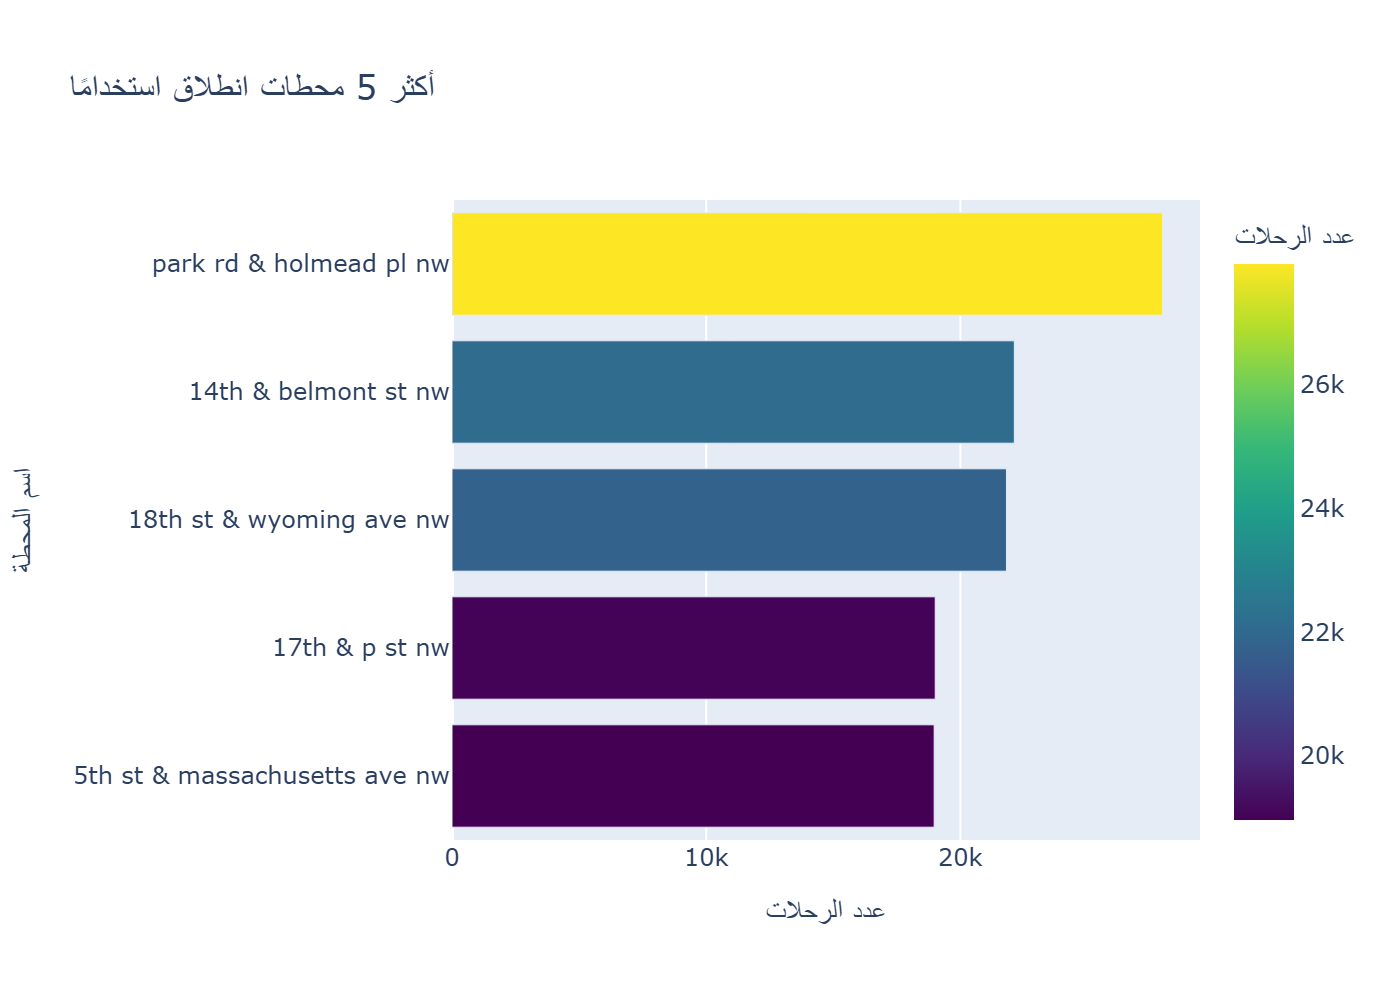

In [5]:


top_start_stations = (
    bike_trips
    .groupby('start_station_name')
    .size()
    .reset_index(name='trip_count')
    .sort_values(by='trip_count', ascending=False)
    .head(5)
)

fig = px.bar(
    top_start_stations,
    x='trip_count',
    y='start_station_name',
    orientation='h',
    color='trip_count',
    color_continuous_scale='Viridis',
    title='أكثر 5 محطات انطلاق استخدامًا',
    labels={'trip_count': 'عدد الرحلات', 'start_station_name': 'اسم المحطة'}
)

fig.update_layout(yaxis={'categoryorder': 'total ascending'})


fig.write_image("top_5_starting_stations.png", scale=2)

from IPython.display import Image
Image("top_5_starting_stations.png")


- "park rd & holmead pl nw" is a clear hotspot for bike trips and may be a strategic location for bike maintenance, redistribution, or marketing efforts.

- The rest of the top stations are relatively close in usage, implying a stable demand in multiple areas.

## a.2 distribution of trips by bike type and subscription type

This code calculates the number of trips grouped by both bike type and subscription type. It then creates a grouped bar chart to compare trip counts across different bike types for each subscription category, providing a clear visual of usage patterns.


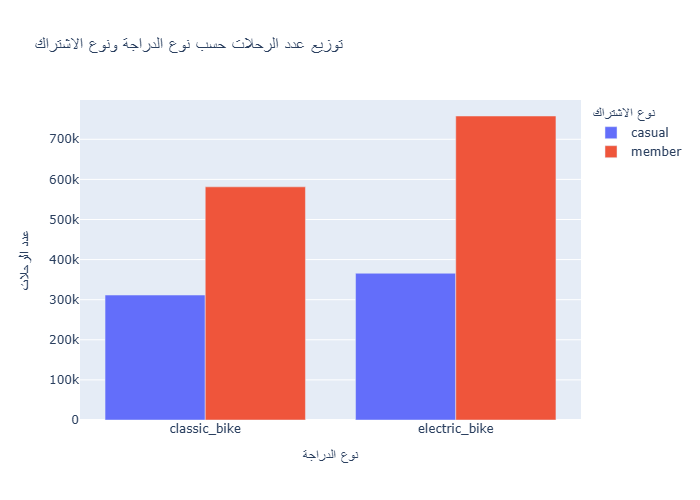

In [6]:

trip_distribution = (
    bike_trips
    .groupby(['rideable_type', 'member_casual'])
    .size()
    .reset_index(name='trip_count')
)

fig = px.bar(
    trip_distribution,
    x='rideable_type',
    y='trip_count',
    color='member_casual',
    barmode='group',
    title='توزيع عدد الرحلات حسب نوع الدراجة ونوع الاشتراك',
    labels={
        'rideable_type': 'نوع الدراجة',
        'trip_count': 'عدد الرحلات',
        'member_casual': 'نوع الاشتراك'
    }
)


fig.write_image("trip_bike_type_subscribition.png", scale=1)

from IPython.display import Image
Image("trip_bike_type_subscribition.png")

- Electric bikes are the preferred choice, particularly among subscribed members, likely due to their speed and convenience for commuting.

- Classic bikes still maintain significant usage, especially among casual riders, potentially due to availability, pricing, or familiarity.

- This insight can inform fleet allocation, pricing strategy, and marketing:

    - Consider increasing electric bike availability in member-heavy areas.

    - Promote classic bikes in tourist or casual-use areas.

    - Upsell casual riders to membership by highlighting electric bike access.

## a.3 Sunburst Chart of Trip Distribution by Bike Type and Subscription for Top 5 Start Stations


This code creates a sunburst chart to visualize the hierarchical distribution of trips. It shows how trip counts break down by bike type and subscription type within the top 5 most used start stations, providing insights into usage patterns across different station and user categories.


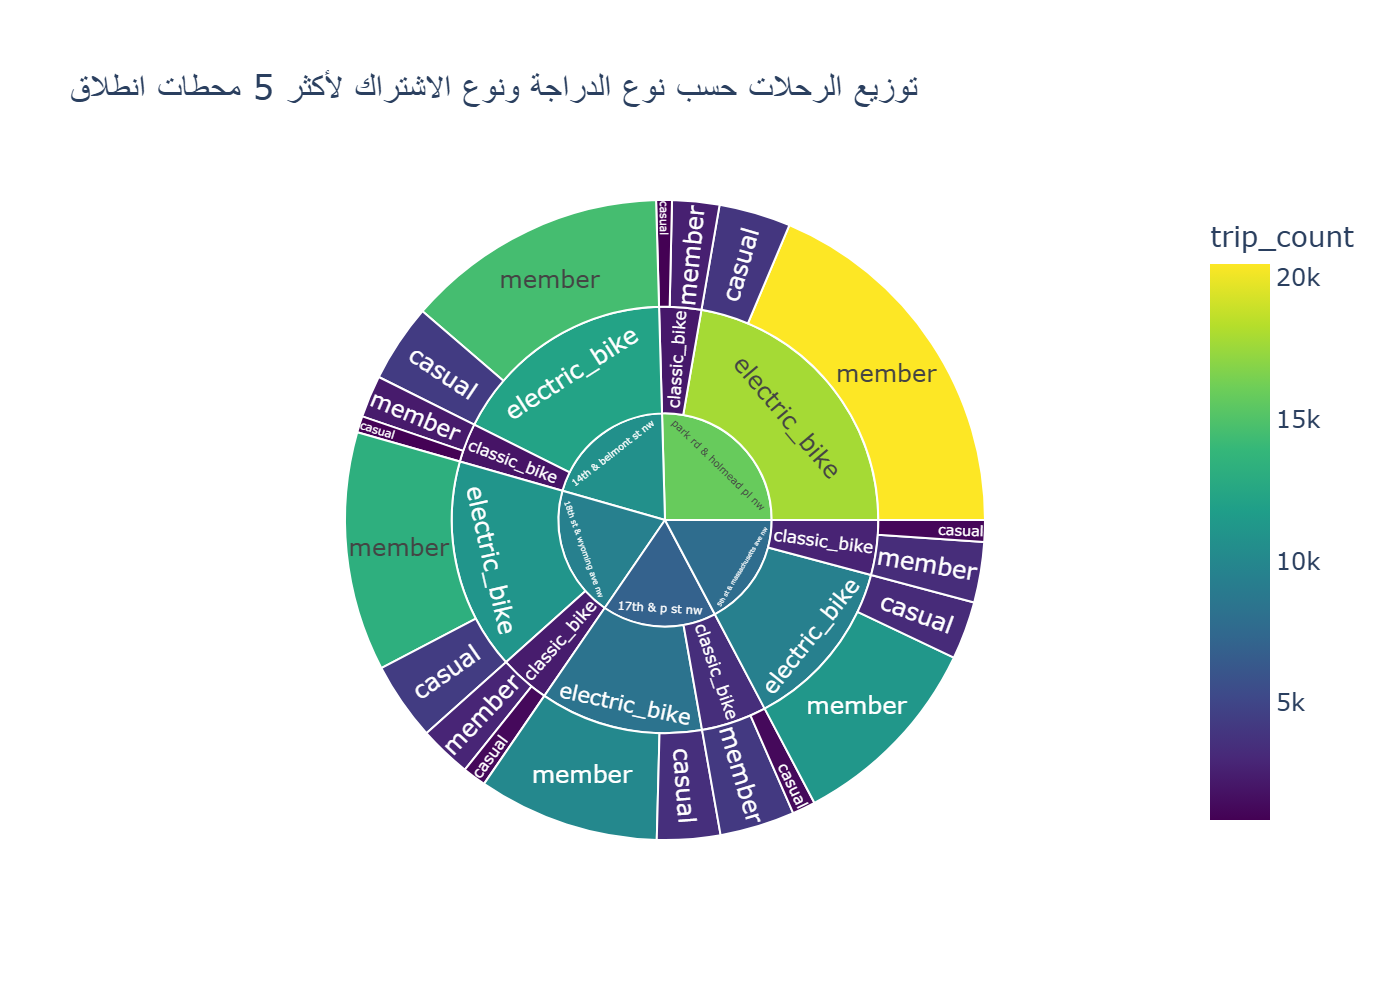

In [8]:


top_stations = (
    bike_trips.groupby('start_station_name')
    .size()
    .reset_index(name='trip_count')
    .sort_values('trip_count', ascending=False)
    .head(5)
)

filtered_trips = bike_trips[bike_trips['start_station_name'].isin(top_stations['start_station_name'])]

grouped = (
    filtered_trips.groupby(['start_station_name', 'rideable_type', 'member_casual'])
    .size()
    .reset_index(name='trip_count')
)

fig = px.sunburst(
    grouped,
    path=['start_station_name', 'rideable_type', 'member_casual'],
    values='trip_count',
    color='trip_count',
    color_continuous_scale='Viridis',
    title='توزيع الرحلات حسب نوع الدراجة ونوع الاشتراك لأكثر 5 محطات انطلاق'
)


fig.write_image("sunburst_top_5_start_stations.png", scale=2)

from IPython.display import Image
Image("sunburst_top_5_start_stations.png")

يوضح مخطط  أن مستخدمي الدراجات الكلاسيكية والكهربائية هم المساهمون الرئيسيون في الرحلات من محطات الانطلاق الأكثر شيوعا. وبينما يستخدم الدراجون غير المنتظمين هذه المحطات أيضا، يبدو أن إجمالي عدد رحلاتهم أقل من إجمالي عدد رحلات الأعضاء. للحصول على رؤى أكثر دقة، وخاصةً فيما يتعلق بأداء كل محطة على حدة

## a.4 the distribution of bike station capacity

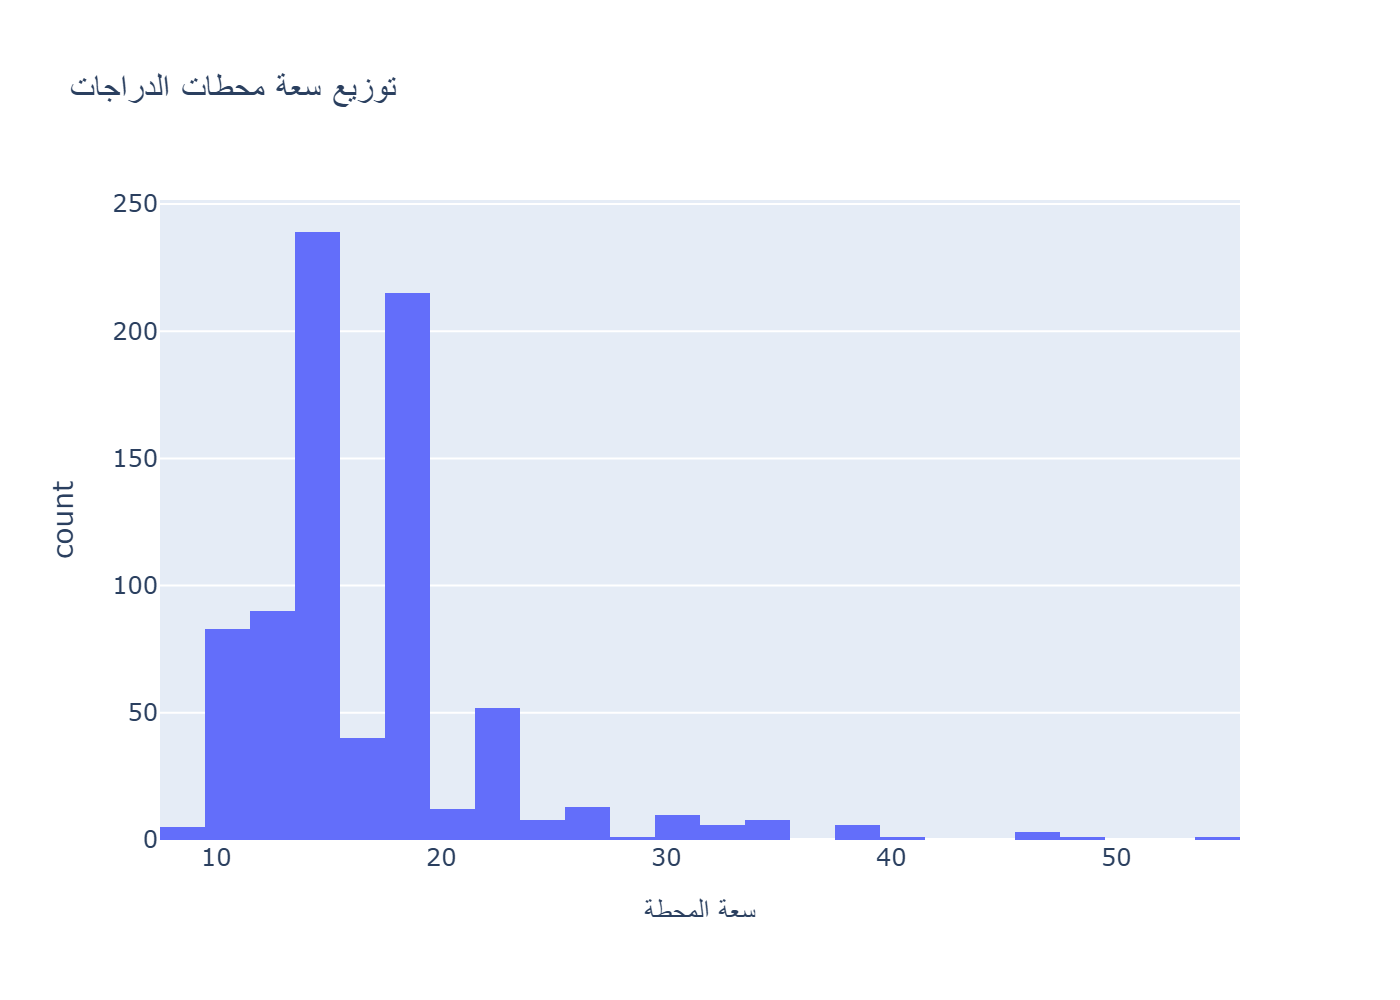

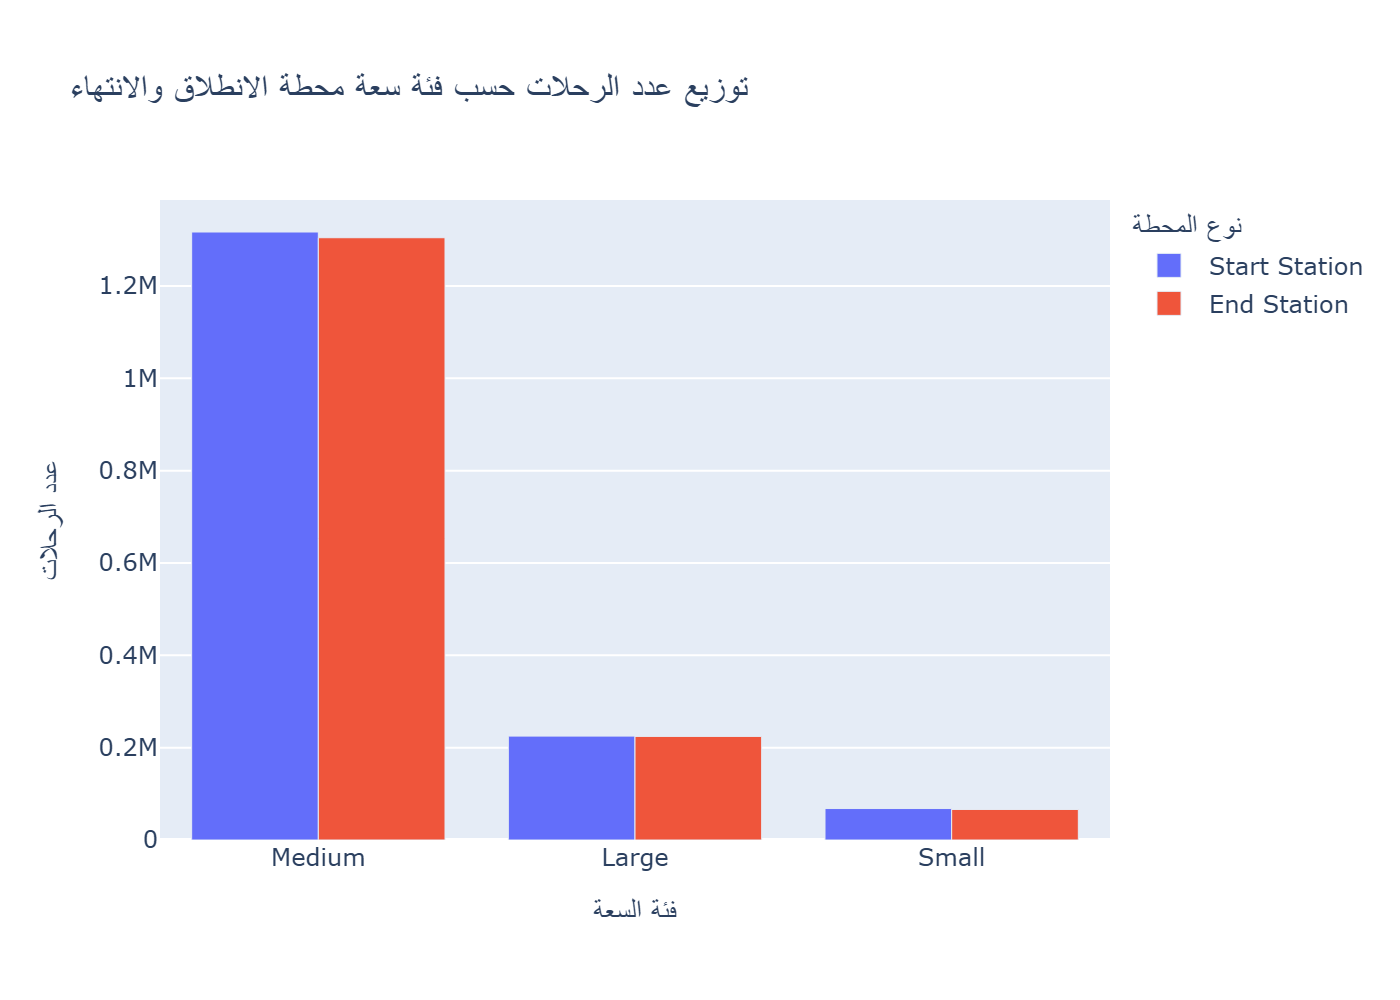

In [16]:


stations = pd.read_csv('stations_updated.csv')


fig_hist = px.histogram(
    stations,
    x='CAPACITY',
    nbins=30,
    title='توزيع سعة محطات الدراجات',
    labels={'CAPACITY': 'سعة المحطة'}
)

fig_hist.write_image("capacity_station_dist.png", scale=2)
display(Image("capacity_station_dist.png")) 


start_counts = bike_trips['start_station_capacity_category'].value_counts().reset_index()
start_counts.columns = ['capacity_category', 'count']
start_counts['type'] = 'Start Station'

end_counts = bike_trips['end_station_capacity_category'].value_counts().reset_index()
end_counts.columns = ['capacity_category', 'count']
end_counts['type'] = 'End Station'

combined_counts = pd.concat([start_counts, end_counts])

fig = px.bar(
    combined_counts,
    x='capacity_category',
    y='count',
    color='type',
    barmode='group',
    title='توزيع عدد الرحلات حسب فئة سعة محطة الانطلاق والانتهاء',
    labels={'capacity_category': 'فئة السعة', 'count': 'عدد الرحلات', 'type': 'نوع المحطة'}
)

fig.write_image("capacity_cat_station_dist.png", scale=2)
display(Image("capacity_cat_station_dist.png")) 



image 1: This suggests that the bike sharing system is primarily equipped with a large number of smaller to medium-sized stations, likely to provide wide coverage and accessibility rather than concentrating capacity in a few very large stations.

image 2:This strongly indicates that 'Medium' sized stations are the workhorses of the bike-sharing system, handling the vast majority of trips. This aligns with the histogram's finding that there are many stations with capacities in the medium range. The near-equal numbers of starts and ends within each category suggest a balanced flow of bikes.

In [13]:
print(bike_trips.columns.tolist())


['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', 'duration_min', 'ride_date_str', 'datetime', 'conditions', 'humidity', 'temp', 'date_str', 'start_parking_zone_name', 'end_parking_zone_name', 'year', 'month', 'day', 'day_name', 'start_in_cbd', 'end_in_cbd', 'trip_total_cost', 'start_station_capacity_category', 'end_station_capacity_category', 'start_nearest_bus_stop_distance_m', 'start_nearest_metro_stop_distance_m', 'end_nearest_bus_stop_distance_m', 'end_nearest_metro_stop_distance_m', 'end_distance_to_cbd_m', 'end_proximity_to_cbd', 'start_geohash', 'end_geohash', 'date', 'start_zone_activity', 'weather_condition', 'end_payment_date']


## b.1 Histogram of Trip Duration Distribution


This code filters the bike trips data to include only trips with durations between 1 and 120 minutes to avoid outliers. It then creates a histogram with 40 bins to show the distribution of trip durations in minutes. The plot is styled to be static and compact by disabling interactivity and adjusting layout parameters for clarity.


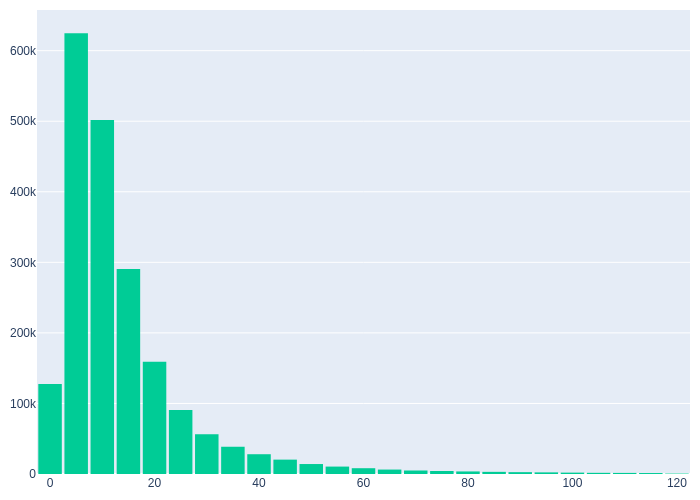

In [ ]:

filtered_trips = bike_trips[(bike_trips['duration_min'] > 0) & (bike_trips['duration_min'] <= 120)]

fig = px.histogram(
    filtered_trips,
    x='duration_min',
    nbins=40,
    title=None,
    labels={'duration_min': 'مدة الرحلة (دقائق)'},
    color_discrete_sequence=['#00CC96']
)

fig.update_layout(
    width=800,
    height=600,
    showlegend=False,
    margin=dict(l=10, r=10, t=10, b=10),
    xaxis_title=None,
    yaxis_title=None,
    bargap=0.1
)

fig.update_traces(hoverinfo='skip', hovertemplate=None)

fig.write_image("static_trip_duration_histogram.png", scale=1)

from IPython.display import Image
Image("static_trip_duration_histogram.png")


يشير الرسم البياني بوضوح إلى أن الغالبية العظمى من رحلات الدراجات في هذه المجموعة من البيانات تتراوح مدتها بين القصيرة والقصيرة جداً، مع تفضيل كبير للرحلات التي تستغرق أقل من 20 دقيقة. هذا يشير إلى أن نظام مشاركة الدراجات يُستخدم بشكل رئيسي للتنقلات السريعة، أو المهمات القصيرة، أو لنقل الركاب في الميل الأول/الأخير، بدلاً من الرحلات الترفيهية الطويلة. يُبرز الانخفاض الكبير في وتيرة الرحلات بعد بضع دقائق فقط كفاءة وراحة الدراجات في النقل السريع لمسافات قصيرة.

## b.2 Boxplot of Trip Duration by Bike Type

This code filters the bike trips dataset to keep only trips with a positive duration less than or equal to 120 minutes. It then creates a boxplot to show the distribution of trip durations for each bike type. The visualization helps compare how trip lengths vary across different bike categories.

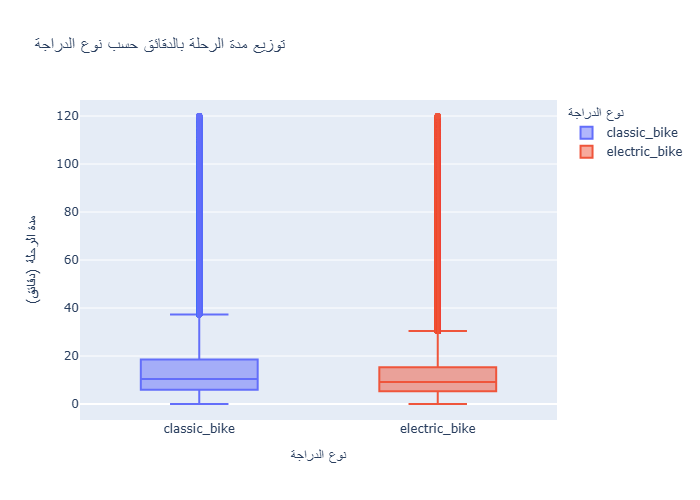

In [ ]:
from IPython.display import Image

filtered_trips = bike_trips[(bike_trips['duration_min'] > 0) & (bike_trips['duration_min'] <= 120)]

fig = px.box(
    filtered_trips,
    x='rideable_type',
    y='duration_min',
    title='توزيع مدة الرحلة بالدقائق حسب نوع الدراجة',
    labels={
        'rideable_type': 'نوع الدراجة',
        'duration_min': 'مدة الرحلة (دقائق)'
    },
    color='rideable_type'
)

fig.write_image("boxplot_trip_duration.png", scale=1)

Image("boxplot_trip_duration.png")

The boxplot reveals a clear distinction in trip duration patterns between classic and electric bikes:

- Electric bikes are generally used for shorter trips compared to classic bikes. Their median duration is lower, and their interquartile range is tighter and also shifted towards shorter durations. This could be due to factors like their higher speed allowing users to cover distances more quickly, or perhaps they are preferred for very quick, convenient trips.

- Classic bikes, while still primarily used for relatively short trips, show a slightly wider range and a higher median duration. This might indicate they are used for a broader variety of trip purposes, including slightly longer journeys where speed is less of a primary factor or where an electric assist is not needed.

## b.3 Boxplot of Trip Duration by Subscription Type


This code filters bike trips to include only those with a positive and reasonable duration (up to 120 minutes). It then creates a boxplot to visualize the distribution of trip durations for each subscription type (member or casual). The plot highlights differences in trip duration patterns between subscription groups.

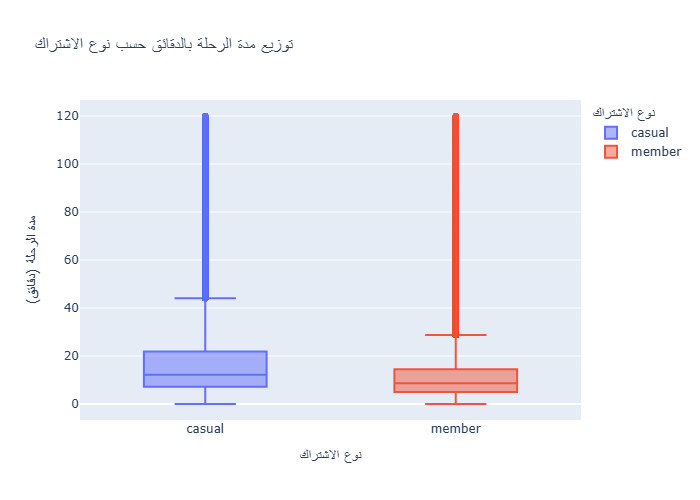

In [ ]:
from IPython.display import Image

filtered_trips = bike_trips[(bike_trips['duration_min'] > 0) & (bike_trips['duration_min'] <= 120)]

fig = px.box(
    filtered_trips,
    x='member_casual',
    y='duration_min',
    title='توزيع مدة الرحلة بالدقائق حسب نوع الاشتراك',
    labels={
        'member_casual': 'نوع الاشتراك',
        'duration_min': 'مدة الرحلة (دقائق)'
    },
    color='member_casual'
)

fig.write_image("boxplot_duration_by_subscription.png", scale=1)

Image("boxplot_duration_by_subscription.png")


يبدو أن الأعضاء يستخدمون خدمة مشاركة الدراجات لرحلات قصيرة عملية وفعّالة، بينما يتمتع المستخدمون العاديون بأنماط استخدام أوسع، بما في ذلك رحلات أطول. وهذا يتماشى مع التوقعات النموذجية للخدمات القائمة على الاشتراك مقارنةً بالاستخدامات غير المنتظمة.

## b.4 Mapping Bike Stations with Long Trips (Over One Day)


This code identifies bike trips lasting more than one day (over 1440 minutes) and aggregates their counts by station, considering both trip start and end locations. Then, it plots these stations on a map of Washington D.C., where:

- Each station is represented by a point located by its latitude and longitude.
- The size of each point reflects the total number of long-duration trips associated with that station (combined starts and ends).
- This visualization helps to identify stations with the highest activity of unusually long bike trips.

C:\Users\Ahmad Abboud\AppData\Local\Temp\ipykernel_10780\3277379812.py:46: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



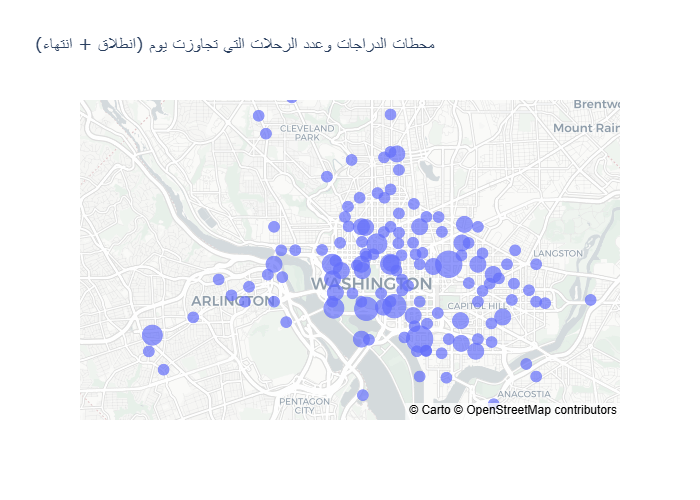

In [ ]:
import plotly.express as px

long_trips = bike_trips[bike_trips['duration_min'] > 1440]

start_counts = (
    long_trips.groupby(['start_station_id', 'start_lat', 'start_lng'])
    .size()
    .reset_index(name='long_trip_count_start')
)

end_counts = (
    long_trips.groupby(['end_station_id', 'end_lat', 'end_lng'])
    .size()
    .reset_index(name='long_trip_count_end')
)

total_counts_start = start_counts.rename(columns={
    'start_station_id': 'station_id',
    'start_lat': 'lat',
    'start_lng': 'lng',
    'long_trip_count_start': 'long_trip_count'
})
total_counts_end = end_counts.rename(columns={
    'end_station_id': 'station_id',
    'end_lat': 'lat',
    'end_lng': 'lng',
    'long_trip_count_end': 'long_trip_count'
})

total_counts = pd.concat([total_counts_start, total_counts_end])

total_counts = (
    total_counts.groupby(['station_id', 'lat', 'lng'])
    .agg({'long_trip_count': 'sum'})
    .reset_index()
)

fig = px.scatter_mapbox(
    total_counts,
    lat='lat',
    lon='lng',
    size='long_trip_count',
    size_max=20,
    zoom=11,
    mapbox_style='carto-positron',
    title='محطات الدراجات وعدد الرحلات التي تجاوزت يوم (انطلاق + انتهاء)',
    hover_name='station_id',
    hover_data={'lat': True, 'lng': True, 'long_trip_count': True}
)

fig.write_image("long_trips_stations_map.png", scale=1)

from IPython.display import Image
Image("long_trips_stations_map.png")


تُحدد الخريطة بدقة التوزيع الجغرافي للمحطات المُستخدمة في رحلات الدراجات الهوائية الطويلة. وتُشير إلى أن المحطات في المناطق المركزية ذات النشاط العالي في واشنطن العاصمة هي الأكثر ارتباطًا بالرحلات التي تستغرق أكثر من يوم. ويشير هذا النمط إلى أن هذه الرحلات الطويلة ترتبط في المقام الأول بالاستخدام المكثف ضمن منطقة الخدمة الرئيسية، ربما من قِبل المستخدمين (مثل السياح أو ركاب محددين) الذين يستخدمون الدراجات لفترات طويلة داخل المدينة

## c.1 Combined Histogram and Boxplot of Trip Cost Distribution


This code creates a figure with two subplots stacked vertically sharing the same x-axis:

- **Histogram (Top Plot):**  
  Shows the frequency distribution of trip total costs using 50 bins, providing insight into how trip costs are spread across different ranges.

- **Boxplot (Bottom Plot):**  
  Displays the summary statistics of trip costs, including median, quartiles, and potential outliers, oriented horizontally for easy comparison.

- Both plots together give a comprehensive view of the distribution shape and key statistics of trip costs within a single figure.


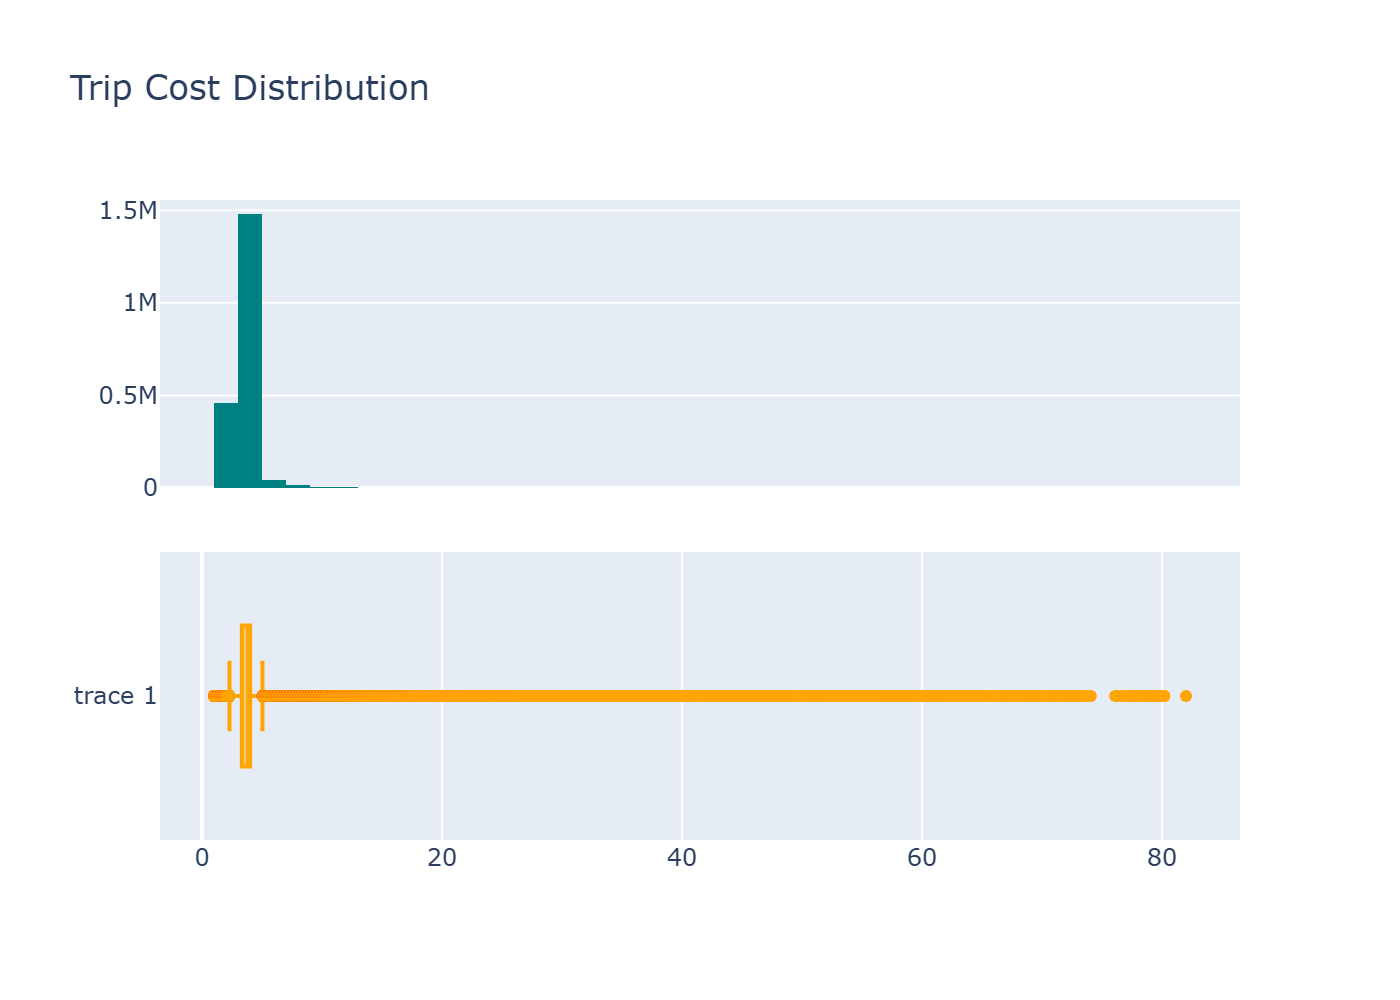

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

fig.add_trace(go.Histogram(x=bike_trips['trip_total_cost'], nbinsx=50, marker_color='teal'), row=1, col=1)

fig.add_trace(go.Box(x=bike_trips['trip_total_cost'], orientation='h', marker_color='orange'), row=2, col=1)

fig.update_layout(height=500, title_text="Trip Cost Distribution", showlegend=False)

fig.write_image("trip_cost_distribution.png", scale=2)

from IPython.display import Image
Image("trip_cost_distribution.png")


تشير المخططات البيانية المجمعة بقوة إلى أن الغالبية العظمى من رحلات الدراجات الهوائية منخفضة التكاليف للغاية، مع تركيز كبير على الحد الأدنى الممكن للتكلفة. وهذا يشير إلى أن نموذج التسعير، أو سلوك المستخدم، يشجع على رحلات متكررة وقصيرة، وبالتالي منخفضة التكلفة. ومع ذلك، هناك عدد قليل جدًا من الرحلات الشاذة ذات التكاليف الأعلى بكثير، ويعزى ذلك على الأرجح إلى فترات زمنية أطول أو مستويات تسعير محددة. التوزيع غير متوازن للغاية، مما يؤكد أن الرحلات عالية التكلفة تُعدّ استثناءً وليست القاعدة. يمكن أن يعكس هذا النمط استراتيجية ناجحة لتعزيز الاستخدام الواسع النطاق لخدمة مشاركة الدراجات الهوائية، مع انخفاض العوائق.

## c.2 Scatter Plot of Trip Cost vs Duration with Trend Line



This code creates a scatter plot to visualize the relationship between trip duration (in minutes) and trip total cost, along with a trend line showing the average cost pattern:

- **Scatter Plot:**  
  Each point represents a trip, plotted by its duration on the x-axis and cost on the y-axis. Points are semi-transparent and small to handle overplotting.

- **Trend Line:**  
  A moving average (rolling mean) with a window of 300 points smooths the data to highlight the overall trend between trip duration and cost.

- **Data Sampling:**  
  To improve performance and clarity, a sample of 10,000 trips is taken and sorted by duration.

- **Output:**  
  Both scatter points and the trend line are displayed in the same figure for easy comparison.



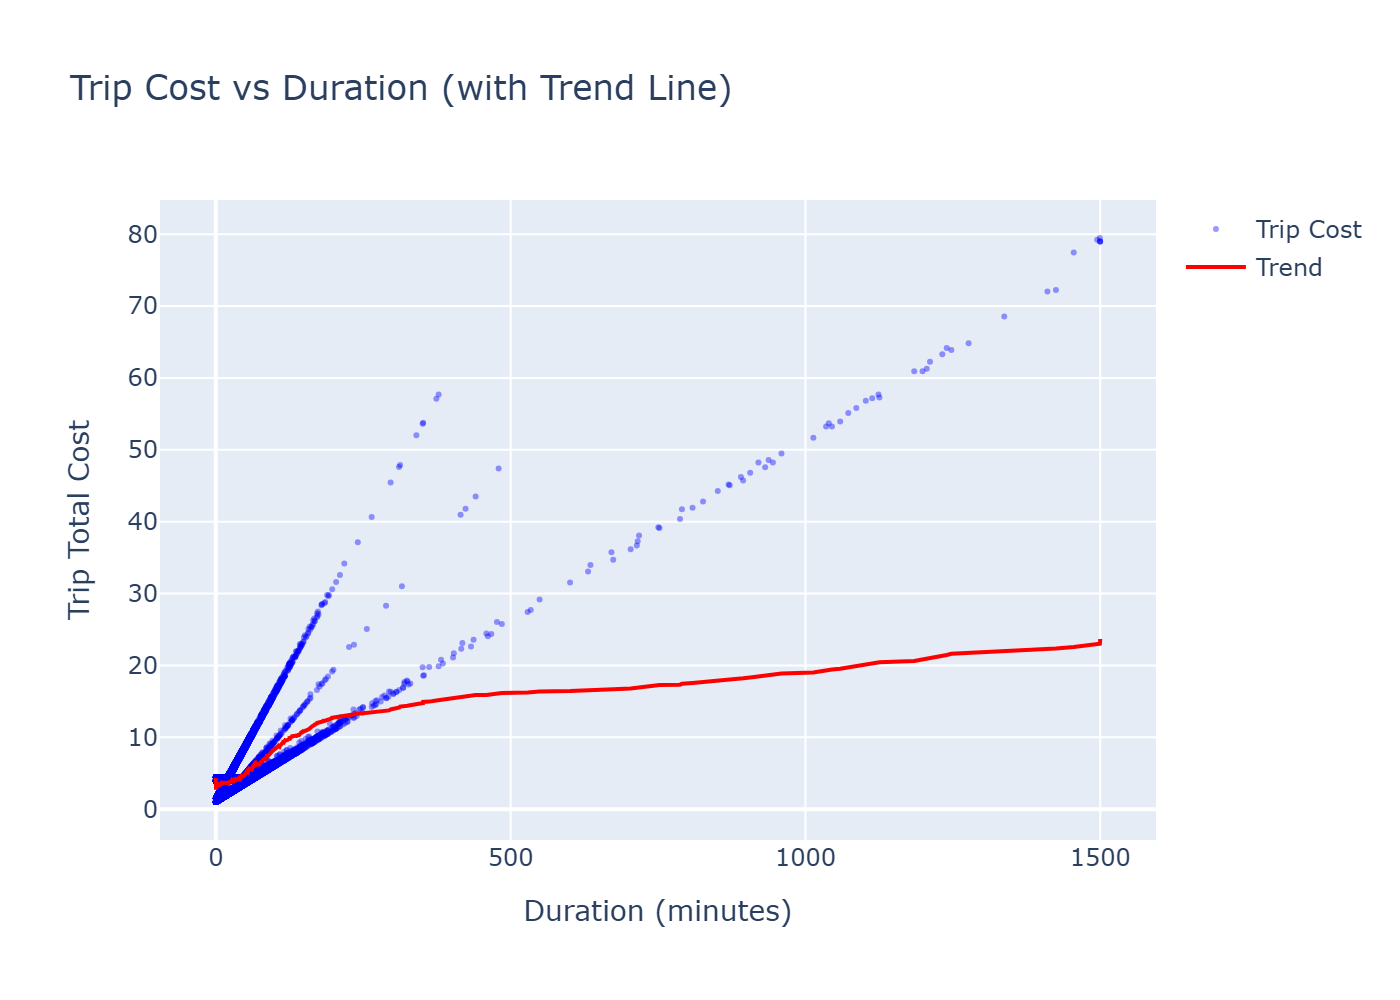

In [21]:
import pandas as pd
import plotly.graph_objects as go

bike_trips_sorted = bike_trips.sort_values(by='duration_min')

sample_size = 100000
bike_trips_sample = bike_trips_sorted.sample(n=sample_size, random_state=42).sort_values(by='duration_min')

window_size = 300
trend_line = bike_trips_sample['trip_total_cost'].rolling(window=window_size, min_periods=1).mean()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=bike_trips_sample['duration_min'],
    y=bike_trips_sample['trip_total_cost'],
    mode='markers',
    name='Trip Cost',
    marker=dict(size=3, opacity=0.4, color='blue')
))

fig.add_trace(go.Scatter(
    x=bike_trips_sample['duration_min'],
    y=trend_line,
    mode='lines',
    name='Trend',
    line=dict(color='red', width=2)
))

fig.update_layout(
    title="Trip Cost vs Duration (with Trend Line)",
    xaxis_title="Duration (minutes)",
    yaxis_title="Trip Total Cost",
    height=500
)
fig.write_image("Trip_Cost_vs_Duration.png", scale=2)
display(Image("Trip_Cost_vs_Duration.png")) 


يوضح الرسم البياني بوضوح أن معظم الرحلات قصيرة وغير مكلفة. يبدو أن نموذج التسعير يشهد زيادة كبيرة في التكلفة الأولية مع مرور الوقت، إلا أن هذه الزيادة تتضاءل بشكل ملحوظ، أو تستقر التكاليف، في الرحلات الأطول. يُشجع هذا الهيكل على الاستخدام المتكرر قصير الأمد. يشير وجود تكاليف شاذة عالية في الرحلات الطويلة إلى أنه على الرغم من احتمال استقرار متوسط ​​تكلفة التأجير طويل الأمد، إلا أن بعض الرحلات الطويلة جداً قد تُحمّل رسومًا باهظة، ربما بسبب حد أقصى يومي أو غرامة لتجاوز حدود زمنية معينة.

## c.3 Scatter Plot of Trip Cost vs Temperature by Bike Type


This code creates a scatter plot to explore the relationship between trip cost and temperature, with points colored by bike type:

- **Axes:**  
  The x-axis represents temperature (°C), and the y-axis shows the trip cost.

- **Color Coding:**  
  Different bike types are distinguished by color to observe patterns or differences among bike categories.

- **Visual Details:**  
  Points have reduced opacity and smaller size for better clarity when many points overlap.

- **Output:**  
  The plot is saved as a PNG image and displayed within the notebook for quick visualization.

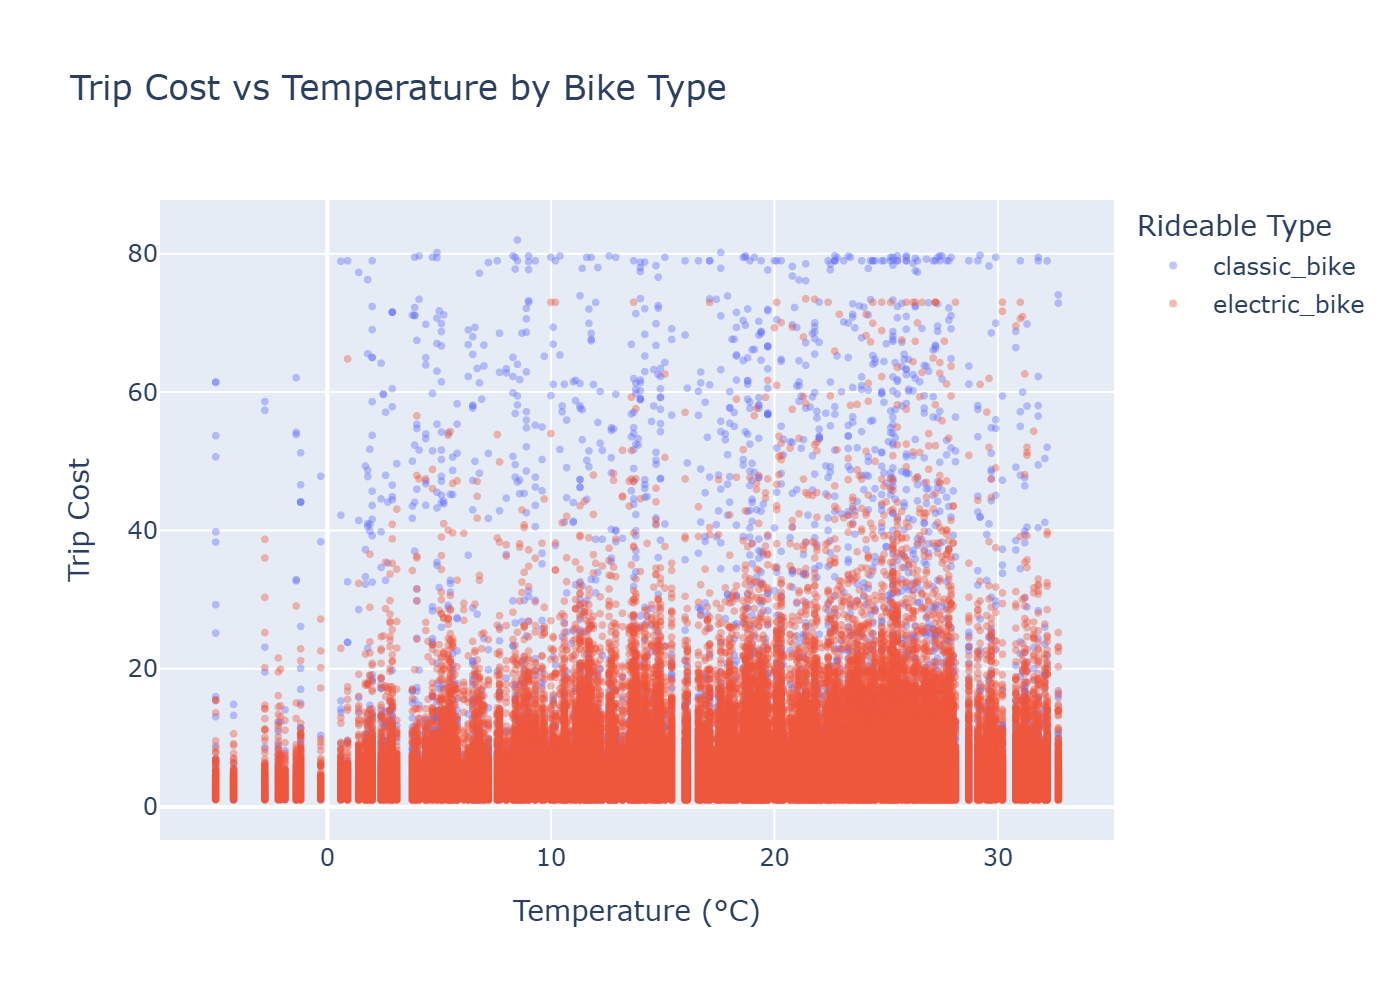

In [ ]:
import plotly.express as px

fig = px.scatter(
    bike_trips,
    x='temp',
    y='trip_total_cost',
    color='rideable_type',
    title='Trip Cost vs Temperature by Bike Type',
    labels={
        'temp': 'Temperature (°C)',
        'trip_total_cost': 'Trip Cost',
        'rideable_type': 'Bike Type'
    },
    opacity=0.4,
    height=500
)

fig.update_traces(marker=dict(size=4))
fig.update_layout(legend_title_text='Rideable Type')

fig.write_image("cost_vs_temp_by_bike.png", scale=2)
from IPython.display import Image
Image("cost_vs_temp_by_bike.png")


يكشف الشكل أنه في حين تُستخدم الدراجات الكلاسيكية والكهربائية بكثافة في نطاق درجة حرارة مريح، فإن الدراجات الكهربائية ترتبط بشكل كبير بالرحلات منخفضة التكلفة. في المقابل، تُمثل الدراجات الكلاسيكية الغالبية العظمى من الرحلات الأعلى تكلفة، مما يشير إلى أنها تُستخدم لفترات أطول أو في سيناريوهات تترتب عليها رسوم أعلى، حتى مع اختلاف درجة الحرارة. لا يبدو أن درجة الحرارة نفسها تُحدد تكلفة الرحلة الفردية بشكل مباشر، بل تؤثر على حجم الاستخدام، مع ملاحظة نطاق أوسع من التكاليف للدراجات الكلاسيكية عبر درجات حرارة التشغيل النموذجية. وهذا يعزز فكرة أن الدراجات الكلاسيكية تُستخدم لأنماط رحلات أكثر تنوعًا (وأحيانًا أطول/أكثر تكلفة) من الدراجات الكهربائية، التي يبدو أن استخدامها أكثر توجهًا نحو رحلات قصيرة وفعالة وبالتالي أرخص.

## c.4 Daily and Weekly Revenue Time Series


This code visualizes both daily and weekly total revenues in a single line chart to compare trends over time:

- **Data Preparation:**  
  Creates a copy of the trip data and extracts the normalized end date for each trip as the revenue date.

- **Daily Revenue:**  
  Groups trips by the end date and sums the total trip cost to get daily revenue.

- **Weekly Revenue:**  
  Calculates the start of each week (Monday) for every trip date and sums trip costs per week to get weekly revenue.

- **Combining Data:**  
  Merges daily and weekly revenue data into one dataset, adding a column to distinguish between the two aggregation types.

- **Visualization:**  
  Uses Plotly Express to plot daily and weekly revenue lines on the same figure with different colors for easy comparison, including proper date formatting on the x-axis.

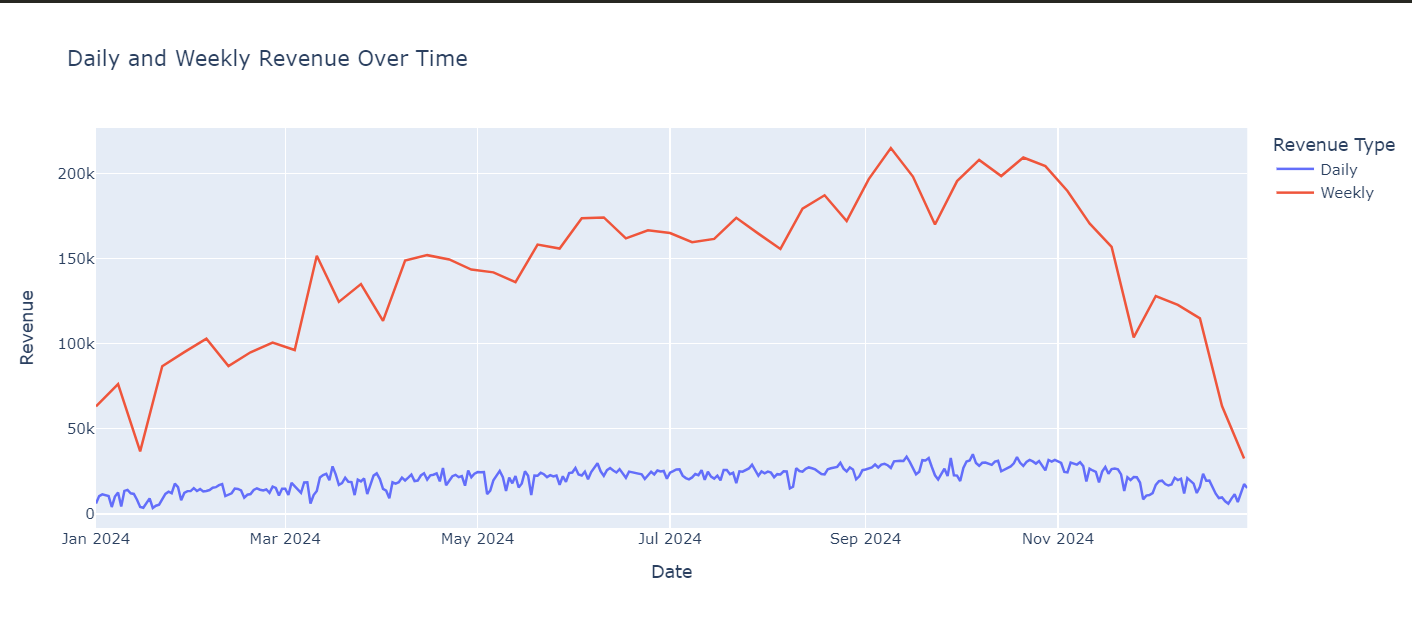

In [ ]:
bike_trips_temp = bike_trips.copy()

bike_trips_temp['end_payment_date'] = pd.to_datetime(bike_trips['ended_at']).dt.normalize()
bike_trips_temp['end_payment_date'].head()
daily_revenue = (
    bike_trips_temp
    .groupby('end_payment_date')['trip_total_cost']
    .sum()
    .reset_index()
    .rename(columns={'trip_total_cost': 'daily_revenue'})
)

weather_df_cut['datetime'] = pd.to_datetime(weather_df_cut['datetime'])
weather_df_cut['payment_date'] = weather_df_cut['datetime'].dt.normalize()

weather_summary = weather_df_cut[['payment_date', 'weather_condition']].drop_duplicates()

daily_summary = pd.merge(daily_revenue, weather_summary, left_on='end_payment_date', right_on='payment_date', how='left')



daily_revenue = (
    bike_trips
    .groupby('end_payment_date')['trip_total_cost']
    .sum()
    .reset_index()
    .rename(columns={'trip_total_cost': 'revenue'})
)
daily_revenue['type'] = 'Daily'
bike_trips['end_payment_date'] = pd.to_datetime(bike_trips['end_payment_date'])
bike_trips['end_payment_week'] = bike_trips['end_payment_date'] - pd.to_timedelta(bike_trips['end_payment_date'].dt.dayofweek, unit='D')

weekly_revenue = (
    bike_trips
    .groupby('end_payment_week')['trip_total_cost']
    .sum()
    .reset_index()
    .rename(columns={'end_payment_week': 'end_payment_date', 'trip_total_cost': 'revenue'})
)
weekly_revenue['type'] = 'Weekly'

combined_revenue = pd.concat([daily_revenue, weekly_revenue])

fig = px.line(
    combined_revenue,
    x='end_payment_date',
    y='revenue',
    color='type',
    title='Daily and Weekly Revenue Over Time',
    labels={'end_payment_date': 'Date', 'revenue': 'Revenue', 'type': 'Aggregation'}
)

fig.update_layout(
    title='Daily and Weekly Revenue Over Time',
    xaxis_title='Date',
    yaxis_title='Revenue',
    legend_title='Revenue Type',
    height=500,
    xaxis=dict(type='date'))
# fig.show()
# after running the code we coded store it cuz the dates got stored in millisecond 
# so we save the image and show it here
Image('Daily_and_Weekly_Revenue_Over_Time.png')

تُظهر السلسلة الزمنية للإيرادات بوضوح نمطاً موسمياً قوياً، حيث تبلغ الإيرادات ذروتها خلال الأشهر الأكثر دفئاً (أواخر الصيف/أوائل خريف عام ٢٠٢٤). وتشهد خدمة مشاركة الدراجات انخفاضاً كبيراً في الإيرادات خلال أشهر الشتاء الباردة.

## C.5 Time Series of Average Monthly Revenue


This code visualizes the average daily revenue aggregated by month as a time series line chart:

- **Data Preparation:**  
  Converts the payment date to datetime format, extracts the month, and groups the data by month.

- **Aggregation:**  
  Calculates the average daily revenue for each month.

- **Visualization:**  
  Uses Plotly Express to create a line plot showing the trend of average monthly revenue over time, with markers on each data point for clarity.

- **Customization:**  
  The x-axis is set to display dates properly, and the chart height is adjusted for better readability.

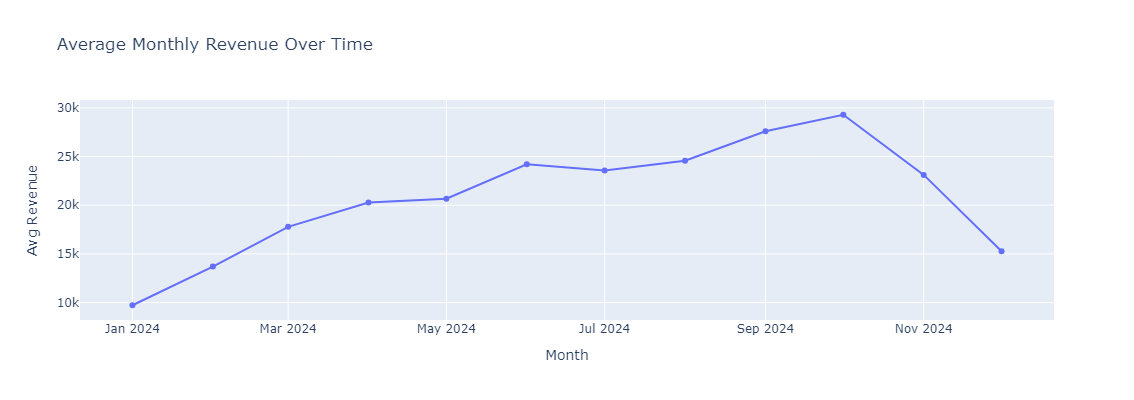

In [ ]:

daily_summary['payment_date'] = pd.to_datetime(daily_summary['payment_date'])

daily_summary['month'] = daily_summary['payment_date'].dt.to_period('M').dt.to_timestamp()

monthly_avg_revenue = (
    daily_summary
    .groupby('month')['daily_revenue']
    .mean()
    .reset_index()
    .rename(columns={'daily_revenue': 'avg_monthly_revenue'})
)

fig = px.line(
    monthly_avg_revenue,
    x='month',
    y='avg_monthly_revenue',
    title='Average Monthly Revenue Over Time',
    labels={'month': 'Month', 'avg_monthly_revenue': 'Avg Revenue'},
    markers=True
)

fig.update_layout(
    xaxis=dict(type='date'),
    height=400
)

# fig.show()
# after running the code we coded store it cuz the dates got stored in millisecond 
# so we save the image and show it here

Image("Average_Monthly_Revenue.png")

تؤكد السلسلة الزمنية لمتوسط ​​الإيرادات الشهرية بشكل قاطع أن خدمة مشاركة الدراجات تشهد موسمية ملحوظة، حيث تبلغ الإيرادات ذروتها في الخريف (أكتوبر) وتصل إلى أدنى مستوياتها خلال أشهر الشتاء (يناير وديسمبر). يُعد هذا النمط الدوري بالغ الأهمية لتوقعات الأعمال وتخصيص الموارد وحملات التسويق الموجهة.

## D1 Geographic Heatmap of Trip Counts per Residential Zone


This code visualizes the distribution of unique bike trips across residential zones using a geographic heatmap:

- **Data Preparation:**
  - Residential zones are loaded from a GeoJSON file into a GeoDataFrame.
  - Trip start and end parking zones are converted to string types.
  - Each trip’s associated zones (start and end) are combined into a list and then exploded to create one row per zone-trip pair.
  - The number of unique trips per zone is counted.
  - The trip counts are merged with the geographic zones data.
  - Missing trip counts are filled with zero.

- **Visualization:**
  - The GeoDataFrame is converted to GeoJSON for Plotly.
  - The centroid of all zones is calculated to center the map.
  - A Plotly choropleth mapbox plot is created, coloring zones based on trip counts.
  - The map uses a continuous orange-red color scale ('OrRd') for trip density.

- **Additional Analysis:**
  - Counts the number of trips that start and end outside any known residential zone.
  - Prints the total number of such trips.

C:\Users\Ahmad Abboud\AppData\Local\Temp\ipykernel_17120\3095651875.py:24: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\Ahmad Abboud\AppData\Local\Temp\ipykernel_17120\3095651875.py:24: DeprecationWarning:

The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.

C:\Users\Ahmad Abboud\AppData\Local\Temp\ipykernel_17120\3095651875.py:28: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



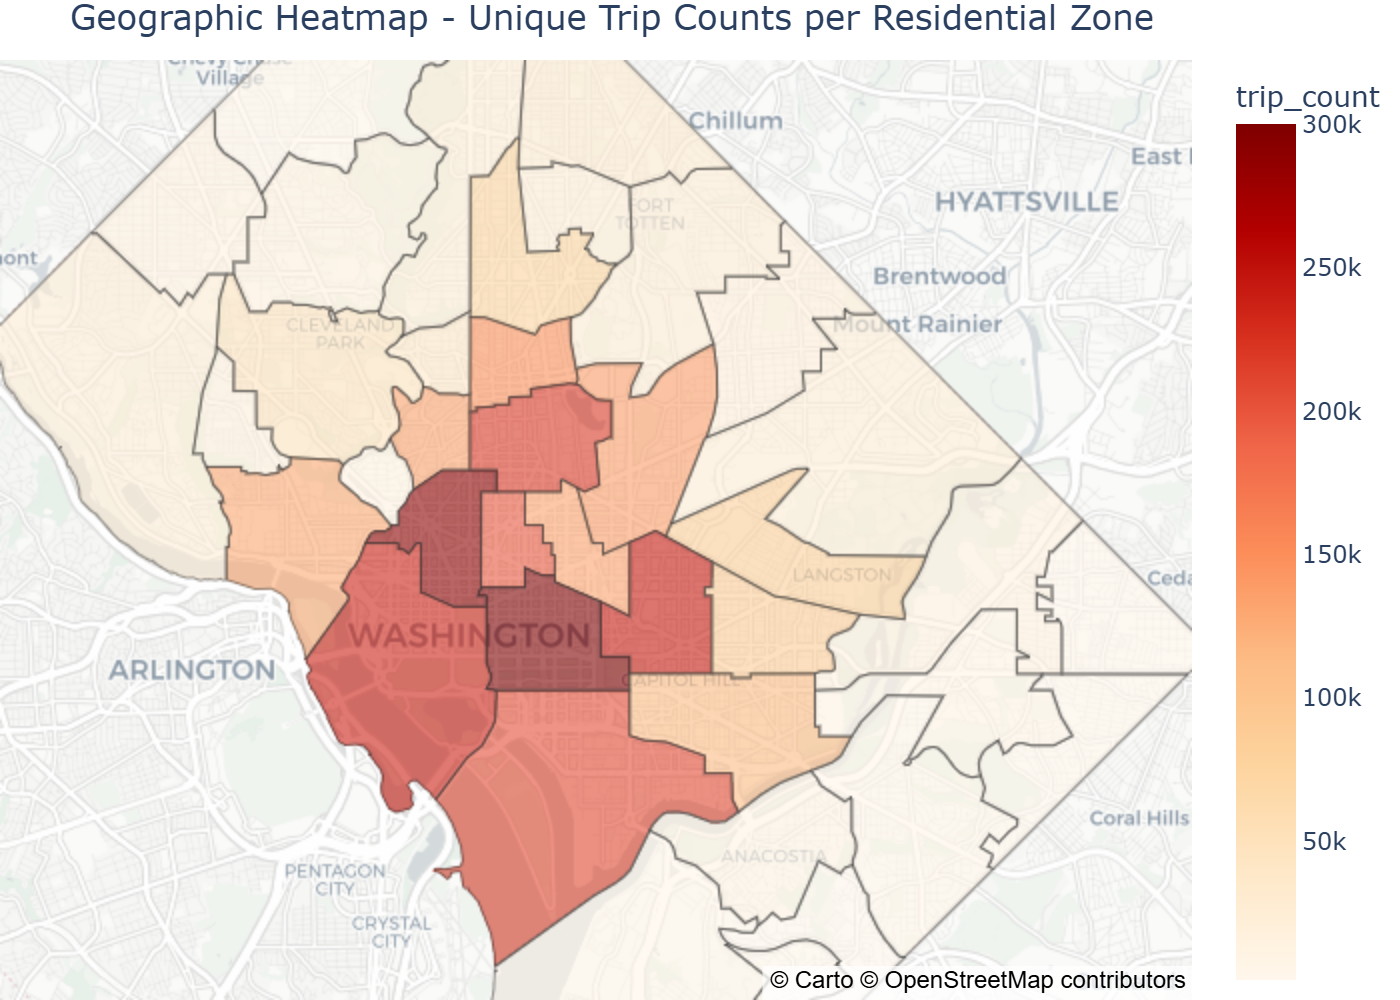

إجمالي عدد الرحلات خارج المناطق السكنية: 229861


In [19]:


import json

zones_gdf = gpd.read_file(os.path.join(file_path, 'Residential_and_Visitor_Parking_Zones.geojson'))

bike_trips['start_parking_zone_name'] = bike_trips['start_parking_zone_name'].astype(str)
bike_trips['end_parking_zone_name'] = bike_trips['end_parking_zone_name'].astype(str)

bike_trips['zones_in_trip'] = bike_trips[['start_parking_zone_name', 'end_parking_zone_name']].values.tolist()

zone_trip_pairs = bike_trips.explode('zones_in_trip').dropna(subset=['zones_in_trip'])

zone_counts = zone_trip_pairs.groupby('zones_in_trip')['ride_id'].nunique().reset_index()
zone_counts.columns = ['zone_name', 'trip_count']

zones_gdf['NAME'] = zones_gdf['NAME'].astype(str)
zone_counts['zone_name'] = zone_counts['zone_name'].astype(str)

zones_gdf = zones_gdf.merge(zone_counts, left_on='NAME', right_on='zone_name', how='left')
zones_gdf['trip_count'] = zones_gdf['trip_count'].fillna(0)

zones_gdf_json = json.loads(zones_gdf.to_json())

zones_gdf_proj = zones_gdf.to_crs(epsg=4326)
centroid = zones_gdf_proj.geometry.centroid.to_crs(epsg=4326).unary_union.centroid

center = {'lat': centroid.y, 'lon': centroid.x}

fig = px.choropleth_mapbox(
    zones_gdf,
    geojson=zones_gdf_json,
    locations='NAME',
    featureidkey='properties.NAME',
    color='trip_count',
    color_continuous_scale='OrRd',
    mapbox_style='carto-positron',
    center=center,
    zoom=11,
    opacity=0.6,
    title='Geographic Heatmap - Unique Trip Counts per Residential Zone'
)

fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.write_image("eographic Heatmap.png", scale=2)
display(Image("eographic Heatmap.png")) 


known_zones = set(zones_gdf['NAME'])
outside_trips = bike_trips[
    ~bike_trips['start_parking_zone_name'].isin(known_zones) &
    ~bike_trips['end_parking_zone_name'].isin(known_zones)
].shape[0]

print(f"إجمالي عدد الرحلات خارج المناطق السكنية: {outside_trips}")

تُظهر خريطة التوزيع الحراري بوضوح أن نشاط رحلات الدراجات يتركز بشكل كبير في المناطق المركزية المكتظة بالسكان في واشنطن العاصمة، والتي تُعدّ مراكز سكنية وتجارية وسياحية رئيسية.

## D2 Bar Chart of Geographic Hash Activity Categories

This code visualizes the distribution of bike trips across different geographic activity categories ("zone_activity"):

- **Data Aggregation:**  
  Counts the number of trips for each unique geographic hash category in the dataset.

- **Plotting:**  
  Creates a bar chart using Plotly Express, showing the trip counts for each category. Each bar is colored by its category for clarity.

- **Customization:**  
  The chart is resized to a smaller fixed dimension (600x400) and the legend is removed to reduce clutter.

- **Output:**  
  The chart is saved as a static PNG image and displayed inside the notebook.

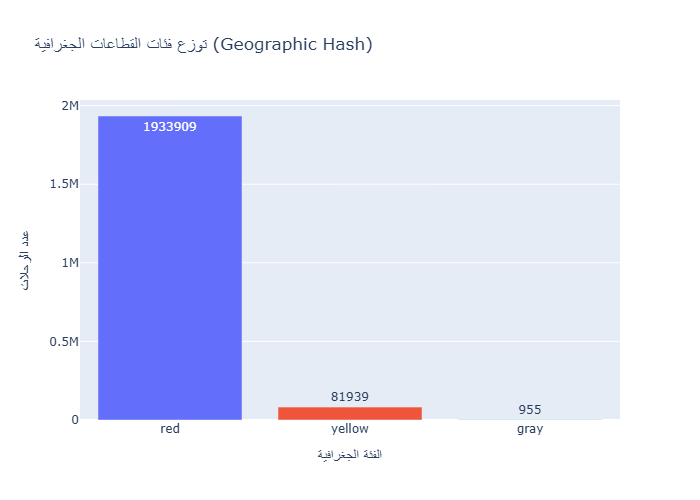

In [ ]:
import plotly.io as pio
from IPython.display import Image, display

zone_activity_counts = bike_trips['start_zone_activity'].value_counts().reset_index()
zone_activity_counts.columns = ['zone_activity', 'trip_count']

fig = px.bar(
    zone_activity_counts,
    x='zone_activity',
    y='trip_count',
    color='zone_activity',
    title='توزع فئات القطاعات الجغرافية (Geographic Hash)',
    labels={'zone_activity': 'الفئة الجغرافية', 'trip_count': 'عدد الرحلات'},
    text='trip_count'
)

fig.update_layout(
    showlegend=False,
    width=600,
    height=400
)

pio.write_image(fig, "zone_activity_distribution.png")


display(Image(filename="zone_activity_distribution.png"))



يوضح الرسم البياني الشريطي بوضوح أن الغالبية العظمى من أنشطة مشاركة الدراجات تتركز ضمن الفئة الجغرافية "الحمراء"، مما يشير بقوة إلى أن هذه هي المناطق الحضرية الرئيسية ذات الطلب والاستخدام الأعلى. تُمثل الفئة "الصفراء" مستوى ثانوياً من النشاط، بينما تُعاني الفئة "الرمادية" من انعدام رحلات الدراجات تقريباً. يتوافق هذا التوزيع مع أنماط التنقل الحضري، حيث تُولّد المناطق المركزية أكبر حركة مرور. بالنسبة لخدمة مشاركة الدراجات، يعني هذا أن الجهود التشغيلية والتوسعية يجب أن تُركز بشكل أساسي على المناطق "الحمراء" وما حولها، مع إيلاء اهتمام ثانوي للمناطق "الصفراء". تُساهم المناطق "الرمادية" حاليًا بشكل ضئيل في إجمالي حجم الرحلات.


## **D3** Histogram of Distance Distributions: CBD, Metro, and Bus Stop


This visualization aims to explore the distribution of distances related to urban accessibility features:

- **Distance to CBD (Central Business District)**
- **Distance to the nearest Metro station**
- **Distance to the nearest Bus Stop**

#### Steps:
1. **Data Selection**:
   - Selects relevant distance columns from the dataset: `proximity_to_cbd`, `distance_to_metro`, and `distance_to_bus_stop`.

2. **Reshape Data**:
   - Uses `pandas.melt()` to convert the data into long format so all distances can be plotted in one figure with color-coded categories.

3. **Plotting Histogram**:
   - A **Histogram** is drawn using Plotly Express, with:
     - `value` on the x-axis (distance values),
     - Count of trips on the y-axis,
     - `distance_type` as the color category.
   - The number of bins is customized to provide a clear view of the distribution (typically 30–50 bins depending on spread).

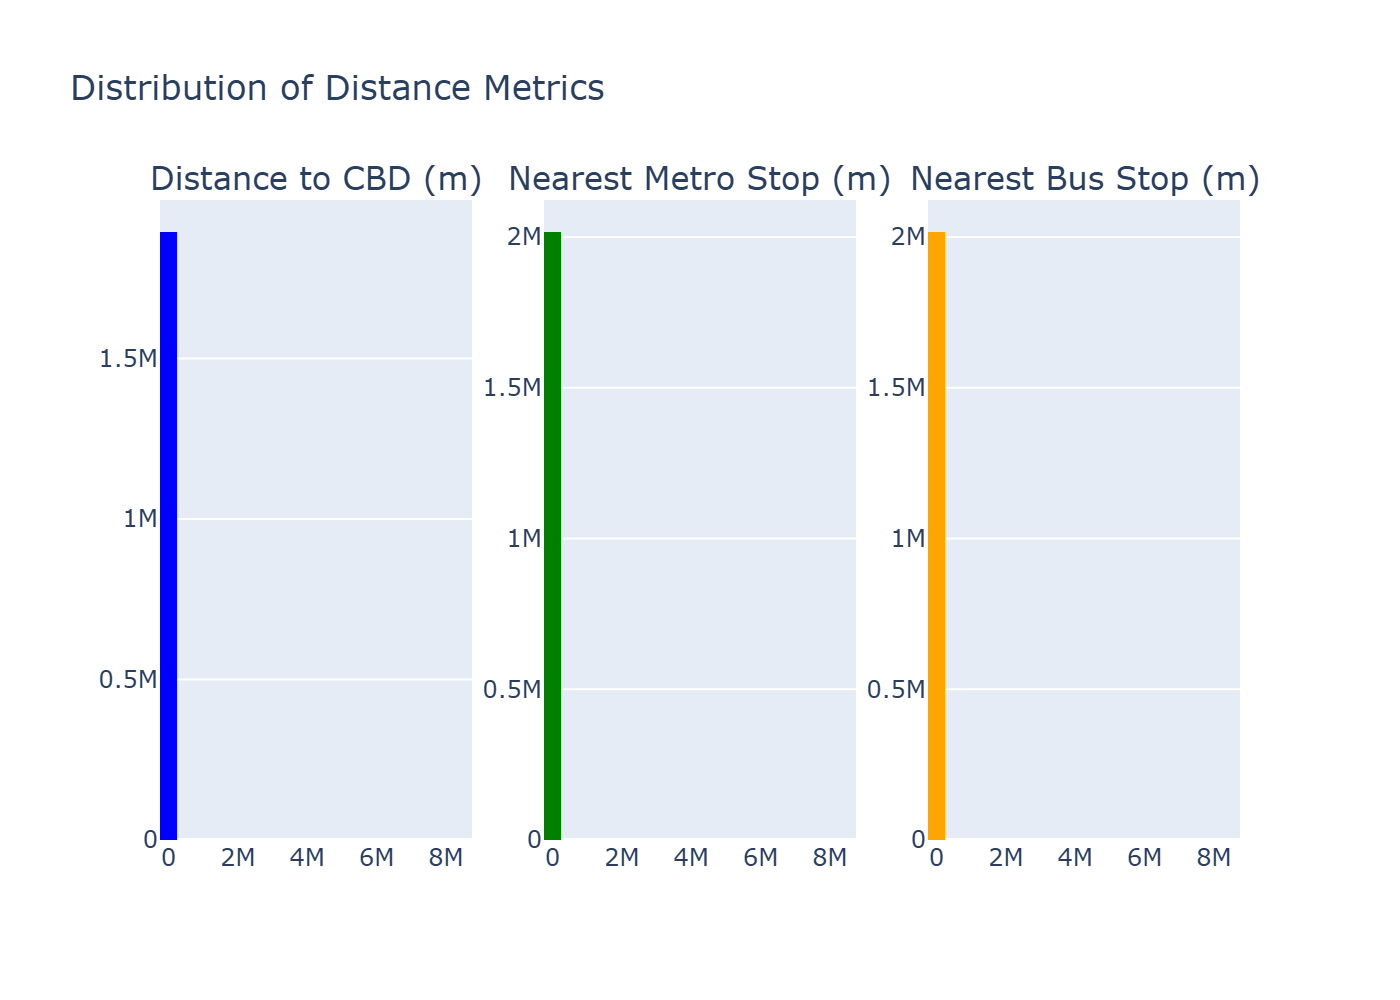

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, subplot_titles=[
    "Distance to CBD (m)",
    "Nearest Metro Stop (m)",
    "Nearest Bus Stop (m)"
])

fig.add_trace(go.Histogram(
    x=bike_trips["end_distance_to_cbd_m"],
    nbinsx=30,
    marker_color='blue',
    name="CBD Distance"
), row=1, col=1)

fig.add_trace(go.Histogram(
    x=bike_trips["start_nearest_metro_stop_distance_m"],
    nbinsx=30,
    marker_color='green',
    name="Metro Distance"
), row=1, col=2)

fig.add_trace(go.Histogram(
    x=bike_trips["start_nearest_bus_stop_distance_m"],
    nbinsx=30,
    marker_color='orange',
    name="Bus Distance"
), row=1, col=3)

fig.update_layout(
    title_text="Distribution of Distance Metrics",
    height=400,
    width=1000,
    showlegend=False
)

fig.write_image("distance_distributions.png", scale=2)

from IPython.display import Image, display
display(Image(filename="distance_distributions.png"))


تشير البيانات بقوة إلى أن خدمة مشاركة الدراجات تُعدّ وسيلة نقل مُكمّلة تُحسّن إمكانية الوصول إلى وسائل النقل العام وتُسهّل السفر لمسافات قصيرة داخل المركز الحضري، بدلاً من استخدامها للتنقلات الرئيسية لمسافات طويلة أو السفر إلى مناطق بعيدة عن وسائل النقل العام. تُعدّ هذه الرؤية أساسية لفهم دور النظام في شبكة النقل العامة للمدينة.

## D4 Bar Chart: Trip Distribution Inside vs Outside the CBD


This code visualizes the **distribution of trips** based on whether they occurred **entirely inside the Central Business District (CBD)** or **outside** it.

#### Steps:
1. **Counting Trips**:
   - `inside_cbd_count`: Number of trips that both started and ended inside the CBD.
   - `outside_cbd_count`: All other trips (total trips minus inside-CBD trips).

2. **Creating a Summary DataFrame**:
   - A small DataFrame (`cbd_distribution`) is created with two categories: `"Inside CBD"` and `"Outside CBD"`.

3. **Bar Chart**:
   - A bar chart is created using Plotly Express to compare the number of trips in each category.
   - X-axis: Location (Inside or Outside CBD)
   - Y-axis: Number of Trips
   - Color is used to distinguish categories.

4. **Saving and Displaying**:
   - The chart is saved as a PNG file.
   - The image is then displayed within the notebook.

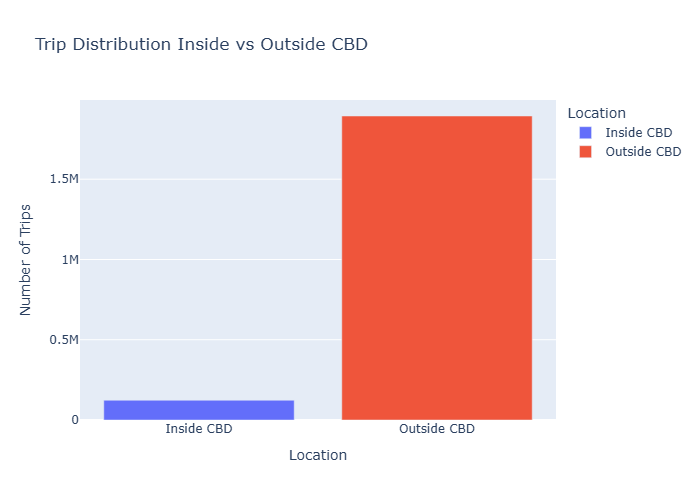

In [ ]:

from IPython.display import Image


inside_cbd_count = bike_trips[(bike_trips['start_in_cbd'] == True) & (bike_trips['end_in_cbd'] == True)].shape[0]
outside_cbd_count = bike_trips.shape[0] - inside_cbd_count

cbd_distribution = pd.DataFrame({
    'Location': ['Inside CBD', 'Outside CBD'],
    'Trip Count': [inside_cbd_count, outside_cbd_count]
})

fig = px.bar(
    cbd_distribution,
    x='Location',
    y='Trip Count',
    color='Location',
    title='Trip Distribution Inside vs Outside CBD',
    labels={'Trip Count': 'Number of Trips', 'Location': 'Location'}
)

fig.write_image("cbd_trips_distribution.png", scale=1)

Image("cbd_trips_distribution.png")


يُقدم هذا الرسم البياني رؤية مُغايرة للبديهة، ولكنها بالغة الأهمية، عند مُقارنته بالرسم البياني السابق "المسافة إلى منطقة الأعمال المركزية". فبينما أظهر الرسم البياني السابق أن مُعظم الرحلات كانت قريبةً جدًا من منطقة الأعمال المركزية، يُوضح هذا الرسم البياني أن مُجمل الرحلات التي تتم داخل منطقة الأعمال المركزية نادرة جداً.

## D5 Bar Chart: Trip Distribution Through CBD by Bike and Subscription Type

This code visualizes the **distribution of trips that passed through the Central Business District (CBD)**, categorized by **bike type** and **subscription type**.

#### Steps:
1. **Filtering Trips**: The dataset is filtered to include only trips that either started or ended inside the CBD.
2. **Grouping and Counting**: The filtered trips are grouped by `rideable_type` and `member_casual`, and the total count of trips in each group is calculated.
3. **Bar Chart**:
   - A grouped bar chart is created using Plotly Express.
   - X-axis: Bike type (`classic_bike`, `electric_bike`, etc.)
   - Y-axis: Number of trips
   - Color: Subscription type (`member` vs `casual`)
4. **Saving and Displaying**:
   - The chart is saved as a PNG image.
   - The image is then displayed within the notebook.

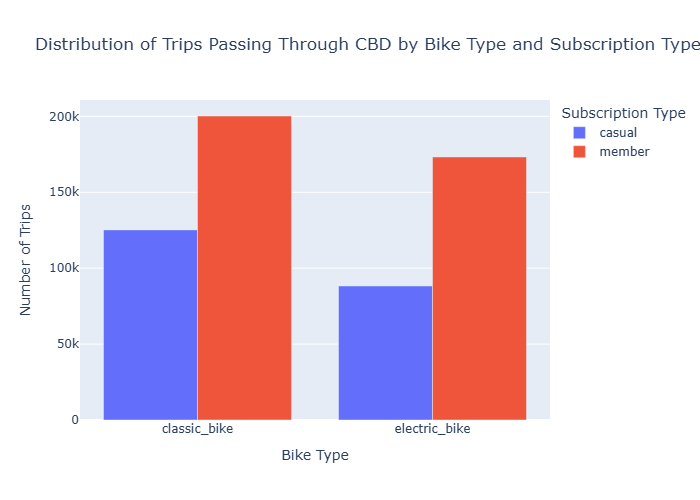

In [ ]:
from IPython.display import Image

inside_cbd_trips = bike_trips[
    (bike_trips['start_in_cbd'] == True) | (bike_trips['end_in_cbd'] == True)
]

trip_distribution = (
    inside_cbd_trips
    .groupby(['rideable_type', 'member_casual'])
    .size()
    .reset_index(name='trip_count')
)

fig = px.bar(
    trip_distribution,
    x='rideable_type',
    y='trip_count',
    color='member_casual',
    barmode='group',
    title='Distribution of Trips Passing Through CBD by Bike Type and Subscription Type',
    labels={
        'rideable_type': 'Bike Type',
        'trip_count': 'Number of Trips',
        'member_casual': 'Subscription Type'
    }
)

fig.write_image("cbd_trip_distribution.png", scale=1)

Image("cbd_trip_distribution.png")


يقدم هذا الرسم البياني فهما دقيقا لاستخدام الدراجات في منطقة الأعمال المركزية:

تُعدّ منطقة الأعمال المركزية مركزا رئيسيًا لأنشطة مشاركة الدراجات، وخاصةً لمشتركي الأعضاء. وهذا يُعزز فكرة استخدام الأعضاء لهذه الخدمة للتنقلات المنتظمة أو الأنشطة اليومية التي غالبًا ما تشمل منطقة الأعمال المركزية.

لا تزال الدراجات الكلاسيكية هي النوع الأكثر استخداما في الرحلات التي تشمل منطقة الأعمال المركزية، سواءً من قِبل الأعضاء أو المستخدمين العاديين.

في حين تكتسب الدراجات الكهربائية شعبية متزايدة، وخاصةً بين الأعضاء، تُغطي الدراجات الكلاسيكية حاليا عددا أكبر من رحلات التنقل في منطقة الأعمال المركزية.

## D6 Chi-Square Test: Subscription Type vs. Distance from CBD


This code investigates the **relationship between user subscription type** (`member` or `casual`) and their **trip's proximity to the Central Business District (CBD)** (`near_cbd` or `far_cbd`) using a **Chi-Square test of independence**.

#### Steps:
1. **Contingency Table**: A cross-tabulation is created between the `end_proximity_to_cbd` and `member_casual` columns to count the number of trips by category.
2. **Chi-Square Test**: The `chi2_contingency()` function is used to:
   - Calculate the Chi-Square statistic (`Chi2`)
   - Compute the p-value (`P-value`)
   - Determine the degrees of freedom (`dof`)
   - Generate the **expected frequencies** under the assumption that the two variables are independent.
3. **Result Interpretation**:
   - A very low p-value (0.0000) indicates a **statistically significant relationship** between the trip distance from CBD and the type of subscription.

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(bike_trips['end_proximity_to_cbd'], bike_trips['member_casual'])

print("جدول التكرار:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nنتائج اختبار كاي-تربيع:")
print(f"Chi2 = {chi2:.4f}")
print(f"P-value = {p:.4f}")
print(f"Degrees of freedom = {dof}")

print("\nالجدول المتوقع:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

جدول التكرار:
member_casual         casual  member
end_proximity_to_cbd                
far_cbd               164119  315899
near_cbd              461588  952078

نتائج اختبار كاي-تربيع:
Chi2 = 383.2230
P-value = 0.0000
Degrees of freedom = 1

الجدول المتوقع:
member_casual                casual         member
end_proximity_to_cbd                              
far_cbd               158606.516571  321411.483429
near_cbd              467100.483429  946565.516571


بمقارنة الترددات المرصودة بالترددات المتوقعة:

أظهر الركاب العاديون عددا أعلى قليلاً لرحلات المناطق النائية (164,119) مما كان متوقعا (158,606.5)، وعددًا أقل قليلاً لرحلات المناطق النائية (461,588) مما كان متوقعا (467,100.5). يشير هذا إلى أن الركاب العاديين أكثر احتمالا نسبيًا لإنهاء رحلاتهم على بُعد أبعد من منطقة الأعمال المركزية مقارنة بعدم وجود علاقة.

أظهر الأعضاء عددا أقل قليلا لرحلات المناطق النائية (315,899) مما كان متوقعا (321,411.5)، وعددًا أعلى قليلاً لرحلات المناطق النائية (952,078) مما كان متوقعا (946,565.5). يشير هذا إلى أن الأعضاء أكثر احتمالًا نسبيًا لإنهاء رحلاتهم على بُعد أقرب من منطقة الأعمال المركزية.

## E1 Line Plot: Daily Averages of Temperature, Wind Speed, and Humidity

This code visualizes the **daily averages** of three weather variables — **temperature**, **wind speed**, and **humidity** — in a single **line chart**.

#### Steps:
1. **Aggregate Data**: The data is grouped by `date`, and the mean of the weather columns (`temp`, `windspeed`, `humidity`) is calculated.
2. **Reshape Data**: The `melt()` function transforms the wide-format DataFrame into a long format suitable for multi-line plotting.
3. **Plotting**: A line chart is created using Plotly Express:
   - `x`: Date.
   - `y`: Value of the weather variable.
   - Lines are colored by the type of weather variable.
4. **Save and Display**: The figure is saved as a PNG image and displayed in the notebook.

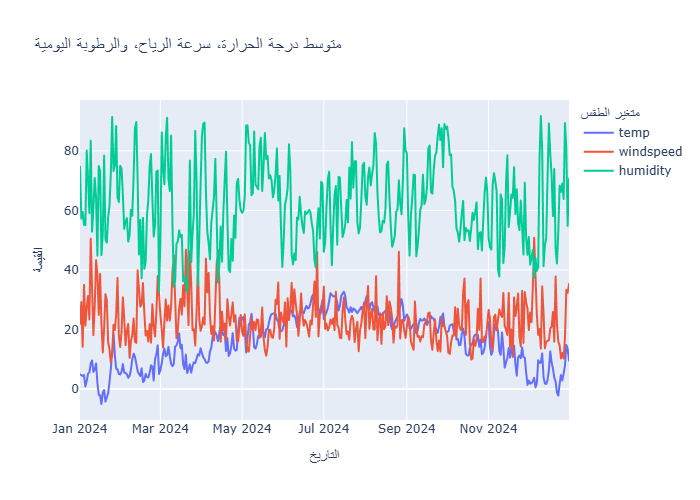

In [ ]:
from IPython.display import Image

daily_weather_avg = (
    bike_trips
    .groupby('date')[['temp', 'windspeed', 'humidity']]
    .mean()
    .reset_index()
)

weather_long = daily_weather_avg.melt(
    id_vars='date',
    value_vars=['temp', 'windspeed', 'humidity'],
    var_name='weather_variable',
    value_name='value'
)

fig = px.line(
    weather_long,
    x='date',
    y='value',
    color='weather_variable',
    title='متوسط درجة الحرارة، سرعة الرياح، والرطوبة اليومية',
    labels={
        'date': 'التاريخ',
        'value': 'القيمة',
        'weather_variable': 'متغير الطقس'
    },
    width=700,
    height=400
)

fig.write_image("daily_weather_summary.png", scale=1)

Image("daily_weather_summary.png")


يعمل نظام مشاركة الدراجات بشكل أساسي كحلٍّ مريح وقصير المسافة للتنقل الحضري، ويستخدمه الأعضاء بكثافة لضمان تنقل فعال داخل منطقة الأعمال المركزية وحولها، مكملاً بذلك النقل العام. تتأثر عملياته وإيراداته بشكل كبير بأنماط الطقس الموسمية والكثافة الجغرافية، حيث يتركز معظم نشاطه في المناطق الحضرية الرئيسية، وتُشكّل المحطات متوسطة الحجم ركائز الشبكة.

## E2 Box Plot: Daily Revenue by Weather Condition

This code visualizes the distribution of **daily revenue** under different **weather conditions** (e.g., sunny, cloudy, rainy) using a **box plot**.

#### Steps:
1. **Group and Aggregate**: The dataset is grouped by `date` and `weather_condition`, then daily revenue is calculated using the sum of `trip_total_cost`.
2. **Plotting**: A **box plot** is created using Plotly Express:
   - `x`: Weather condition.
   - `y`: Daily revenue.
   - Color-coded by weather for visual clarity.
3. **Saving and Displaying**: The plot is saved as a PNG image and displayed in the notebook.


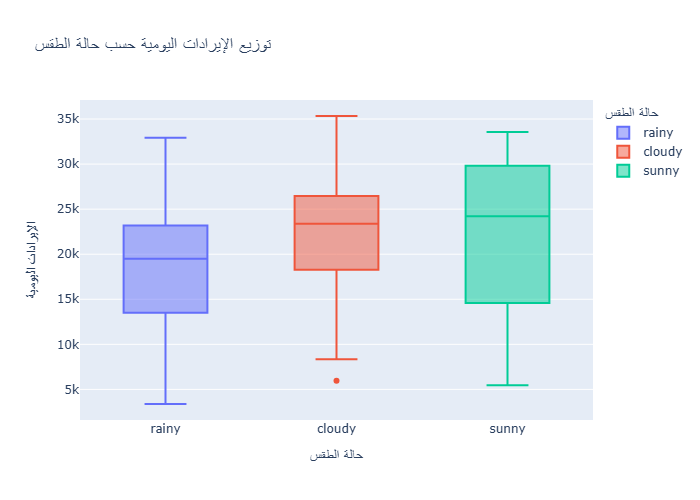

In [ ]:
from IPython.display import Image

daily_revenue_weather = (
    bike_trips
    .groupby(['date', 'weather_condition'])['trip_total_cost']
    .sum()
    .reset_index(name='daily_revenue')
)

fig = px.box(
    daily_revenue_weather,
    x='weather_condition',
    y='daily_revenue',
    title='توزيع الإيرادات اليومية حسب حالة الطقس',
    labels={
        'weather_condition': 'حالة الطقس',
        'daily_revenue': 'الإيرادات اليومية'
    },
    color='weather_condition',
    width=700,
    height=400
)

fig.write_image("box_daily_revenue_by_weather.png", scale=1)

Image("box_daily_revenue_by_weather.png")


يوضح الرسم البياني الصندوقي بوضوح أن الظروف الجوية تؤثر بشكل كبير على الإيرادات اليومية. يرتبط الطقس "المشمس" بأعلى إيرادات يومية وأكثرها ثباتا، بينما يؤدي الطقس "الممطر" إلى انخفاض كبير في الإيرادات. يقع الطقس "الغائم" بينهما. هذا يعزز الطبيعة الموسمية القوية لنشاط مشاركة الدراجات واعتماده على الطقس، مما يشير إلى أن الطقس الملائم عامل أساسي لزيادة عدد الركاب، وبالتالي زيادة الإيرادات.

## E3 Linear Correlation Analysis: Temperature, Humidity, and Daily Revenue

This code examines the **linear relationship** between **average daily temperature**, **average daily humidity**, and **daily revenue** using the **Pearson correlation coefficient**.

#### Steps:
1. **Group by Date**: The data is aggregated on a daily basis.
   - `daily_revenue`: Total revenue per day.
   - `avg_temp`: Average temperature per day.
   - `avg_humidity`: Average humidity per day.
2. **Compute Correlation Matrix**: The `.corr()` method with `pearson` is used to measure the strength and direction of linear relationships between the variables.

#### Interpretation:
- **Temperature vs. Revenue**: Positive correlation (**0.68**), indicating that revenue tends to increase with temperature.
- **Humidity vs. Revenue**: Slight negative correlation (**-0.16**), suggesting revenue may slightly decrease as humidity increases.
- **Temperature vs. Humidity**: Weak positive correlation (**0.15**), meaning they are mostly independent.

A Pearson value close to +1 or -1 indicates strong correlation, while values near 0 imply weak or no linear relationship.

In [ ]:


daily_metrics = (
    bike_trips
    .groupby('date')
    .agg({
        'trip_total_cost': 'sum',
        'temp': 'mean',
        'humidity': 'mean'
    })
    .reset_index()
    .rename(columns={
        'trip_total_cost': 'daily_revenue',
        'temp': 'avg_temp',
        'humidity': 'avg_humidity'
    })
)

correlation_matrix = daily_metrics[['avg_temp', 'avg_humidity', 'daily_revenue']].corr(method='pearson')

print("مصفوفة الارتباط الخطي:")
print(correlation_matrix)


مصفوفة الارتباط الخطي:
               avg_temp  avg_humidity  daily_revenue
avg_temp       1.000000      0.147291       0.680201
avg_humidity   0.147291      1.000000      -0.156864
daily_revenue  0.680201     -0.156864       1.000000


يؤكد تحليل الارتباط كميا أن درجة الحرارة تُعدّ محركا خطيًا رئيسيا للإيرادات اليومية لخدمة مشاركة الدراجات، حيث يرتبط ارتفاع درجات الحرارة ارتباطا وثيقا بزيادة الإيرادات. أما الرطوبة، فرغم تأثيرها السلبي الطفيف، إلا أنها لا تؤثر بشكل كبير على الإيرادات مقارنة بدرجة الحرارة. ويؤكد الاستقلال النسبي لدرجة الحرارة والرطوبة على أهمية درجة الحرارة كعامل مستقل.

## E4 Chi-Square Test: Weather Condition vs. Rideable Type

This code investigates whether there is a statistical relationship between the **weather condition** (`sunny`, `cloudy`, `rainy`) and the **type of bike** used (`classic_bike`, `electric_bike`) using the **Chi-Square test of independence**.

#### Steps:
1. **Filtering**: The dataset is filtered to include only the relevant weather conditions (`sunny`, `cloudy`, `rainy`).
2. **Contingency Table**: A cross-tabulation is created to count how many trips occurred for each combination of weather condition and bike type.
3. **Chi-Square Test**: The `chi2_contingency()` function from `scipy.stats` is used to:
   - Calculate the Chi-Square statistic,
   - Compute the p-value,
   - Determine degrees of freedom,
   - Generate the expected frequencies if there were no relationship.

#### Interpretation:
- **Chi2 = 483.26**, **p-value ≈ 0.0000**: There is a statistically significant relationship between weather condition and bike type since the p-value is much smaller than 0.05.
- This means that the type of bike people choose is likely influenced by the weather conditions.

In [ ]:
from scipy import stats


valid_conditions = ['rainy', 'cloudy', 'sunny']

filtered_data = bike_trips[bike_trips['weather_condition'].isin(valid_conditions)]

contingency_table = pd.crosstab(filtered_data['weather_condition'], filtered_data['rideable_type'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("جدول التكرار:")
print(contingency_table)
print("\nنتائج اختبار كاي-تربيع:")
print(f"Chi2 = {chi2:.4f}")
print(f"P-value = {p:.4f}")
print(f"Degrees of freedom = {dof}")
print("\nالجدول المتوقع:")
print(expected)


جدول التكرار:
rideable_type      classic_bike  electric_bike
weather_condition                             
cloudy                   534497         663685
rainy                    300056         378024
sunny                     58368          82173

نتائج اختبار كاي-تربيع:
Chi2 = 483.2626
P-value = 0.0000
Degrees of freedom = 2

الجدول المتوقع:
[[530484.07287276 667697.92712724]
 [300213.6905191  377866.3094809 ]
 [ 62223.23660814  78317.76339186]]


اختيار نوع الدراجة لا يتوقف على الطقس تماما. فبينما تشهد الدراجات الكهربائية استخداما أكبر بشكل عام، هناك تحول طفيف ولكنه مهم: ففي الأيام المشمسة، تكون الدراجات الكهربائية أكثر تفضيلا نسبيا، بينما تشهد الدراجات الكلاسيكية زيادة طفيفة في الاستخدام في الأيام الغائمة. أما في الأيام الممطرة، فتُظهر استخداما متوازنا نسبيا. قد يشير هذا إلى أن المساعدة الكهربائية تُصبح أكثر جاذبية عندما تكون الظروف مثالية (مشمسة)، أو أن المستخدمين أكثر استعدادا لتجربة أنواع مختلفة من الدراجات عندما يكون الطقس أقل إثارة للقلق.

# Start of task 3

## a.1

In [76]:

baseline_df = daily_summary.copy()
baseline_df = baseline_df[['payment_date', 'daily_revenue']].rename(columns={
    'payment_date': 'date',
    'daily_revenue': 'value'
})
baseline_df['date'] = pd.to_datetime(baseline_df['date'])
baseline_df = baseline_df.sort_values('date')

## a.2

In [77]:


mean_revenue = baseline_df['value'].mean()
print(f"Average revenue (baseline): {mean_revenue:.2f}")


last_date = baseline_df['date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=10)


future_forecast = pd.DataFrame({
    'date': future_dates,
    'predicted_revenue': [mean_revenue] * 10
})


print("\nBaseline Forecast for the Next 10 Days:")
print(future_forecast)

Average revenue (baseline): 20821.26

Baseline Forecast for the Next 10 Days:
        date  predicted_revenue
0 2025-01-01        20821.26153
1 2025-01-02        20821.26153
2 2025-01-03        20821.26153
3 2025-01-04        20821.26153
4 2025-01-05        20821.26153
5 2025-01-06        20821.26153
6 2025-01-07        20821.26153
7 2025-01-08        20821.26153
8 2025-01-09        20821.26153
9 2025-01-10        20821.26153


## a.3

In this section, we use Facebook Prophet to forecast future bike-sharing revenue and optimize model parameters for improved accuracy:

1. **Prophet Setup & Initial Forecast**:  
   - Format the dataframe (`date` as `ds`, `value` as `y`) and train a baseline model.
   - Forecast the next 10 days of revenue using default settings.

2. **Model Evaluation via Cross-Validation**:  
   - Define a function to evaluate Prophet using MAPE (Mean Absolute Percentage Error).
   - Perform time series cross-validation to validate forecast performance.

3. **Hyperparameter Tuning**:  
   - Iterate over combinations of `changepoint_prior_scale`, `seasonality_prior_scale`, and `seasonality_mode`.
   - Select the combination with the lowest MAPE.

4. **Final Forecast with Best Parameters**:  
   - Retrain Prophet using the best-found parameters.
   - Generate a refined 10-day revenue forecast and display the results.

In [ ]:
from prophet import Prophet


prophet_df = baseline_df.rename(columns={
    'date': 'ds',
    'value': 'y'
})

model = Prophet(
    changepoint_prior_scale=0.5,         # يتحكم بحساسية التغيرات في الاتجاه العام
    seasonality_mode='multiplicative',  # نوع الموسمية: مضاعفة أو إضافية
    seasonality_prior_scale=10.0        # يتحكم بتأثير الموسمية
)


model.fit(prophet_df)


future = model.make_future_dataframe(periods=10)
forecast = model.predict(future)


future_forecast = forecast[['ds', 'yhat']].tail(10)
print("🔮 تنبؤ الإيرادات لـ 10 أيام قادمة:")
print(future_forecast)



c:\Users\Ahmad Abboud\Desktop\Data mining\Data Mining\HM_tries\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

DEBUG	cmdstanpy:command.py:do_command()- cmd: where.exe tbb.dll
cwd: None
DEBUG	cmdstanpy:model.py:__init__()- Adding TBB (c:\Users\Ahmad Abboud\Desktop\Data mining\Data Mining\HM_tries\.venv\Lib\site-packages\prophet\stan_model\cmdstan-2.33.1\stan\lib\stan_math\lib\tbb) to PATH
INFO	prophet:forecaster.py:parse_seasonality_args()- Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO	prophet:forecaster.py:parse_seasonality_args()- Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: C:\Users\AHMADA~1\AppData\Local\Temp\tmpaypru0cy\pl2iq14n.json
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfil

🔮 تنبؤ الإيرادات لـ 10 أيام قادمة:
            ds          yhat
366 2025-01-01  11241.134711
367 2025-01-02  11234.767128
368 2025-01-03  10719.379708
369 2025-01-04  10789.669754
370 2025-01-05   9824.944379
371 2025-01-06   9342.379088
372 2025-01-07   9762.181191
373 2025-01-08   9456.300293
374 2025-01-09   9409.543207
375 2025-01-10   8936.508278


C:\Users\Ahmad Abboud\AppData\Local\Temp\ipykernel_15312\3318401073.py:3: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



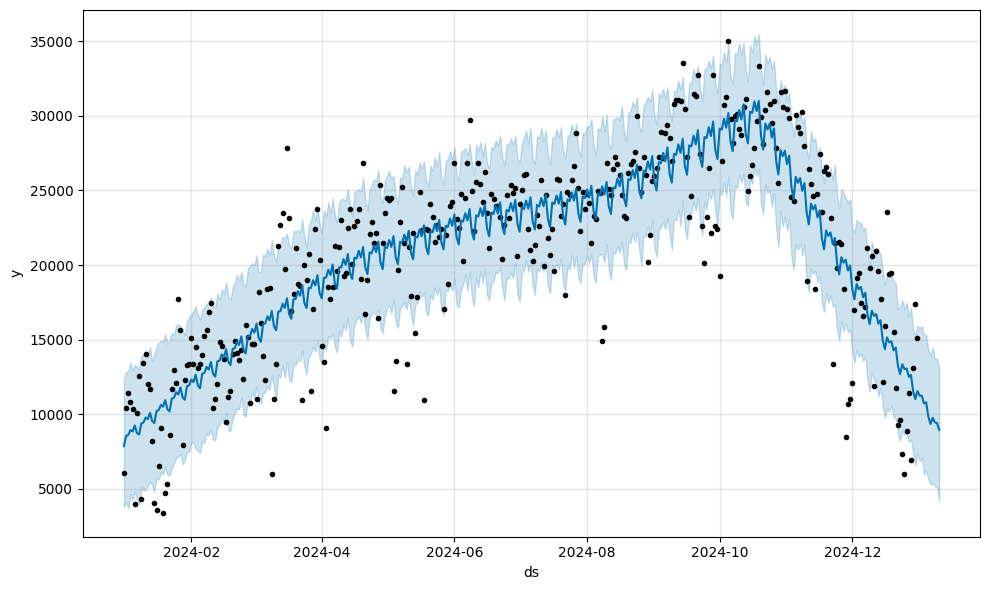

In [80]:
#  عرض الرسم البياني:
fig = model.plot(forecast)
fig.show()

In [82]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet import Prophet

def evaluate_prophet_model(df, changepoint_prior=0.5, seasonality_prior=10.0, mode='multiplicative'):
    model = Prophet(
        changepoint_prior_scale=changepoint_prior,
        seasonality_prior_scale=seasonality_prior,
        seasonality_mode=mode
    )
    model.fit(df)

    # Cross-validation: Initial = training window, period = step size, horizon = how far to forecast
    df_cv = cross_validation(model, initial='180 days', period='30 days', horizon='10 days', parallel="processes")
    df_p = performance_metrics(df_cv)
    
    # Return the mean absolute percentage error (MAPE)
    return df_p['mape'].mean()

In [ ]:
import itertools

changepoint_range = [0.01, 0.1, 0.5]
seasonality_range = [1.0, 10.0, 20.0]
modes = ['additive', 'multiplicative']

# Try all combinations
best_mape = float('inf')
best_params = None

for cp, sp, mode in itertools.product(changepoint_range, seasonality_range, modes):
    mape = evaluate_prophet_model(prophet_df, cp, sp, mode)
    print(f"cp={cp}, sp={sp}, mode={mode} → MAPE={mape:.4f}")
    
    if mape < best_mape:
        best_mape = mape
        best_params = (cp, sp, mode)

print("\n✅ أفضل إعداد:")
print(f"changepoint_prior_scale: {best_params[0]}")
print(f"seasonality_prior_scale: {best_params[1]}")
print(f"seasonality_mode: {best_params[2]}")
print(f"MAPE: {best_mape:.4f}")


In [85]:
best_cp, best_sp, best_mode = best_params

final_model = Prophet(
    changepoint_prior_scale=best_cp,
    seasonality_prior_scale=best_sp,
    seasonality_mode=best_mode
)

final_model.fit(prophet_df)
future = final_model.make_future_dataframe(periods=10)
forecast = final_model.predict(future)

final_forecast = forecast[['ds', 'yhat']].tail(10)
print(" التنبؤ بالإيرادات لـ 10 أيام القادمة (محسّنة):")
print(final_forecast)

DEBUG	cmdstanpy:command.py:do_command()- cmd: where.exe tbb.dll
cwd: None
DEBUG	cmdstanpy:model.py:__init__()- TBB already found in load path
INFO	prophet:forecaster.py:parse_seasonality_args()- Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO	prophet:forecaster.py:parse_seasonality_args()- Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: C:\Users\AHMADA~1\AppData\Local\Temp\tmpaypru0cy\ljope7ow.json
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: C:\Users\AHMADA~1\AppData\Local\Temp\tmpaypru0cy\x3dlblm2.json
DEBUG	cmdstanpy:model.py:_run_cmdstan()- idx 0
DEBUG	cmdstanpy:model.py:_run_cmdstan()- running CmdStan, num_threads: None
DEBUG	cmdstanpy:model.py:_run_cmdstan()- CmdStan args: ['C:\\Users\\Ahmad Abboud\\Desktop\\Data mining\\Data Mining\\HM_tries\\.venv\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin'

 التنبؤ بالإيرادات لـ 10 أيام القادمة (محسّنة):
            ds          yhat
366 2025-01-01  11162.378682
367 2025-01-02  11152.329032
368 2025-01-03  10637.053989
369 2025-01-04  10703.349143
370 2025-01-05   9742.700351
371 2025-01-06   9260.092231
372 2025-01-07   9671.852665
373 2025-01-08   9364.161185
374 2025-01-09   9313.410072
375 2025-01-10   8840.786635


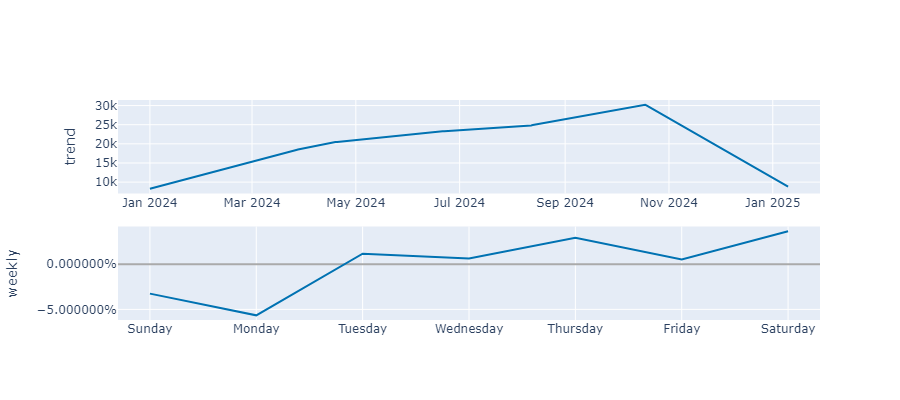

In [ ]:
from prophet.plot import plot_components_plotly
# we have already ran it before and saved the image and brought it to reduce size

# plot_components_plotly(final_model, forecast)

from IPython.display import Image
Image("prophet_trend.png")


| Component  | Insight                                                                   |
| ---------- | ------------------------------------------------------------------------- |
| **Trend**  | General growth until Nov 2024, sharp drop after                           |
| **Weekly** | Low revenue early week (Sun–Mon), peaks toward the weekend (Thu–Sat)      |


## b.1 sampling

In [31]:
bike_trips.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'duration_min', 'ride_date_str', 'datetime',
       'conditions', 'humidity', 'temp', 'date_str', 'start_parking_zone_name',
       'end_parking_zone_name', 'year', 'month', 'day', 'day_name',
       'start_in_cbd', 'end_in_cbd', 'trip_total_cost',
       'start_station_capacity_category', 'end_station_capacity_category',
       'start_nearest_bus_stop_distance_m',
       'start_nearest_metro_stop_distance_m',
       'end_nearest_bus_stop_distance_m', 'end_nearest_metro_stop_distance_m',
       'end_distance_to_cbd_m', 'end_proximity_to_cbd', 'start_geohash',
       'end_geohash', 'date', 'start_zone_activity', 'weather_condition',
       'end_payment_date', 'zones_in_trip', 'end_payment_week'],
      dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Sample data
sampled_df = bike_trips.sample(n=10000, random_state=42).copy()

# Step 2: Create derived features
sampled_df['start_hour'] = pd.to_datetime(sampled_df['started_at']).dt.hour

# Step 3: Feature selection
features = sampled_df[[
    'duration_min',
    'trip_total_cost',
    'zones_in_trip',
    'start_hour',
    'month',
    'day_name',
    'rideable_type',
    'member_casual',
    'start_station_capacity_category',
    'end_station_capacity_category',
    'start_in_cbd',
    'end_in_cbd',
    'end_distance_to_cbd_m',
    'weather_condition',
    'temp',
    'humidity'
]].copy()

# Step 4: Encode categorical variables
categorical_cols = ['day_name', 'rideable_type', 'member_casual',
                    'start_station_capacity_category', 'end_station_capacity_category',
                    'start_in_cbd', 'end_in_cbd', 'weather_condition']

for col in categorical_cols:
    features[col] = LabelEncoder().fit_transform(features[col])


## b2 clustring

A. KMeans Clustering

In [38]:
# Step 1: Drop or impute NaNs
features_cleaned = features.drop(columns=['zones_in_trip'], errors='ignore')  # still drop list columns

# Fill NaNs – choose method based on context
features_cleaned = features_cleaned.fillna(features_cleaned.median(numeric_only=True))  # fill numeric columns

# Optional: If you have categorical columns, fill them separately
for col in features_cleaned.select_dtypes(include='object').columns:
    features_cleaned[col] = features_cleaned[col].fillna(features_cleaned[col].mode()[0])

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_cleaned)


In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

features_cleaned['kmeans_cluster'] = kmeans_labels


B. DBSCAN (Density-Based)

In [41]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)
features['dbscan_cluster'] = dbscan_labels


C. Agglomerative Clustering

In [43]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(X_scaled)
features['agglo_cluster'] = agglo_labels


Comparing:

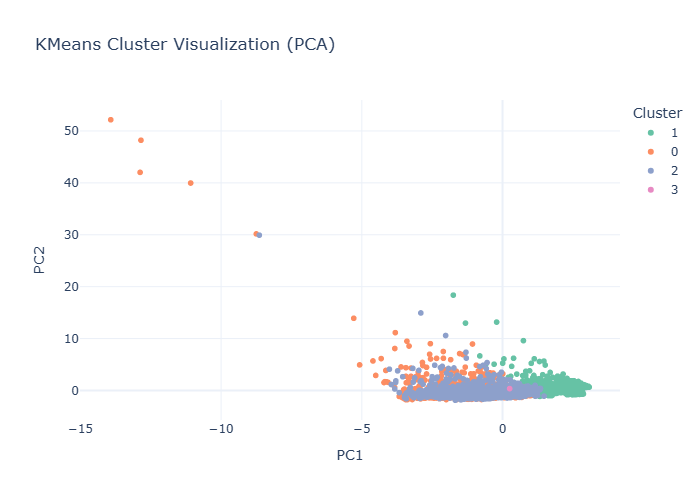

In [49]:
import plotly.express as px
from sklearn.decomposition import PCA

# Step 1: Reduce to 2D with PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Step 2: Add PCA results and cluster labels back to the DataFrame
features['PC1'] = pca_components[:, 0]
features['PC2'] = pca_components[:, 1]
features['kmeans_cluster'] = kmeans_labels.astype(str)  # Convert to string for categorical coloring

# Step 3: Plot with Plotly
fig = px.scatter(
    features, 
    x='PC1', 
    y='PC2', 
    color='kmeans_cluster',
    title='KMeans Cluster Visualization (PCA)',
    labels={'kmeans_cluster': 'Cluster'},
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(template='plotly_white')
fig.write_image('KMeans.png','png')
Image('KMeans.png')

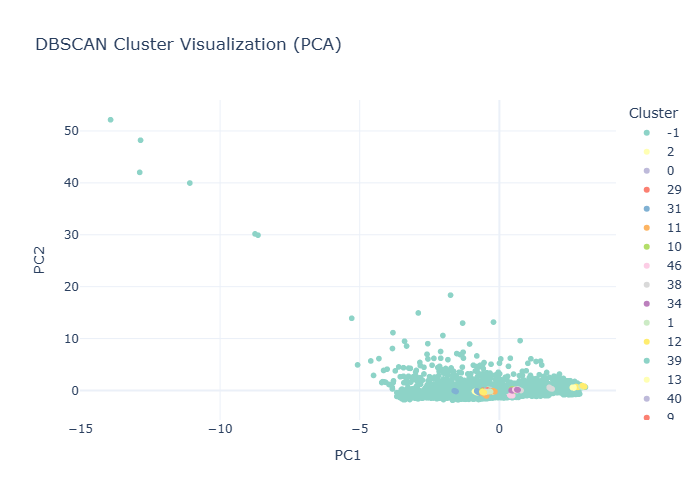

In [50]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add labels to DataFrame (convert -1 to string for noise)
features['dbscan_cluster'] = dbscan_labels.astype(str)

# Plot with Plotly
fig_dbscan = px.scatter(
    features,
    x='PC1',
    y='PC2',
    color='dbscan_cluster',
    title='DBSCAN Cluster Visualization (PCA)',
    labels={'dbscan_cluster': 'Cluster'},
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig_dbscan.update_layout(template='plotly_white')
fig_dbscan.write_image('DBSCAN.png','png')
Image('DBSCAN.png')


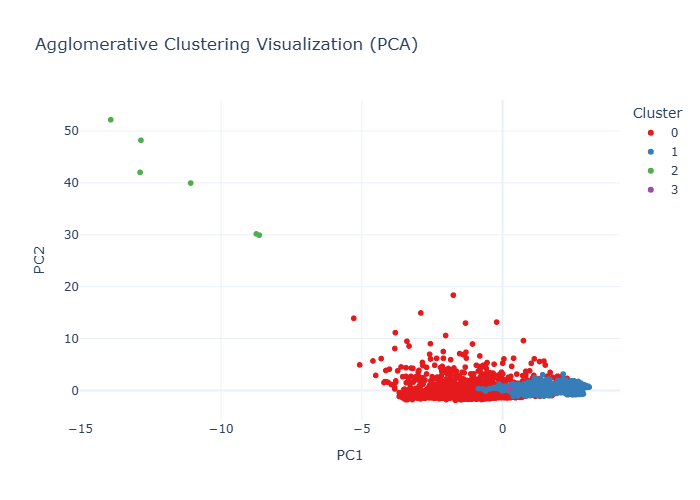

In [51]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(X_scaled)

# Add labels to DataFrame
features['agglo_cluster'] = agglo_labels.astype(str)

# Plot with Plotly
fig_agglo = px.scatter(
    features,
    x='PC1',
    y='PC2',
    color='agglo_cluster',
    title='Agglomerative Clustering Visualization (PCA)',
    labels={'agglo_cluster': 'Cluster'},
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig_agglo.update_layout(template='plotly_white')
fig_agglo.write_image('Agglomerative.png','png')
Image('Agglomerative.png')
